In [67]:
library(tidyverse)
library(here)
theme_set(theme_bw())
library(patchwork)

In [53]:
ec <- read_rds(here("data/1_prepared/ec_all_hainich.rds"))

In [90]:
options(repr.plot.width  = 10,
        repr.plot.height = 8)

In [54]:
names(ec)

[1] "time"              "air_density"       "air_heat_capacity"
 [4] "air_molar_volume"  "air_pressure"      "air_temperature"  
 [7] "bowen_ratio"       "co2_flux"          "co2_mixing_ratio" 
[10] "co2_scf"           "co2_spikes"        "co2_strg"         
[13] "co2_var"           "daytime"           "max_wind_speed"   
[16] "qc_co2_flux"       "sonic_temperature" "ts_spikes"        
[19] "ts_var"            "u_spikes"          "u_unrot"          
[22] "u_var"             "v_spikes"          "v_unrot"          
[25] "v_var"             "w_spikes"          "w_unrot"          
[28] "w_var"             "wind_dir"          "wind_speed"       
[31] "x_10"              "x_30"              "x_50"             
[34] "x_70"              "x_90"              "x_offset"         
[37] "x_peak"            "LW_IN"             "LW_OUT"           
[40] "NETRAD"            "PA"                "RAD_IN"           
[43] "RAD_OUT"           "RH"                "RHO"              
[46] "SW_DIF_IN"         "SW_IN"             "SW_OUT"           
[49] "TA"                "VPD"               "VP_act"           
[52] "VP_max"            "P"

# Explore distributions

In [150]:
expl_var <- function(var_name){
    #cat(var_name, "\n")
    # ec %>%
    # pull(!!var_name) %>%
    # summary() %>%
    # print()
    
    density <- ec %>%
        ggplot()+
        geom_density(aes_string(var_name))+
        labs(x="", title=var_name)
    
    var <- pull(ec, !!var_name)
    Q1 <- quantile(var, .25)
    Q3 <- quantile(var, .75)
    IQR <- IQR(var)
    
    var_no_out <- var[var> (Q1 - 1.5*IQR) & var< (Q3 + 1.5*IQR)]
    
    density_no_out <- ggplot() +
        geom_density(aes(x=var_no_out))+
        labs(title="removed outlier")
    
    layout <- c(
        area(1,1,4,5),
        area(5,1,5,5),
        area(1,4,2,5)
    )
    
    points <-ec %>%
    ggplot(aes(y=var_name)) +
    geom_boxplot(aes_string(x = var_name)) +
    labs(y="")
    
    print(density + points + density_no_out + plot_layout(design=layout))
    

}

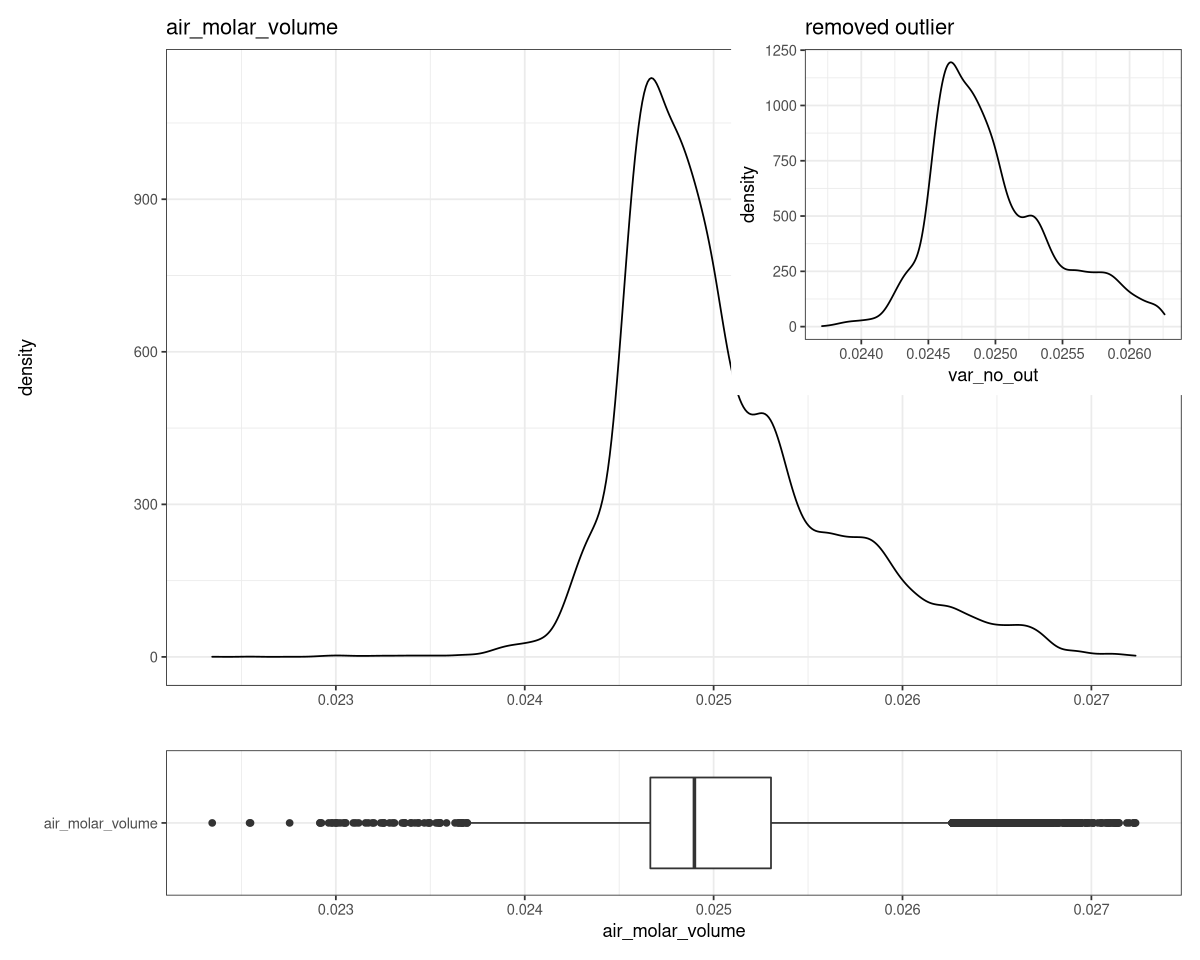

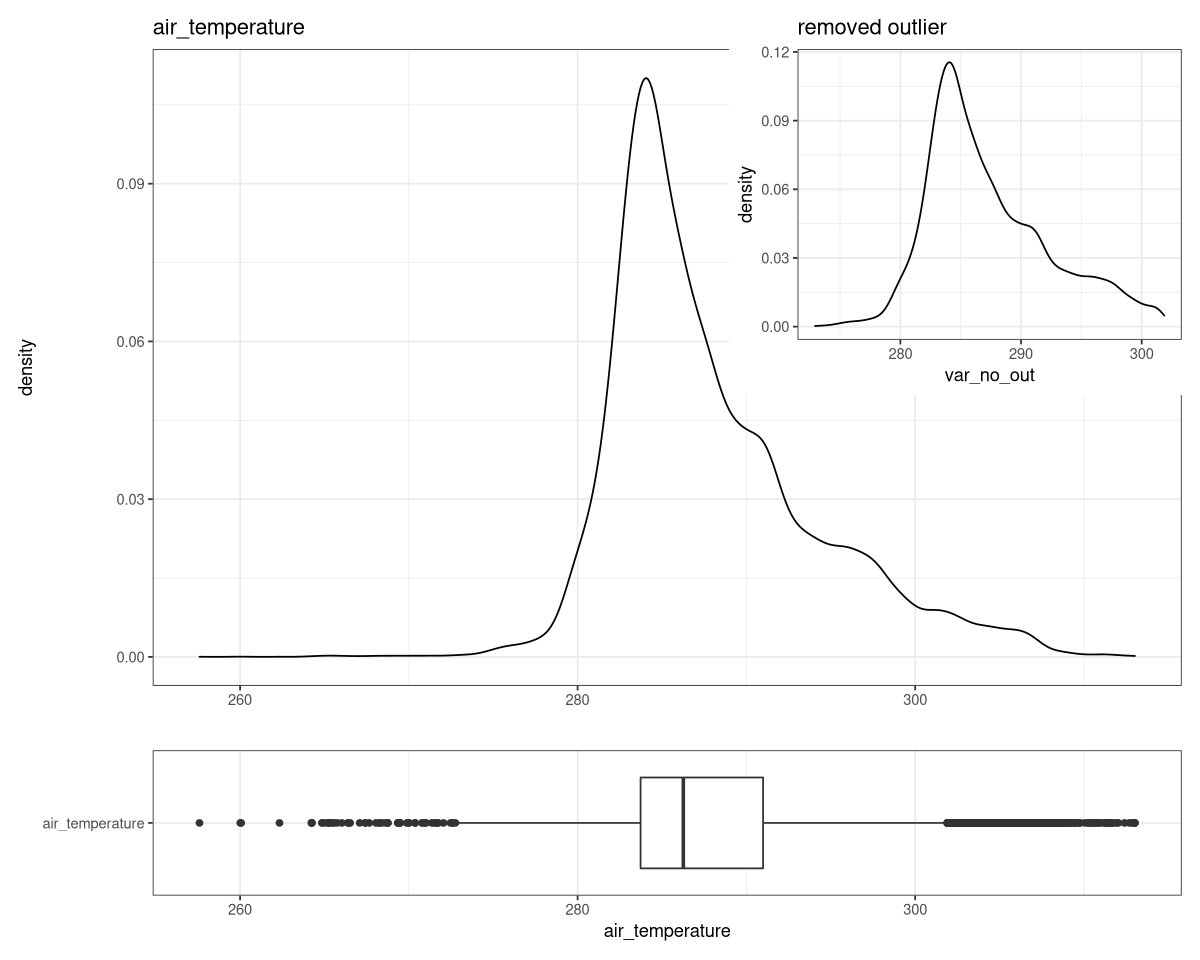

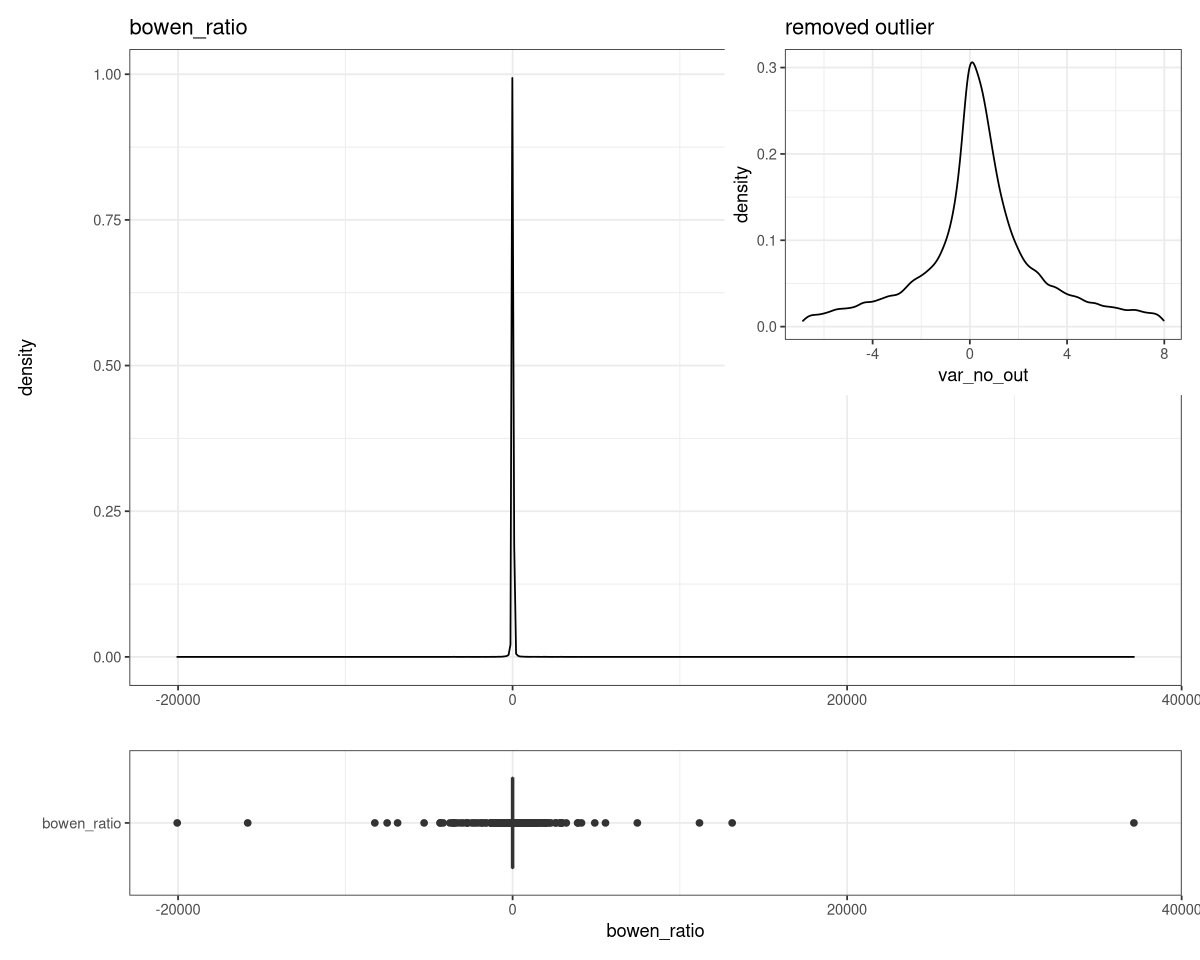

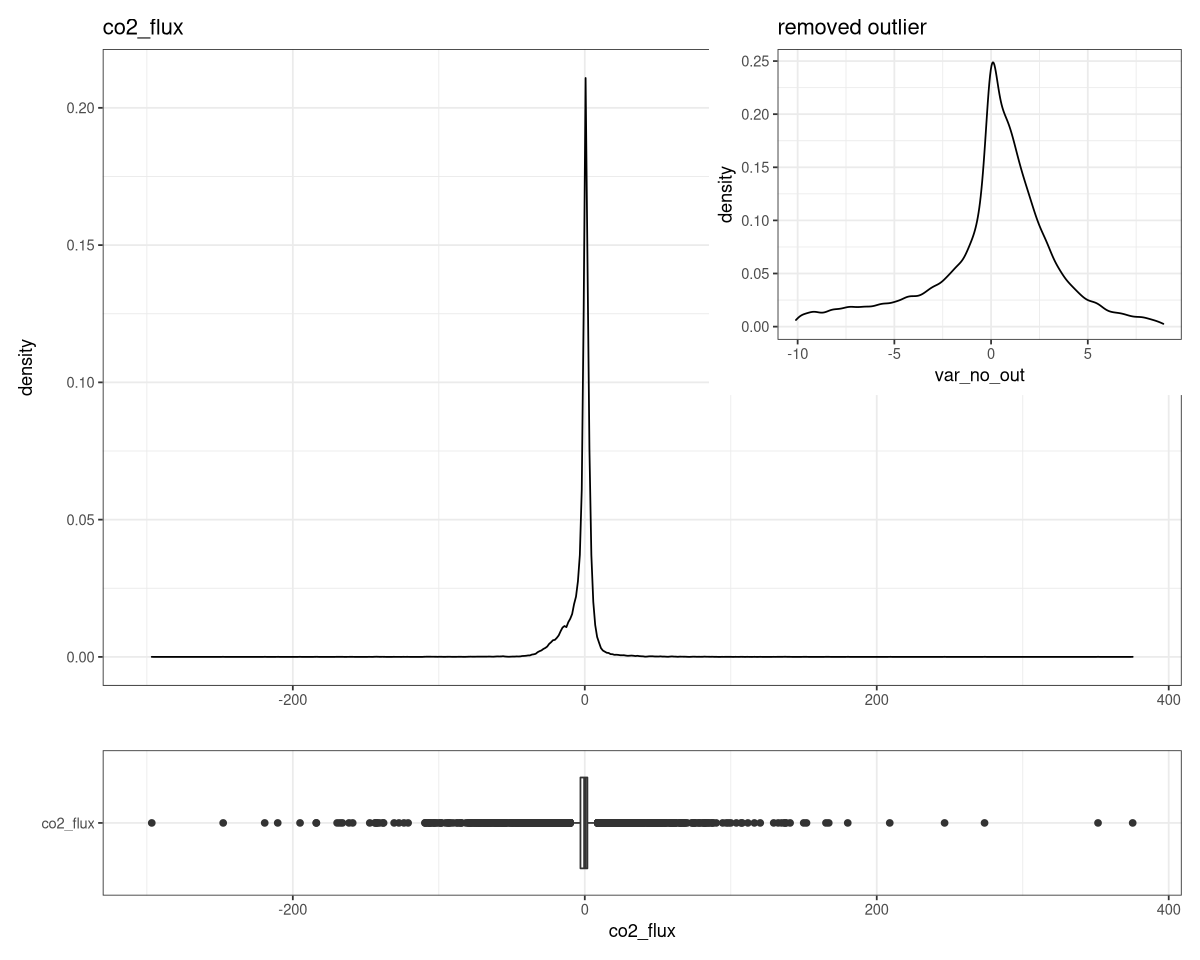

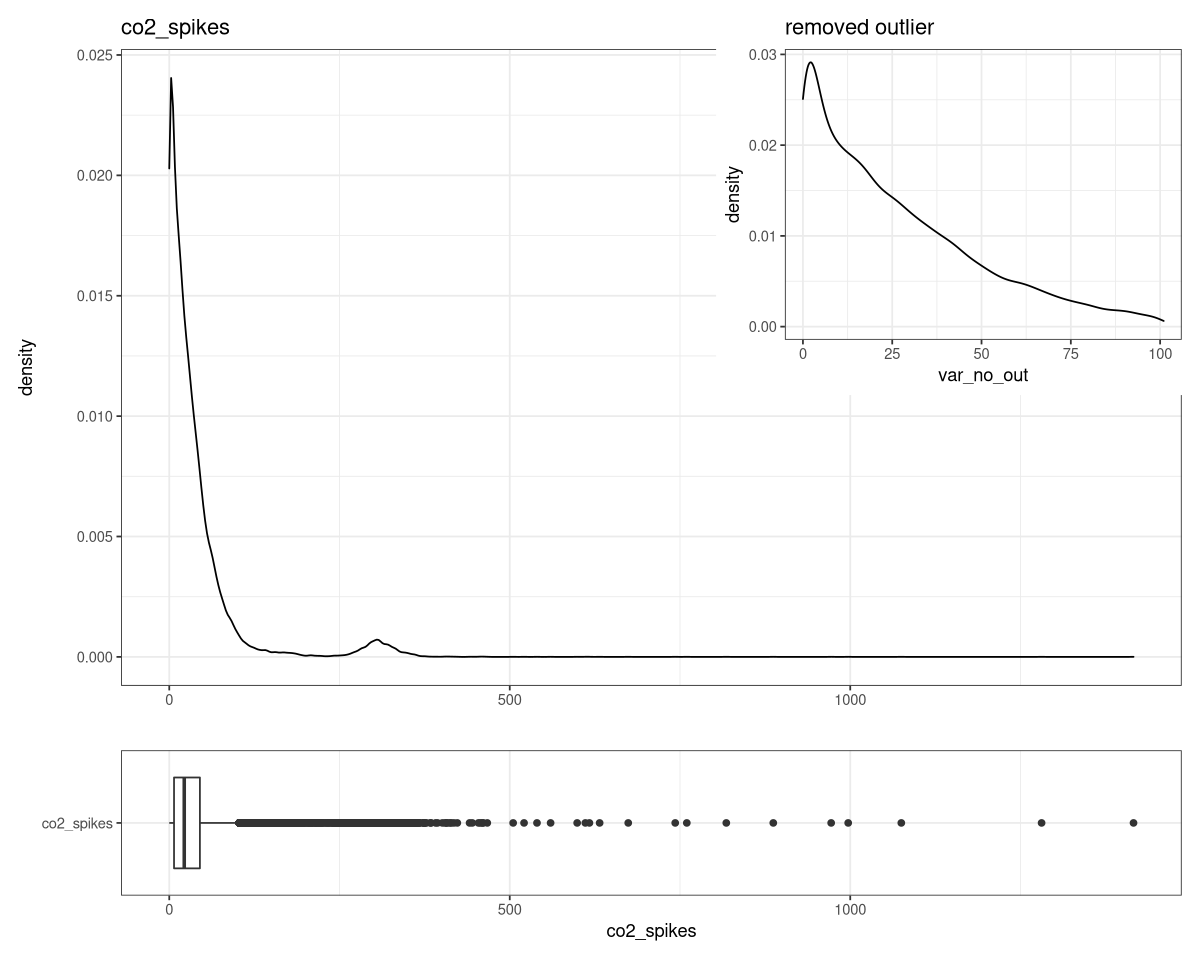

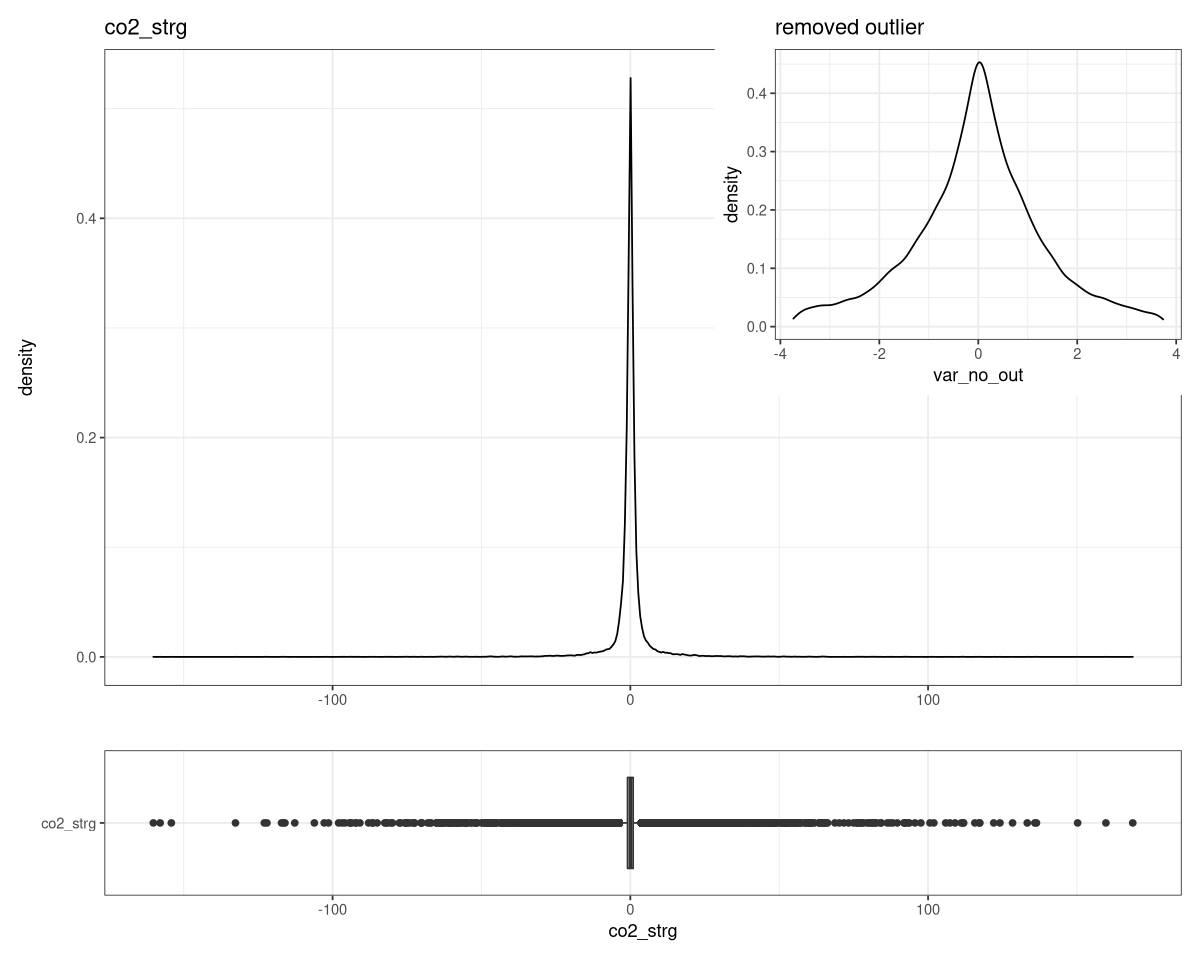

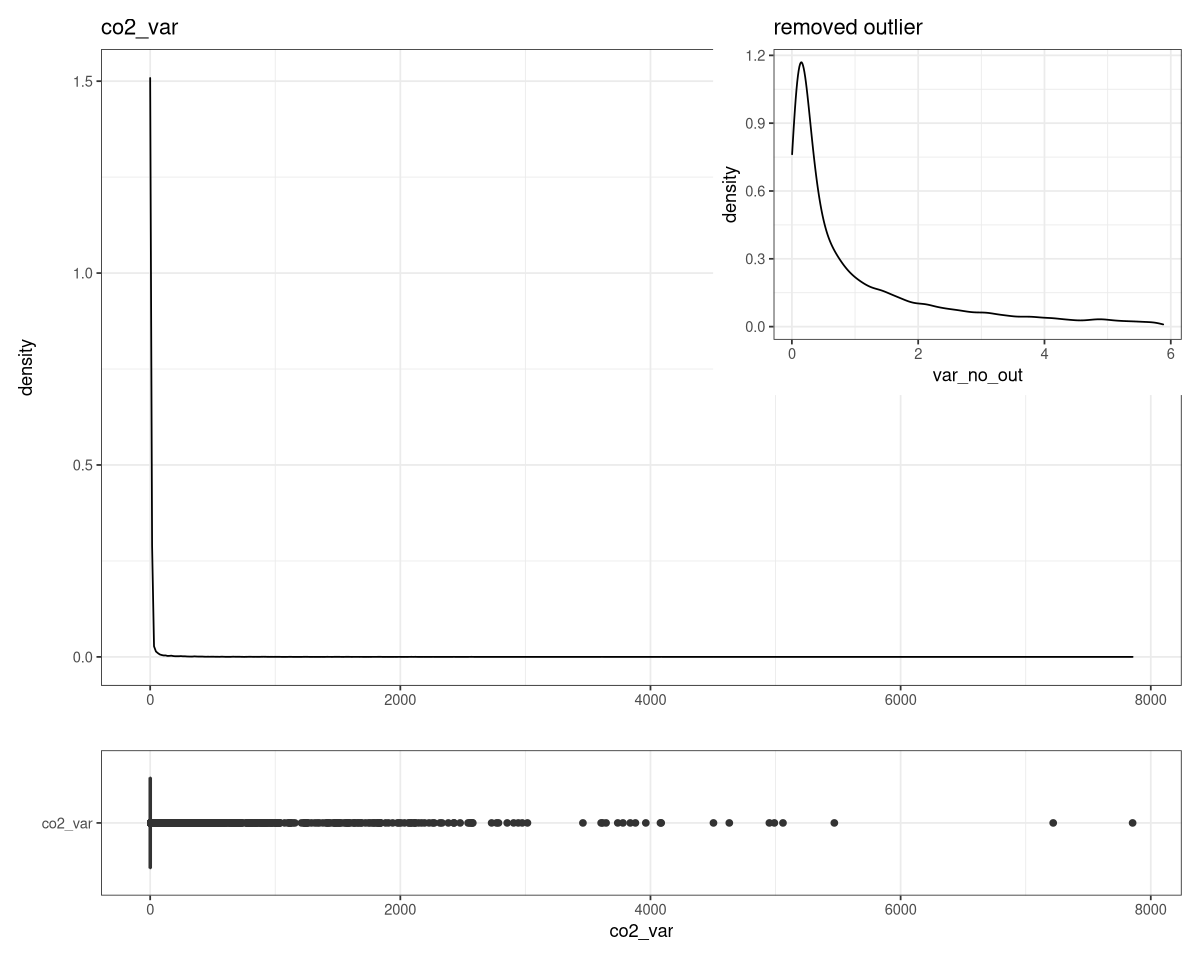

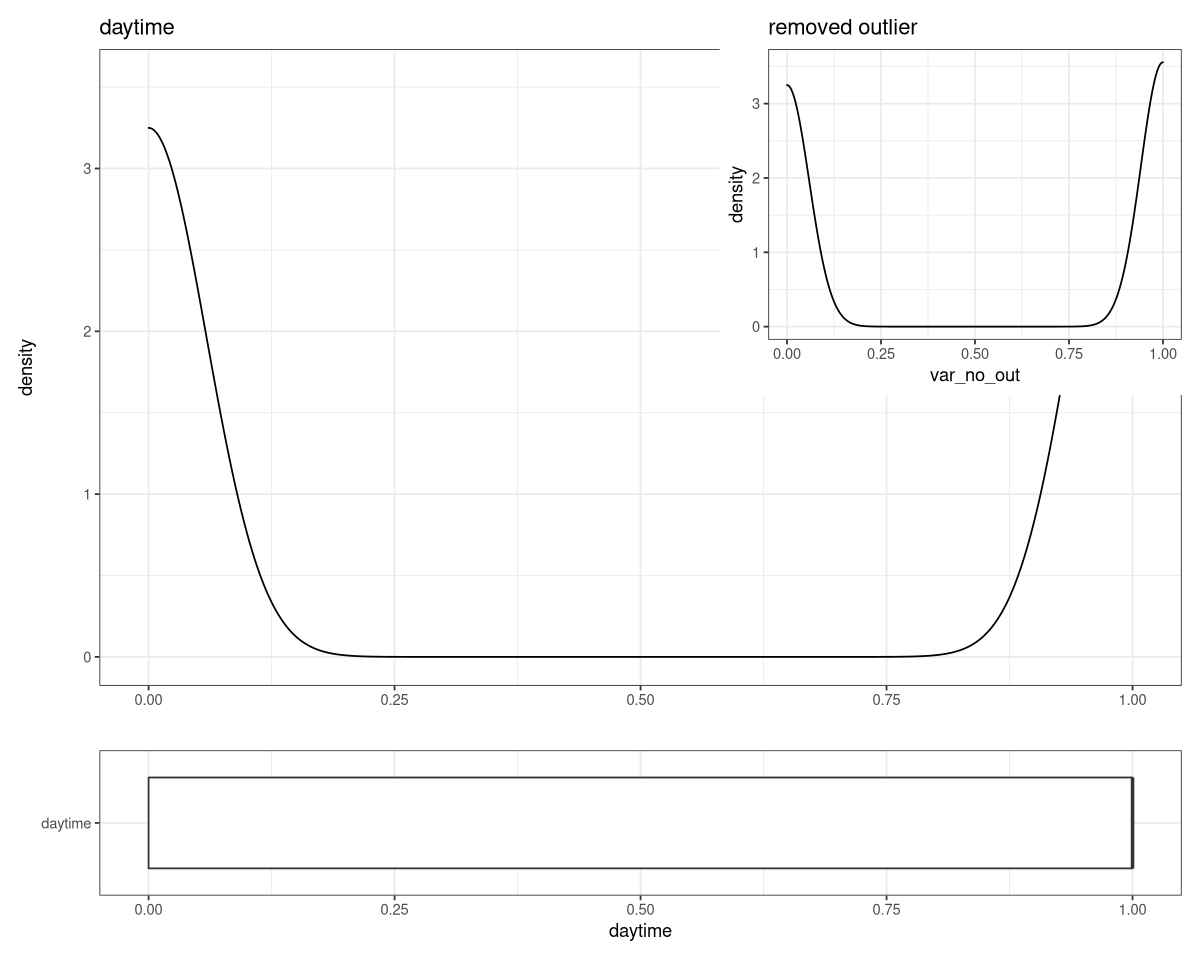

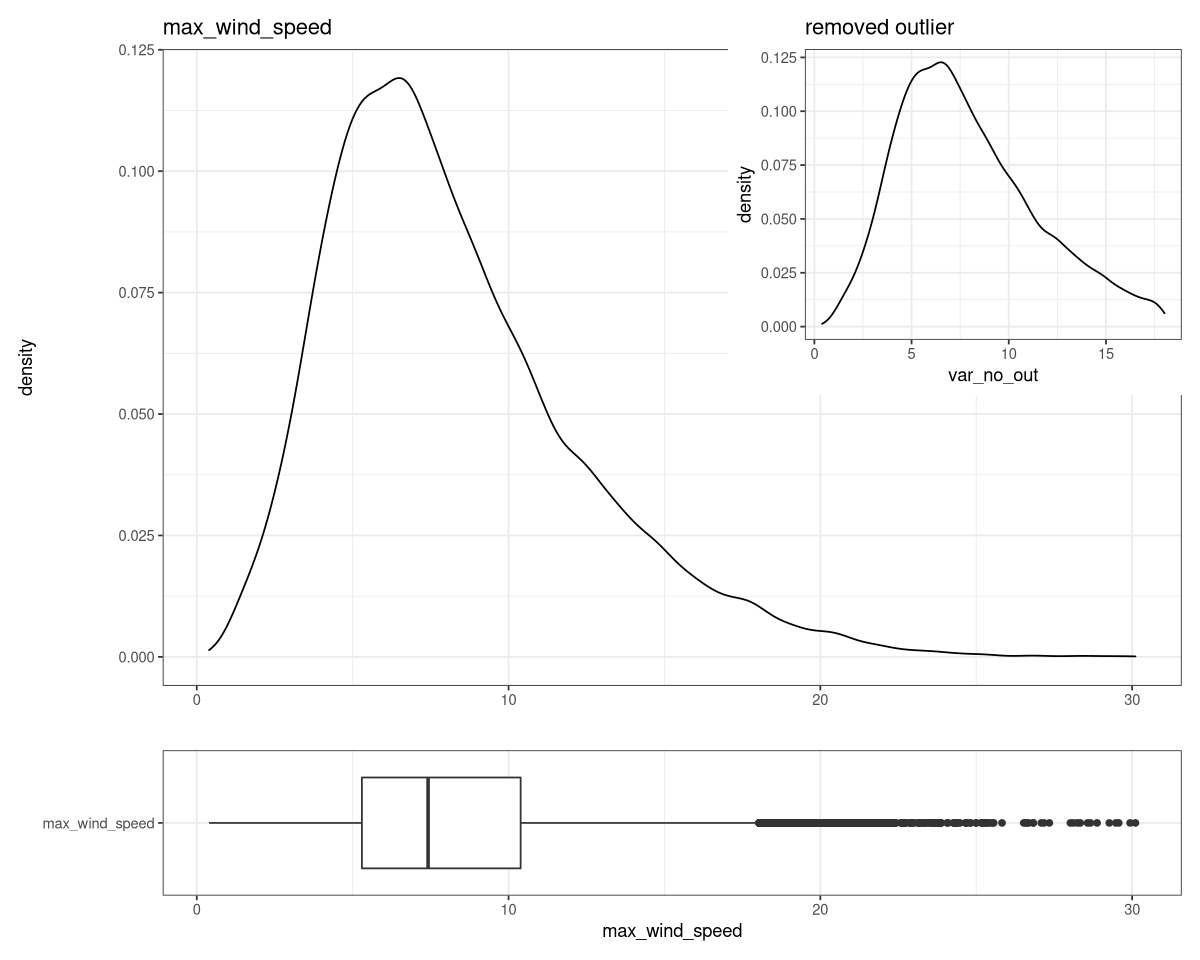

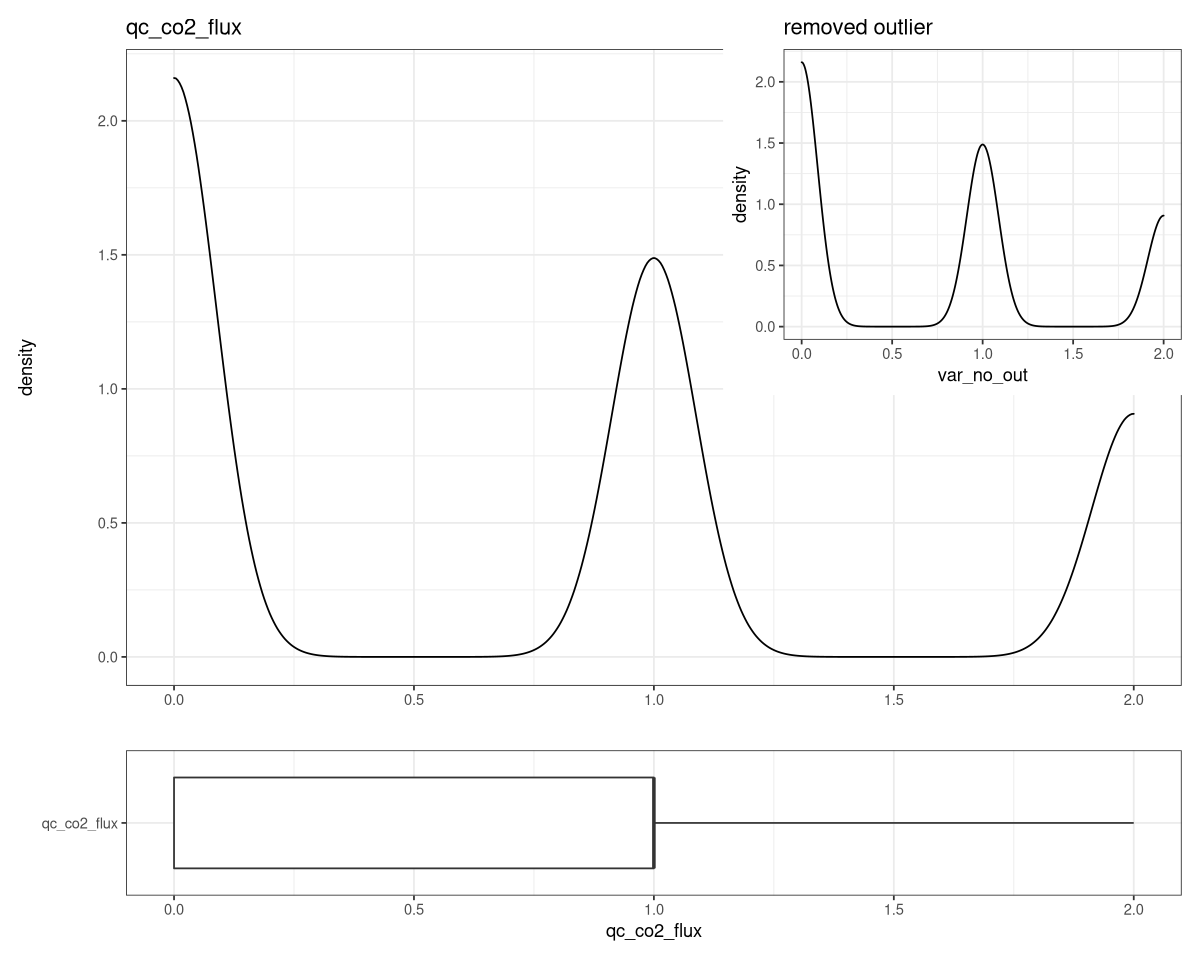

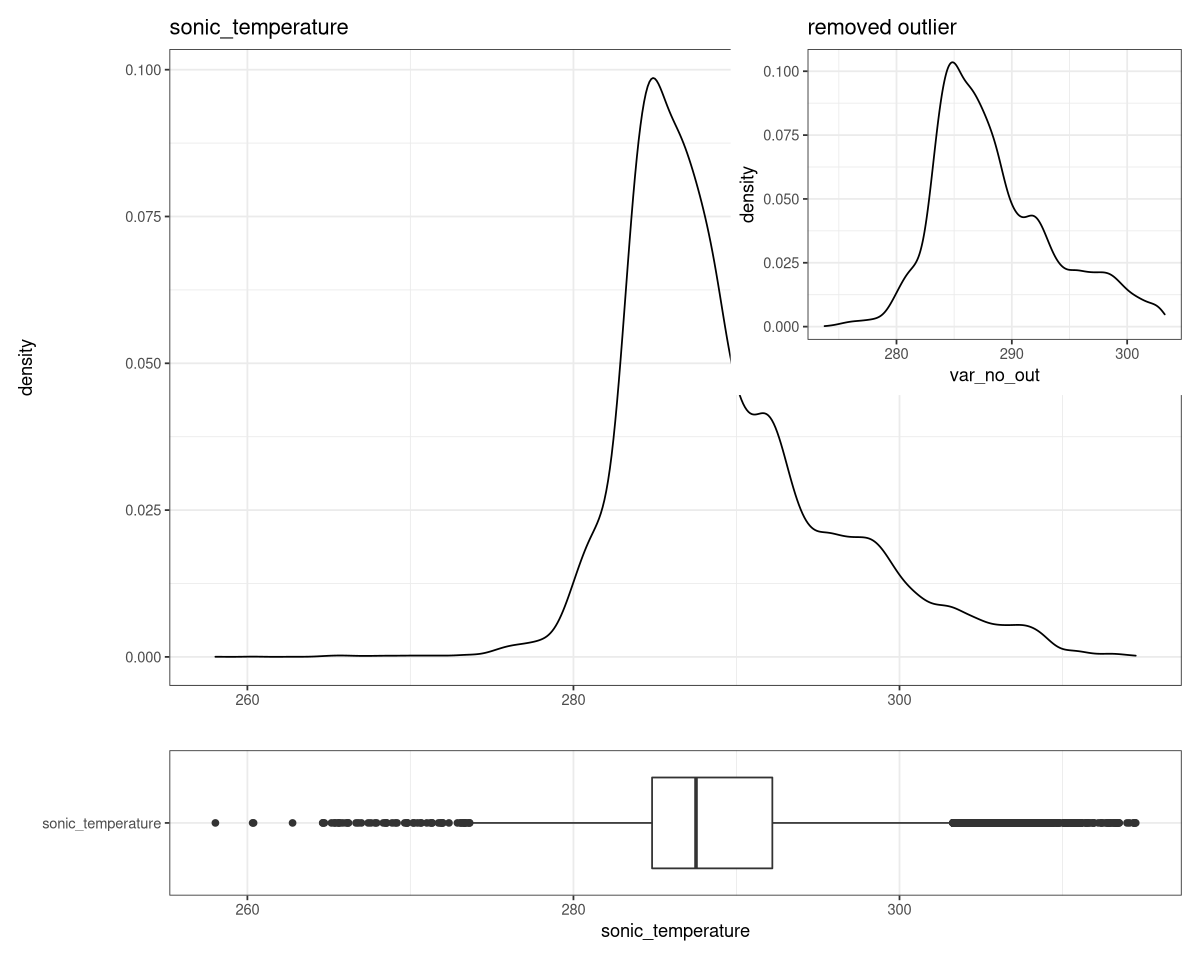

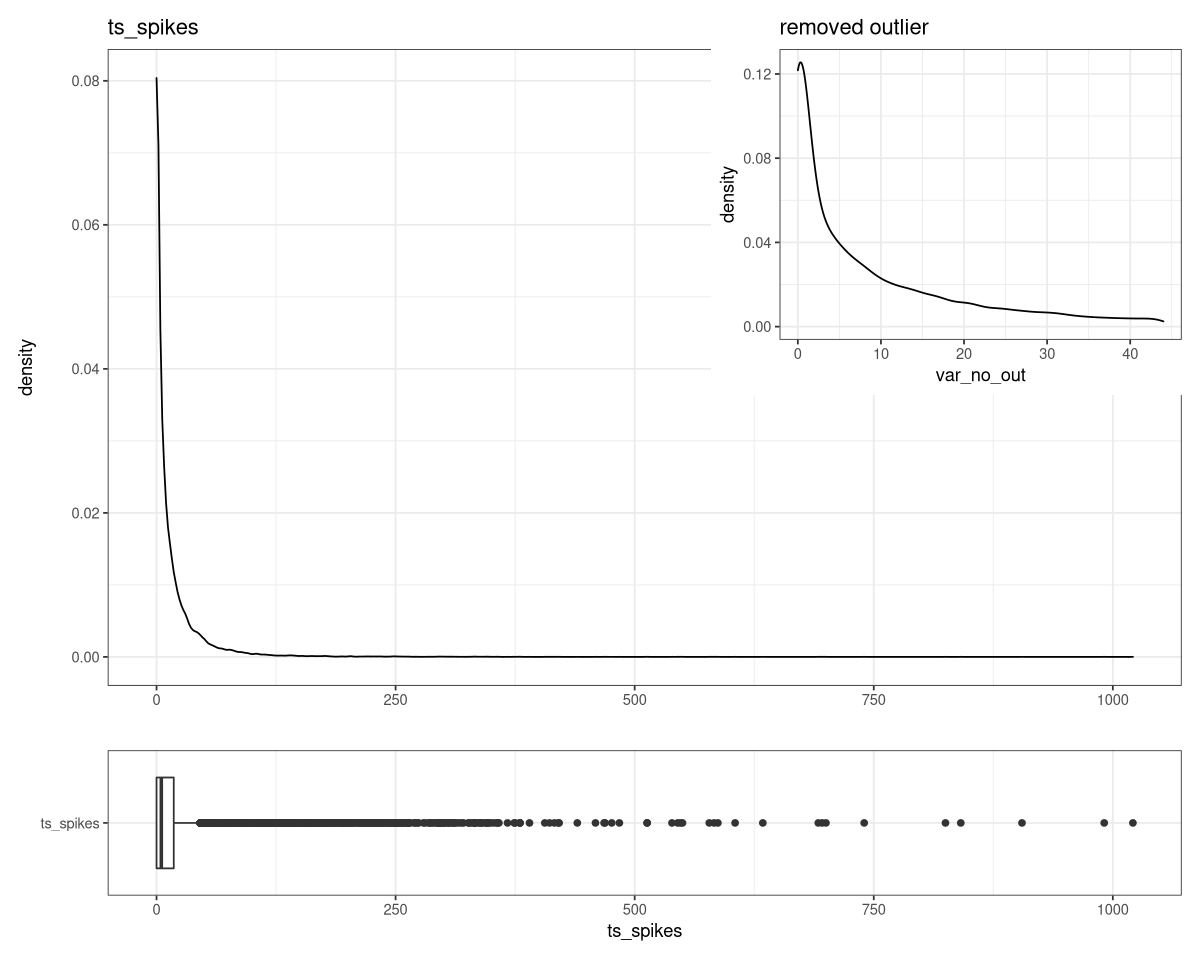

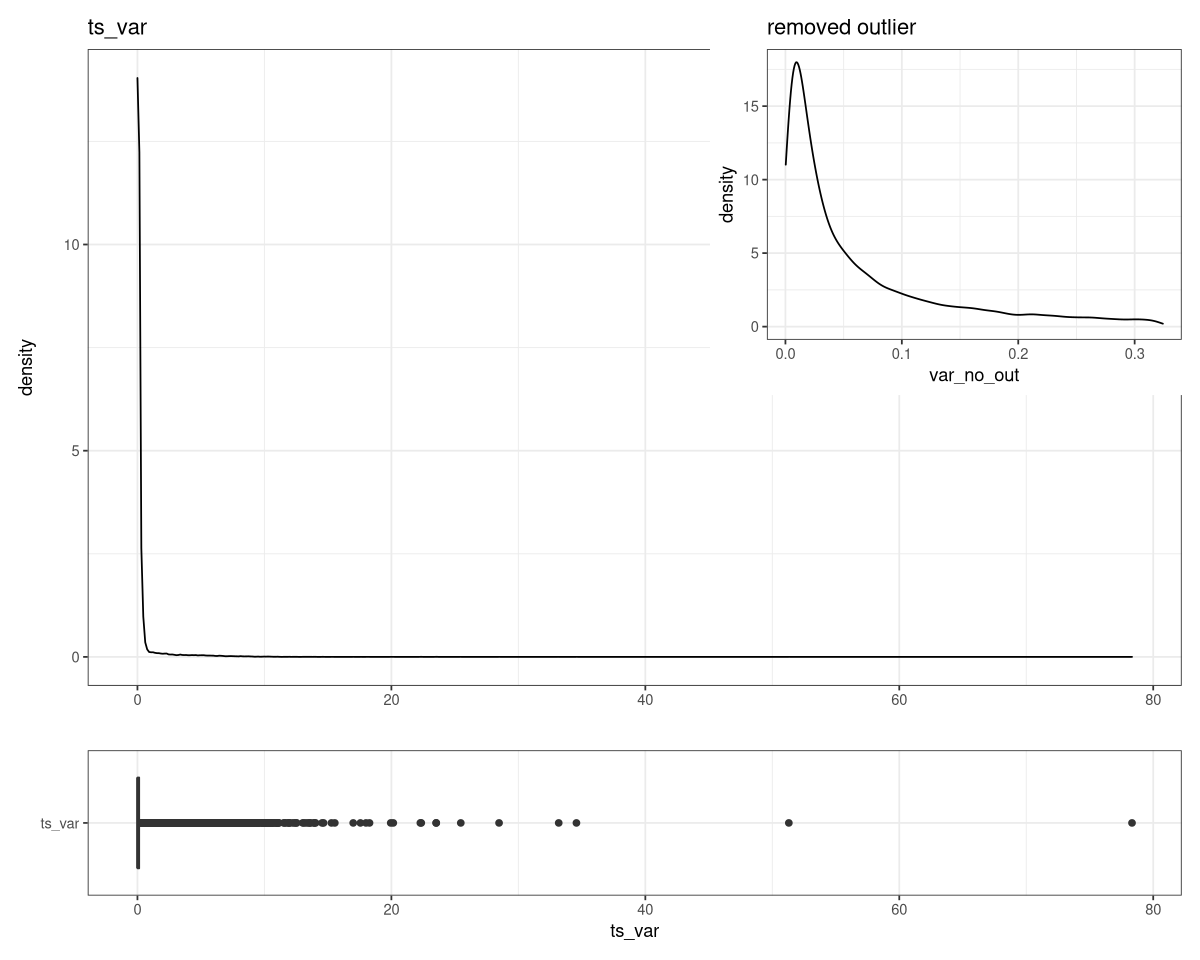

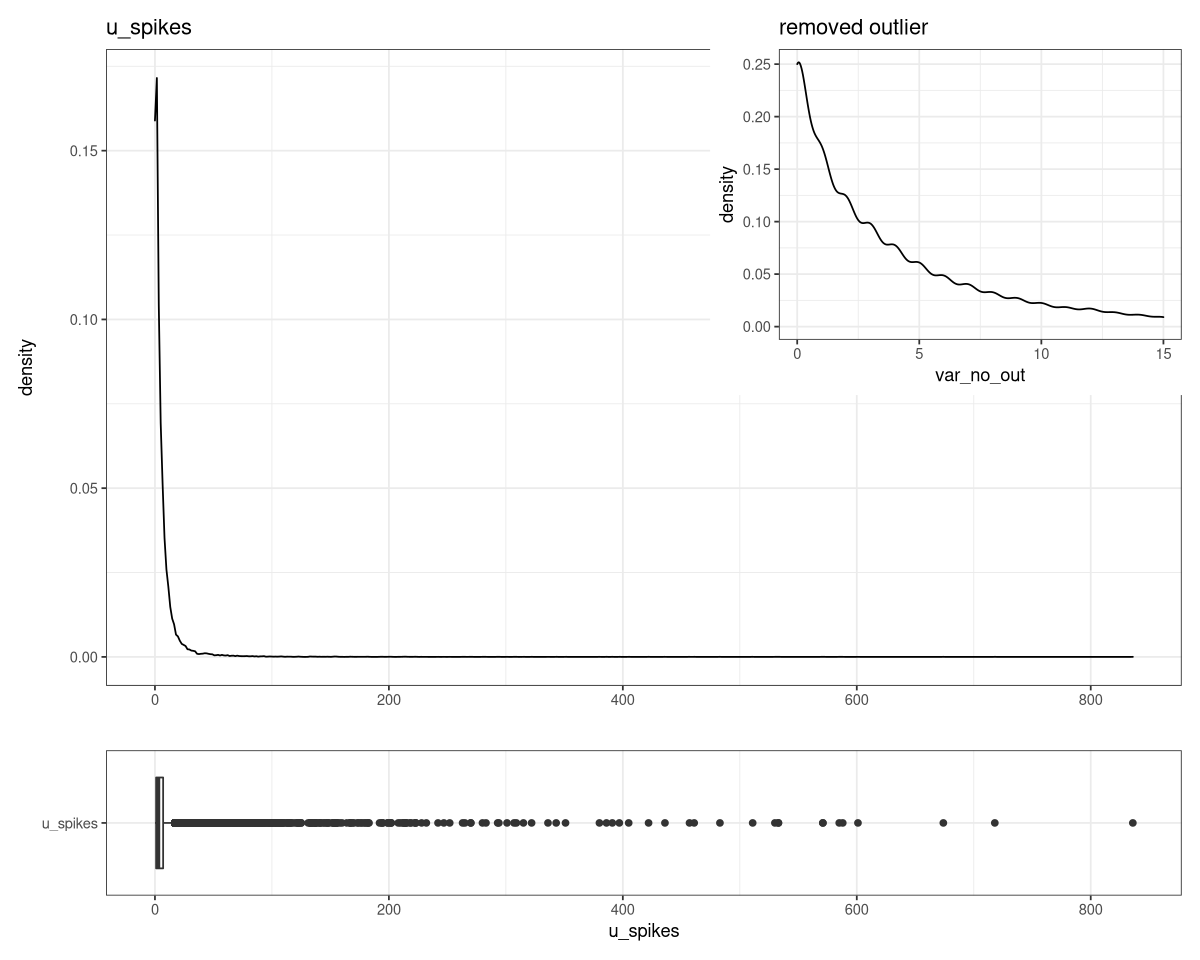

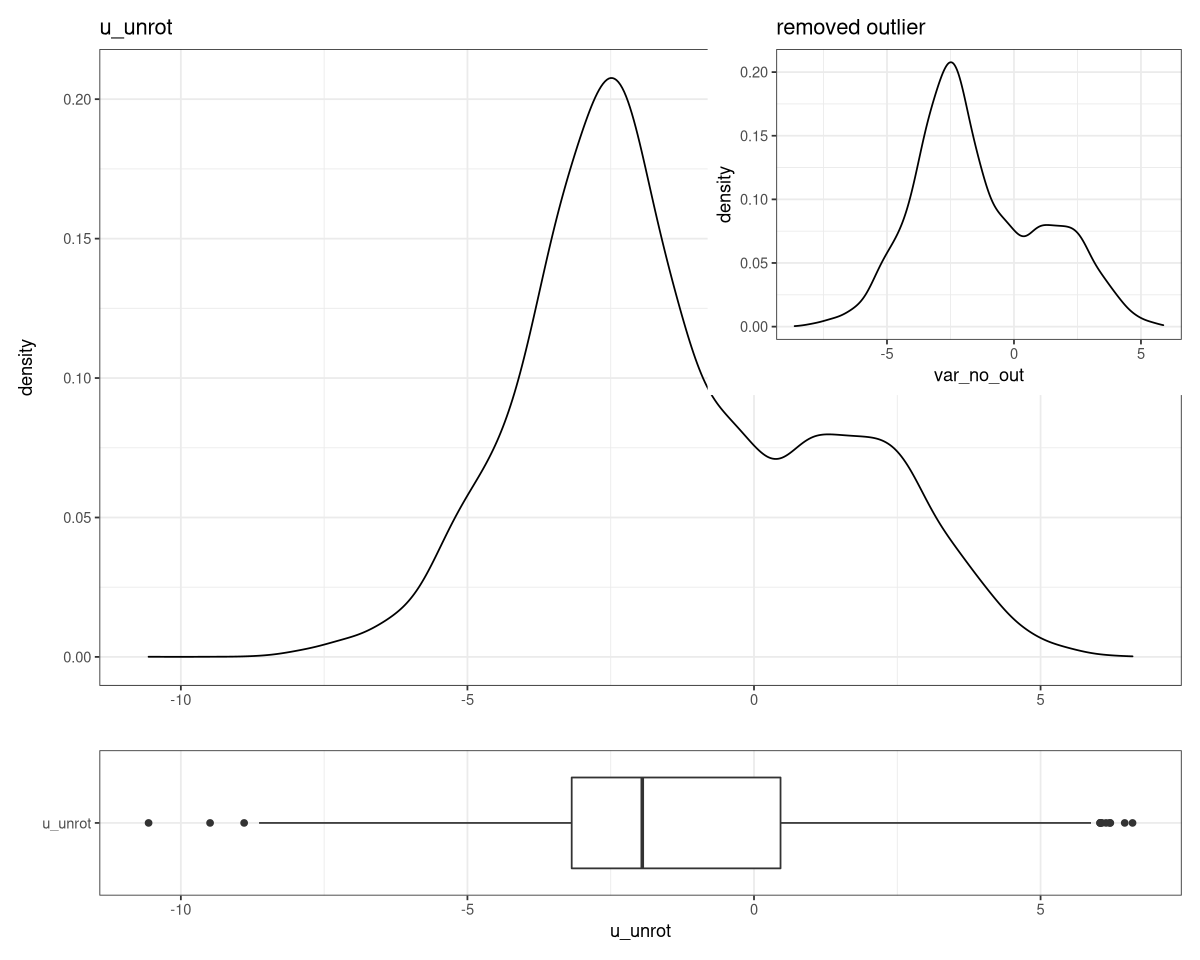

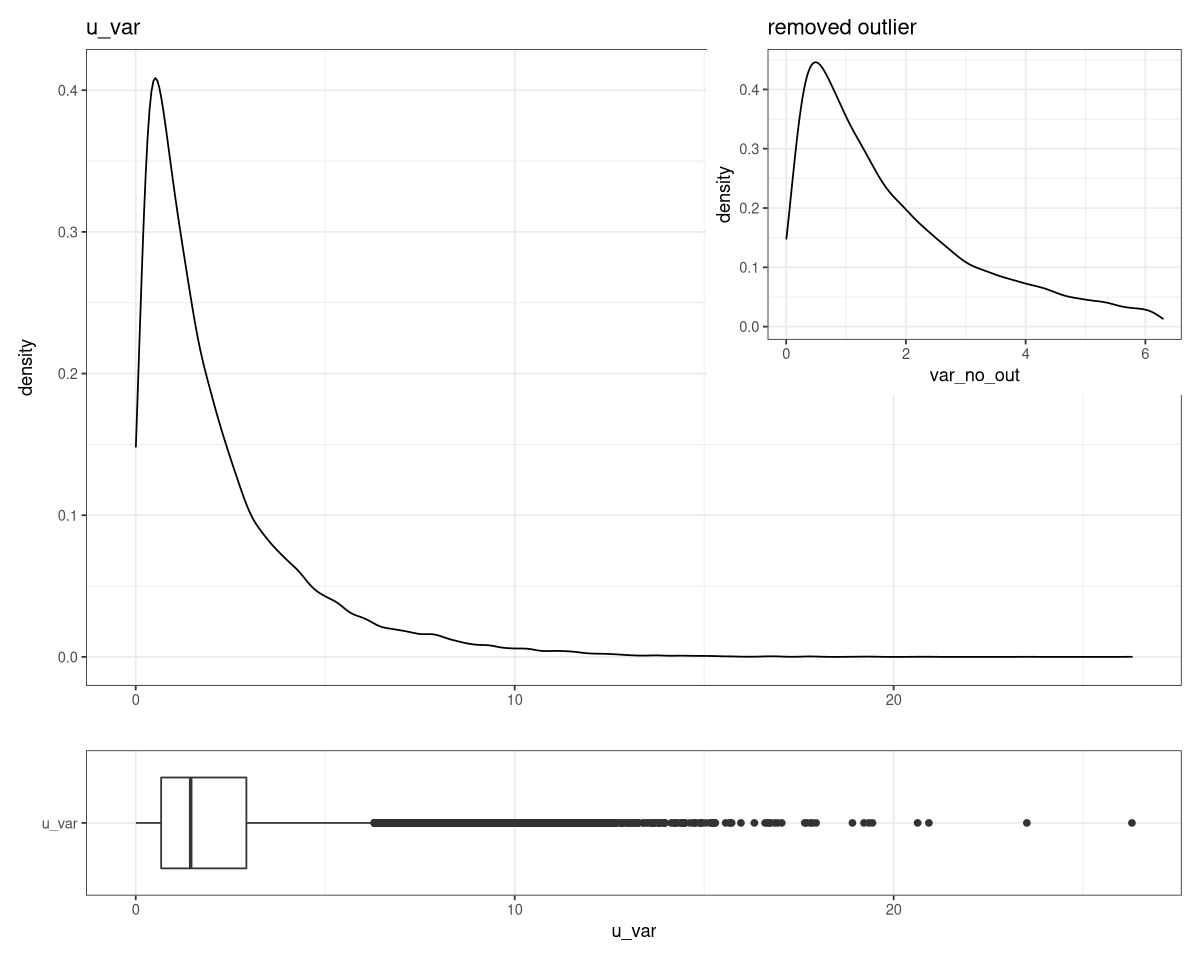

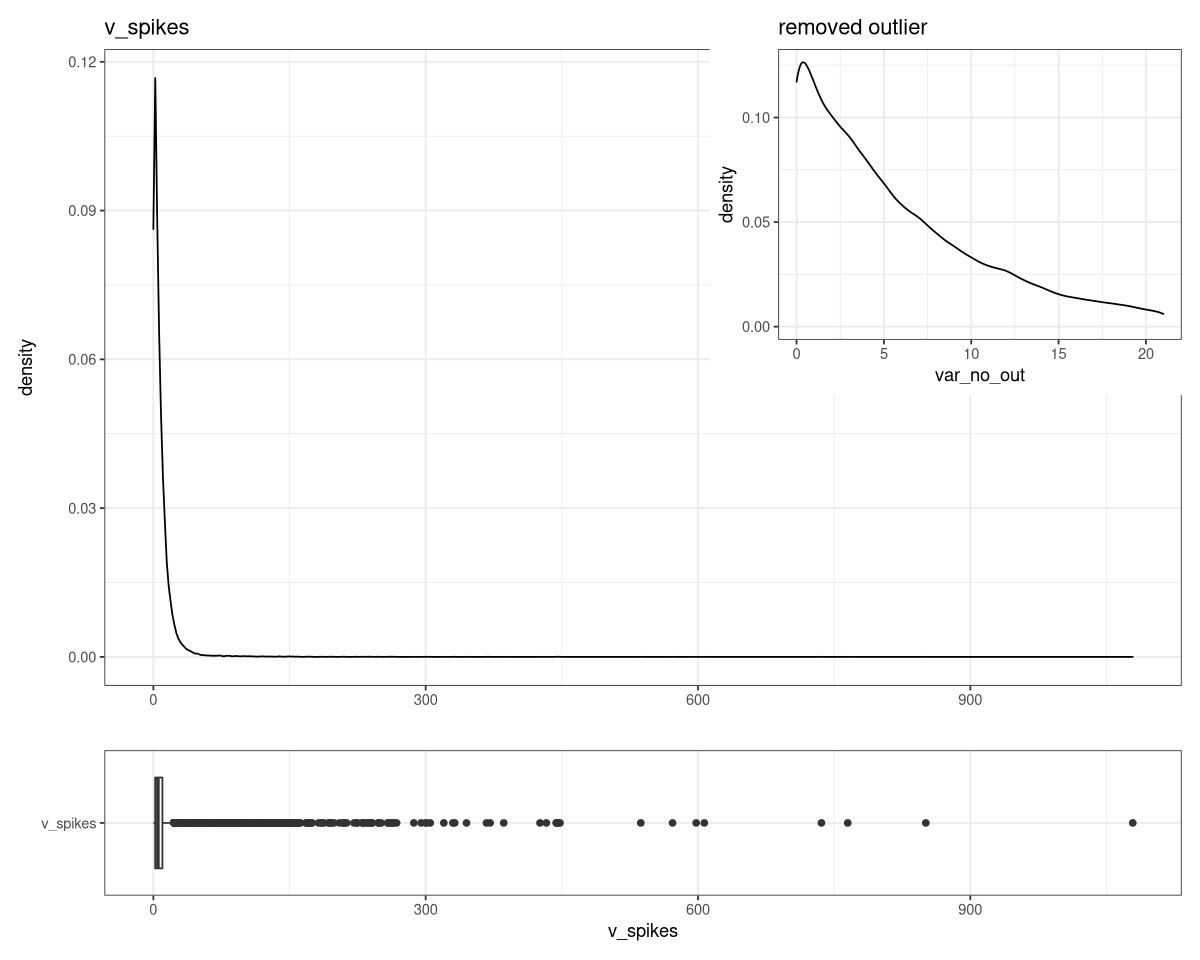

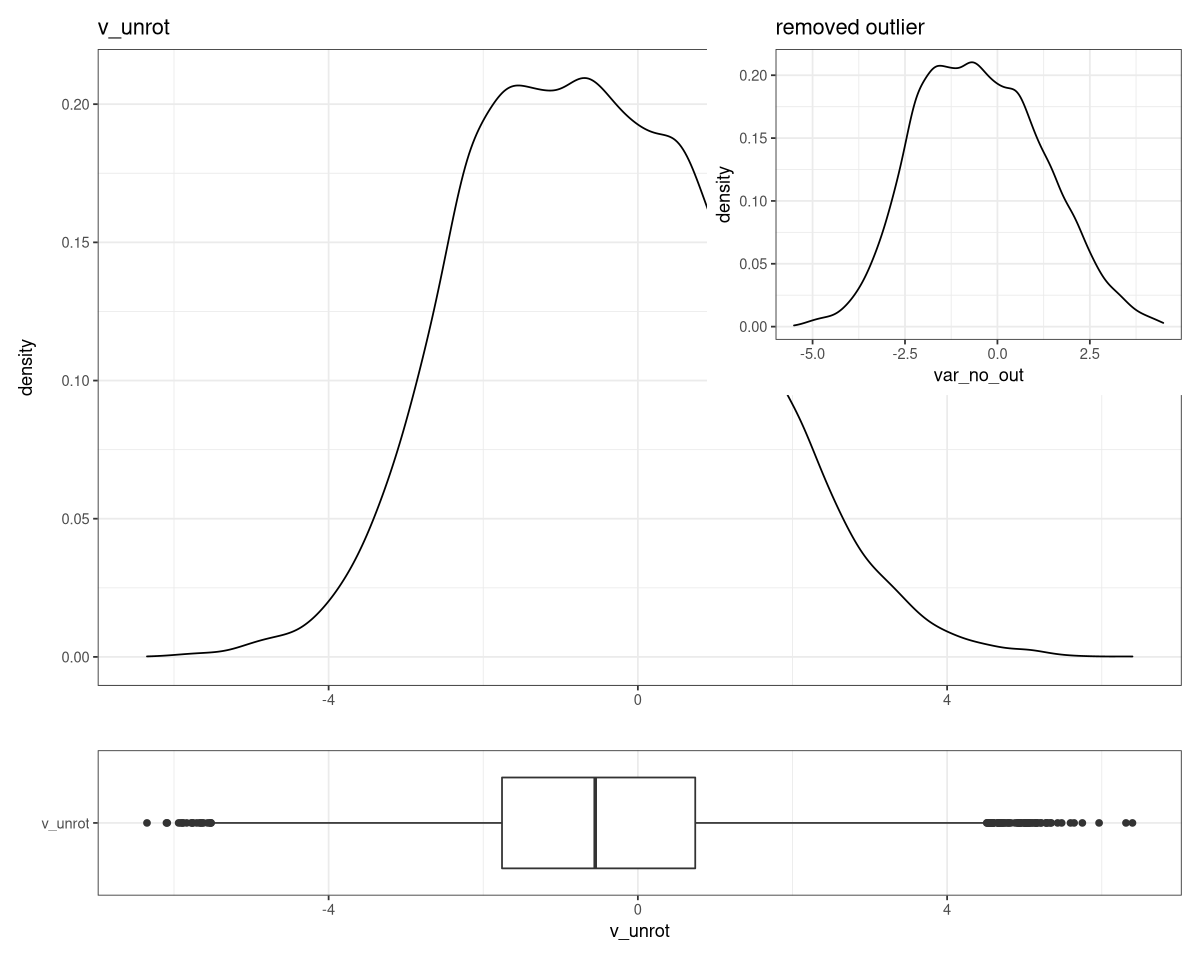

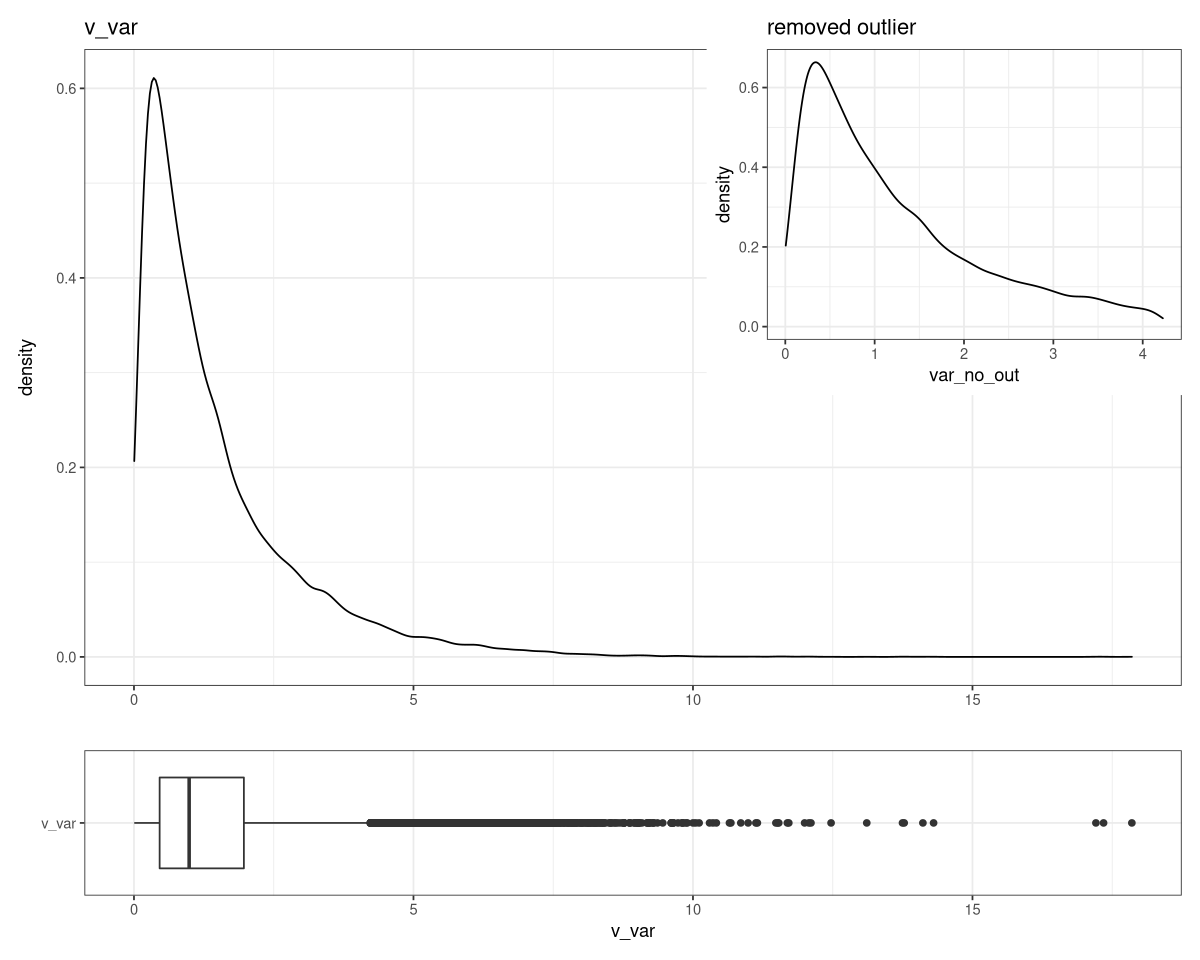

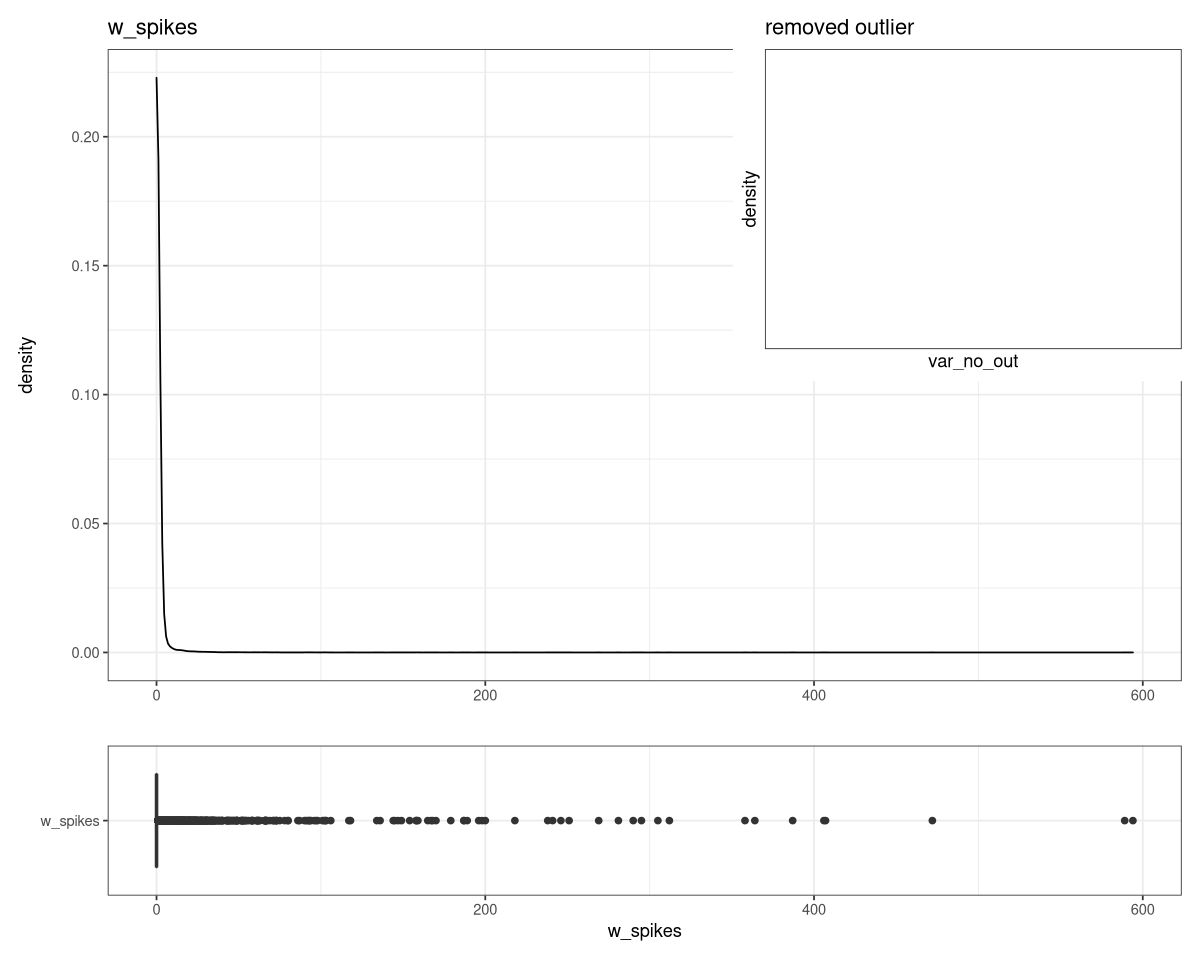

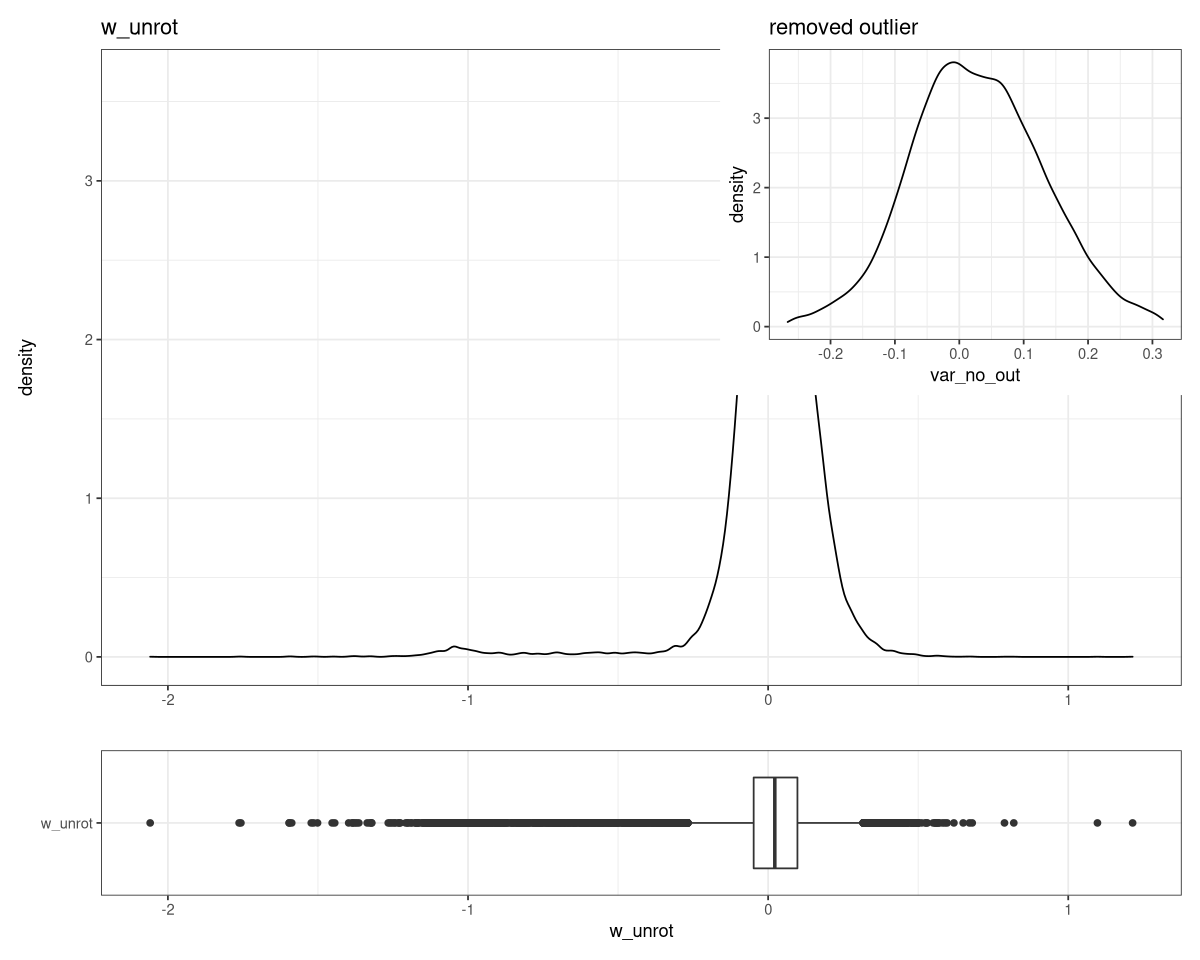

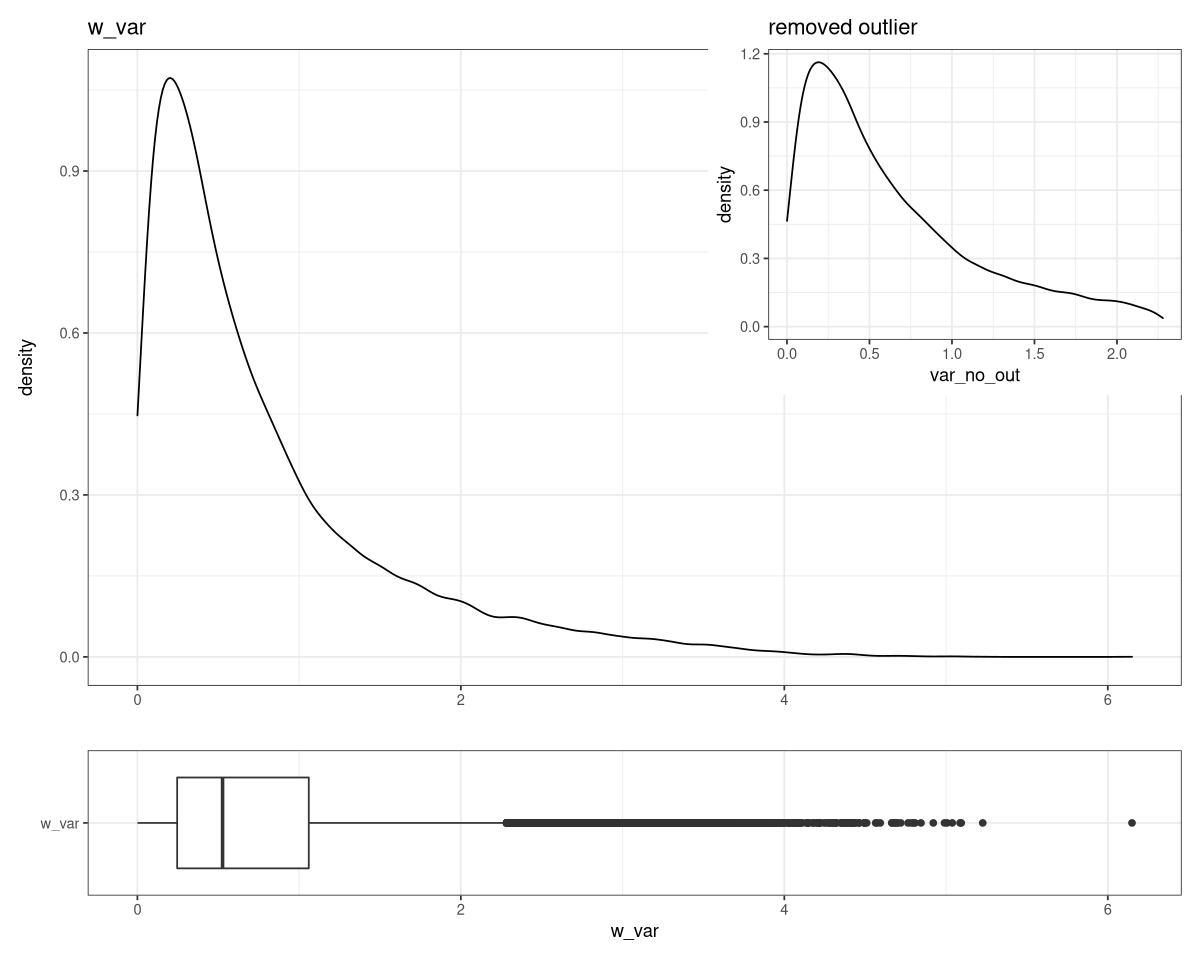

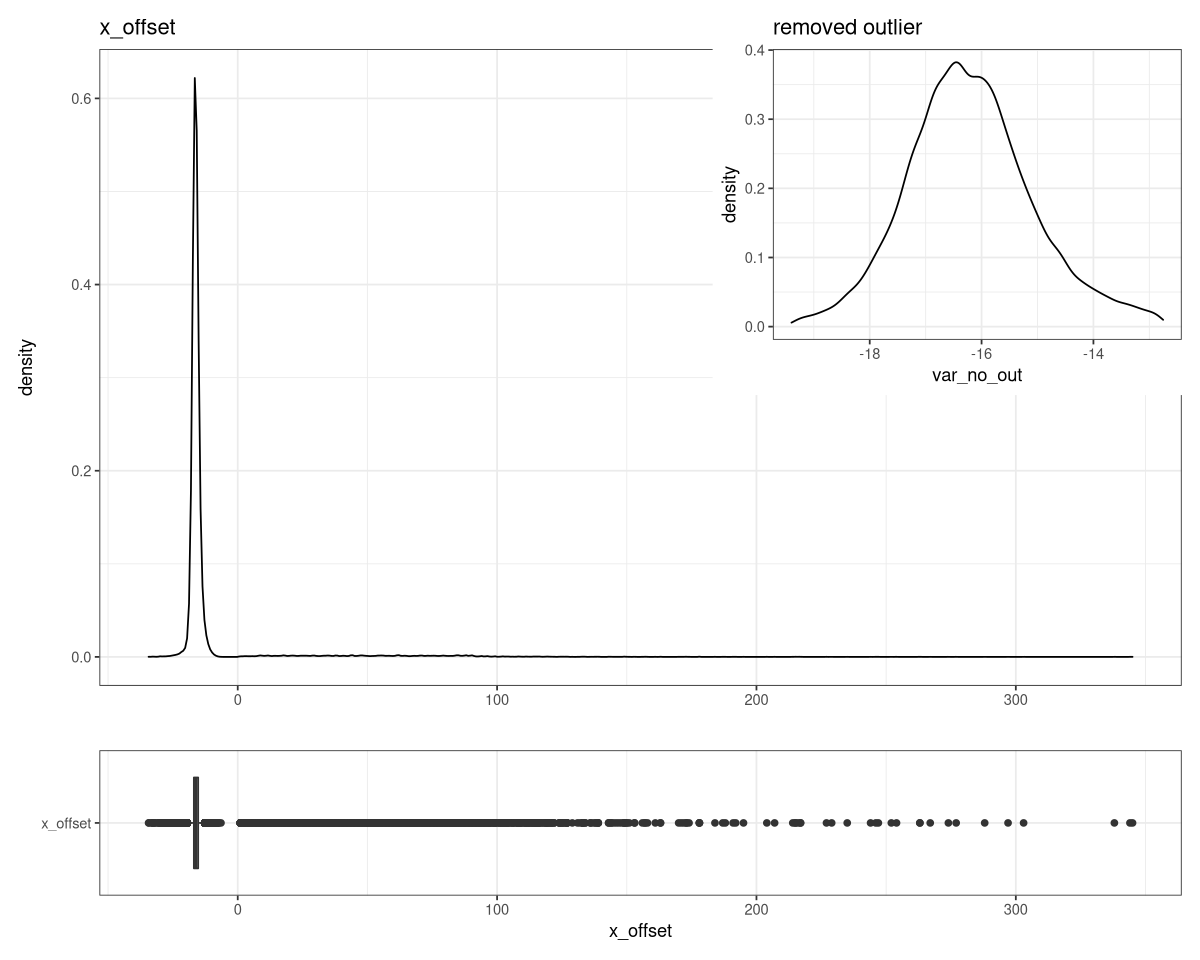

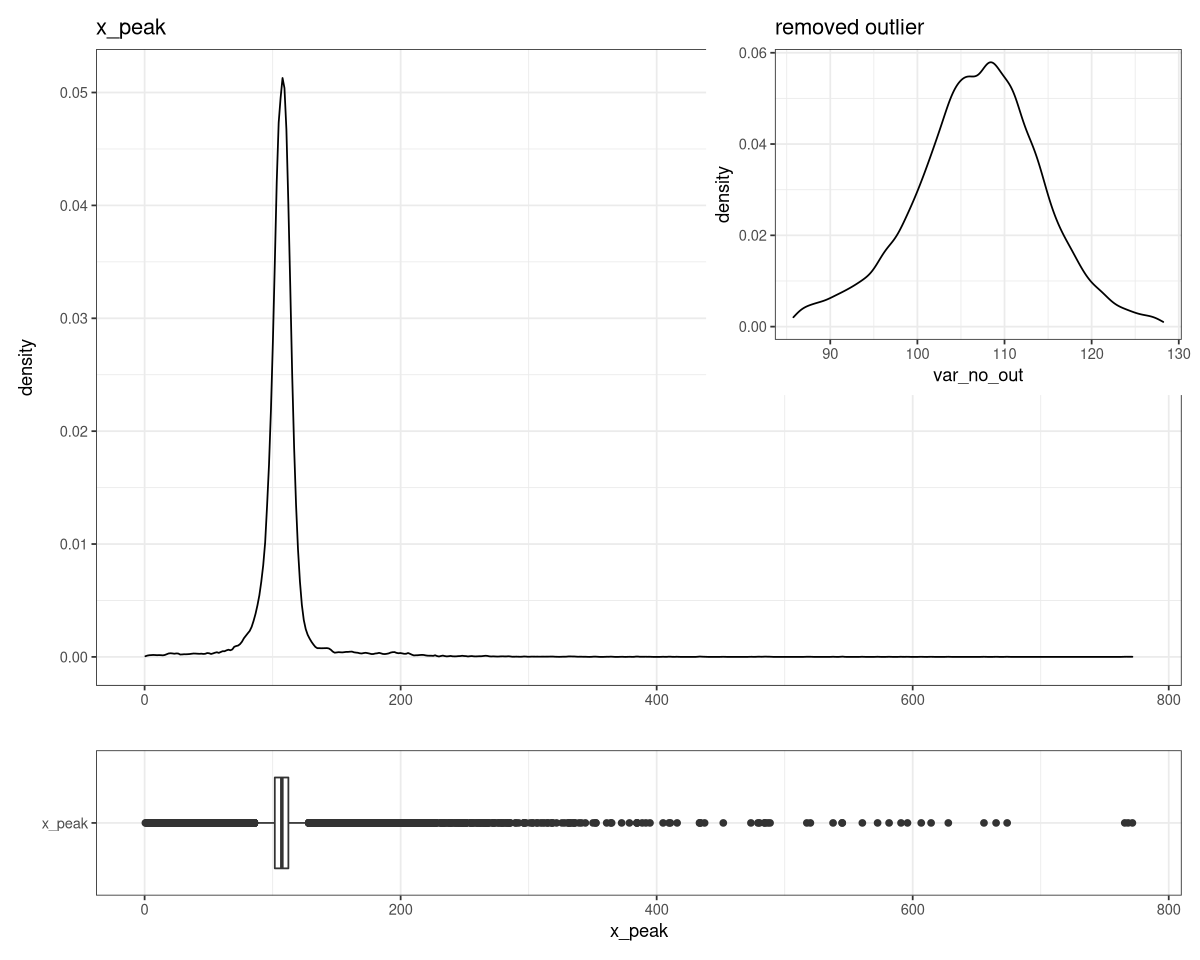

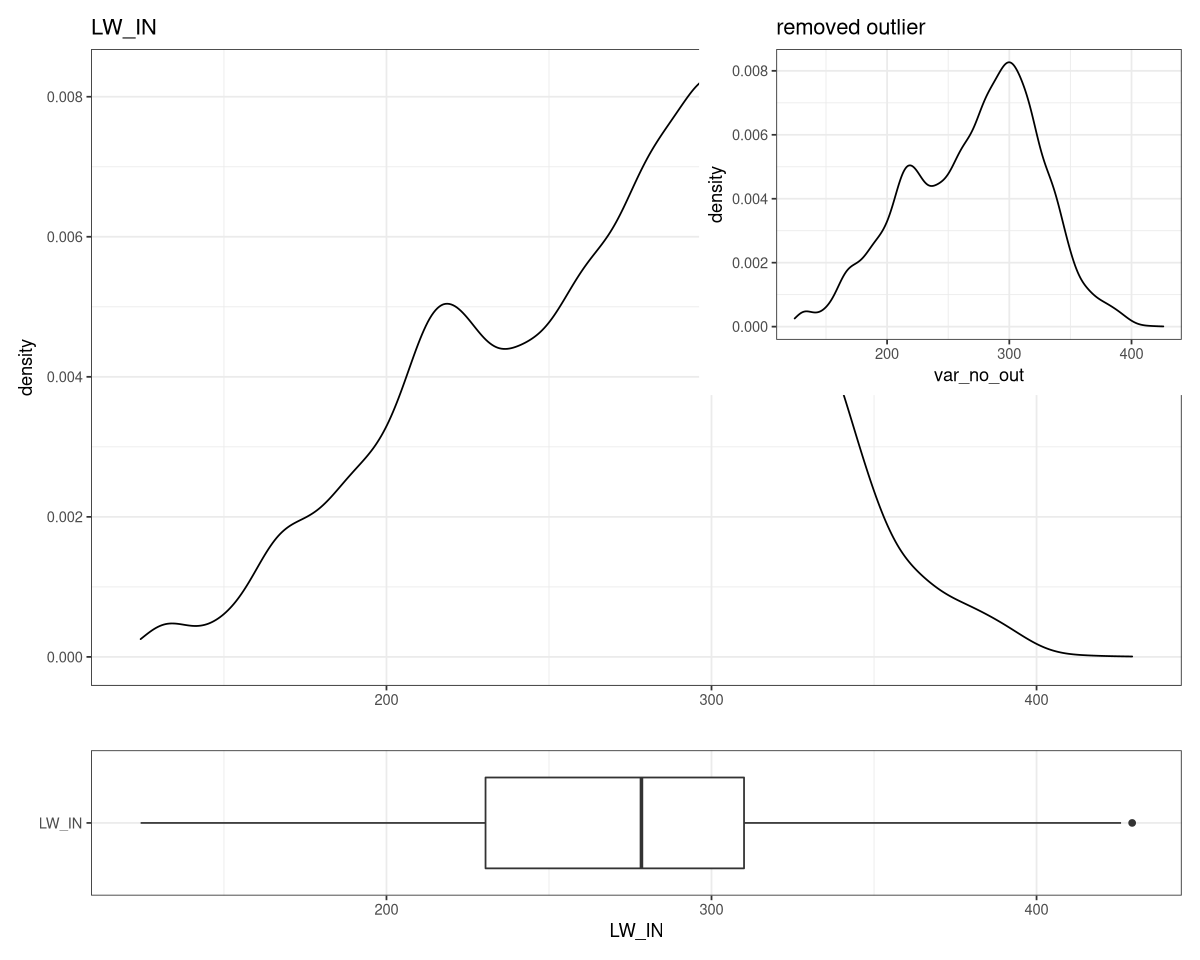

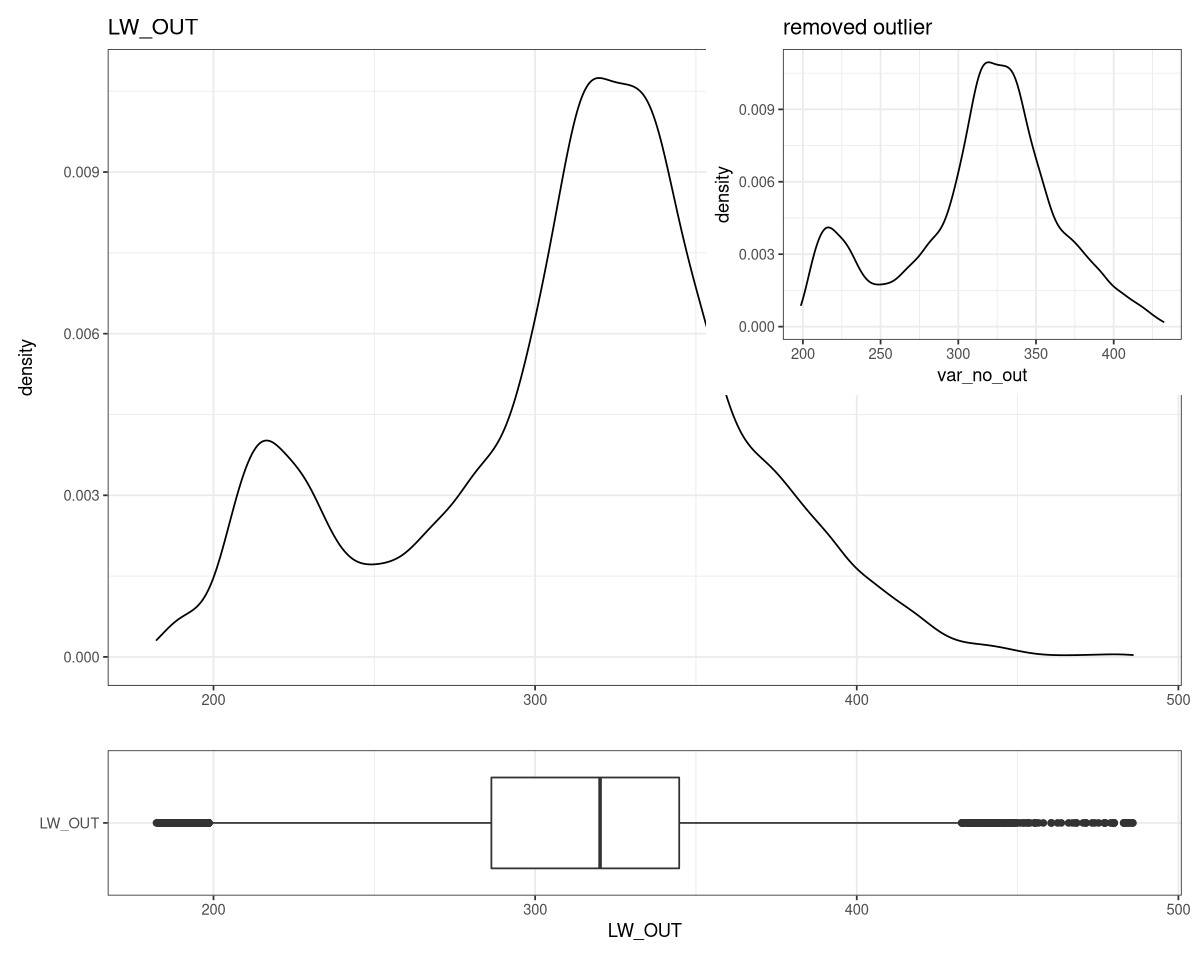

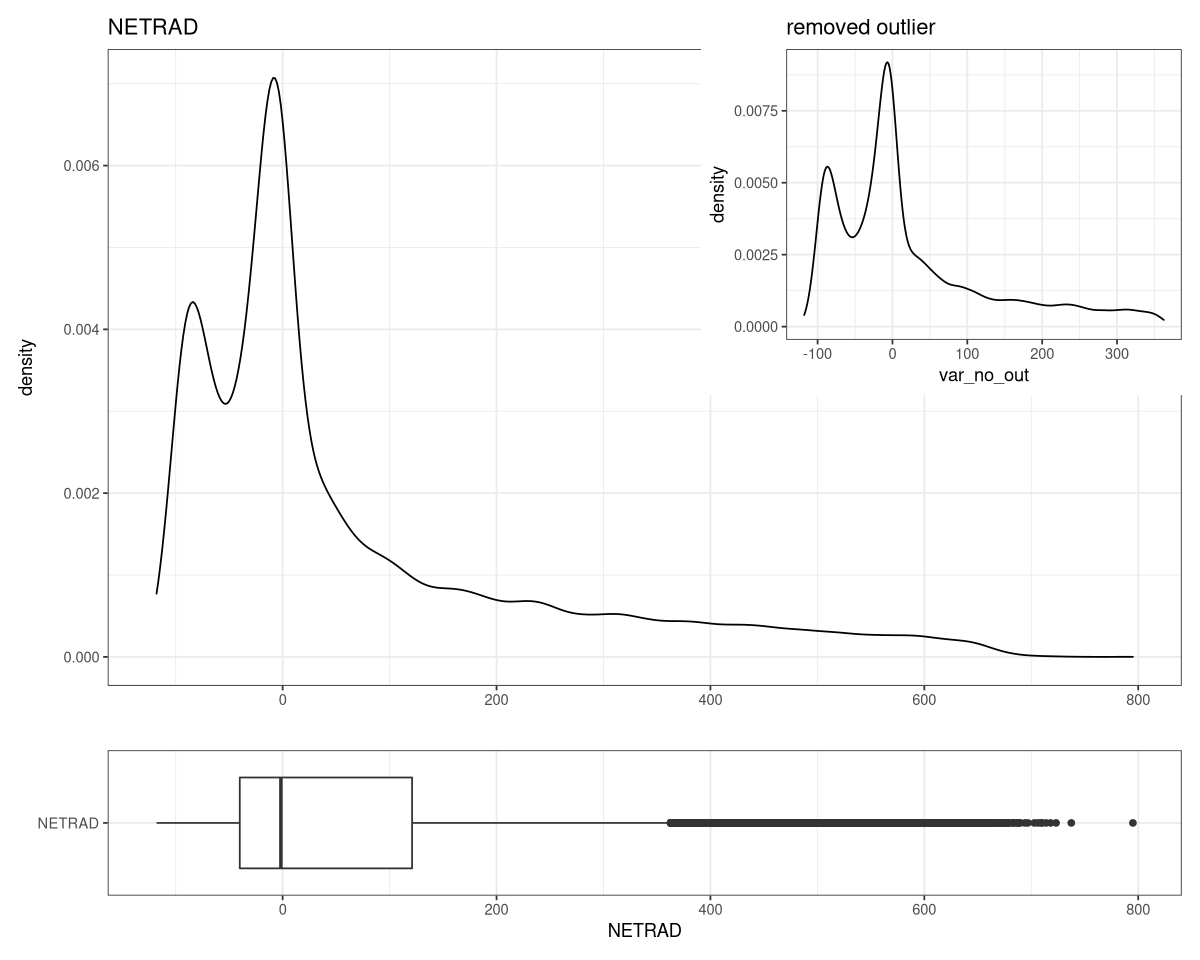

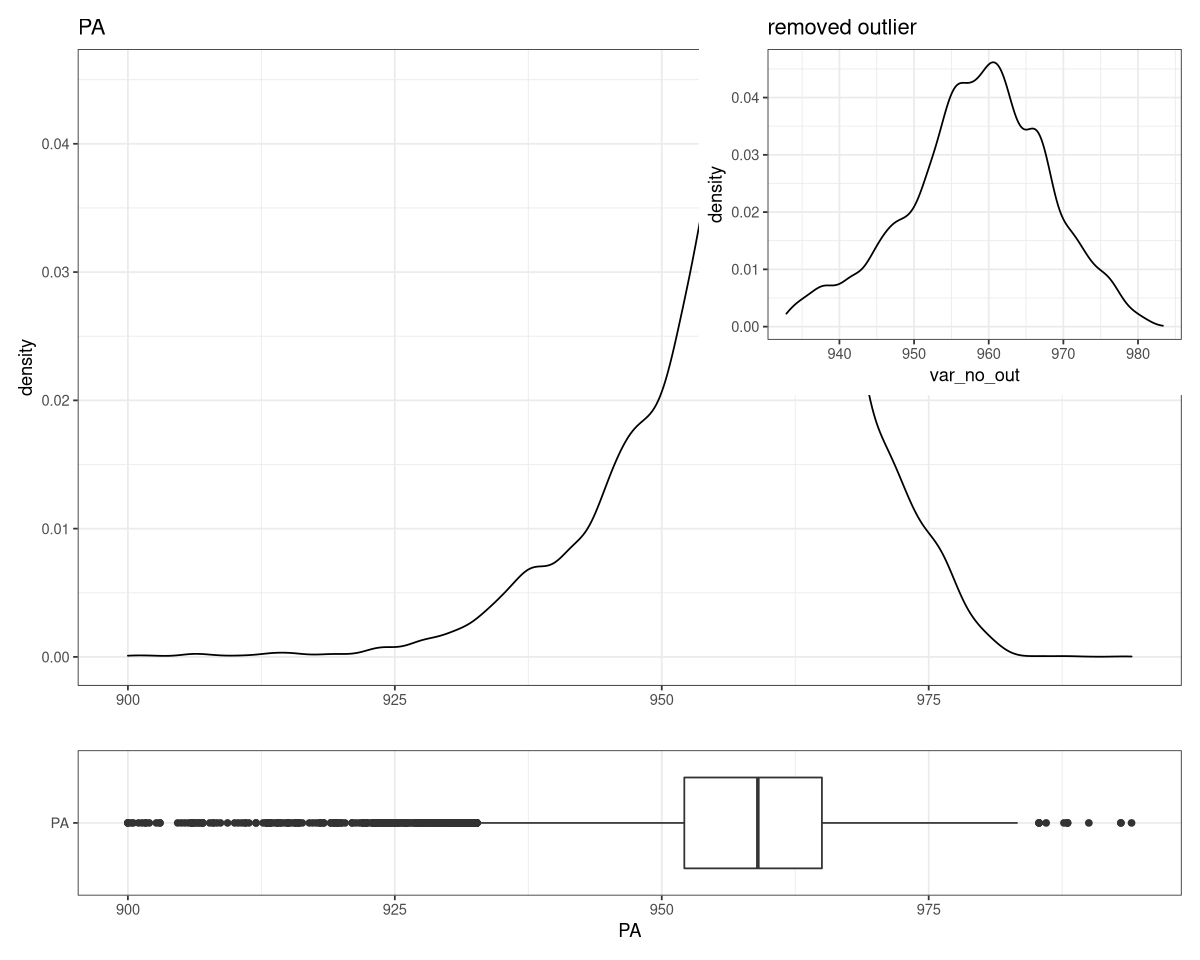

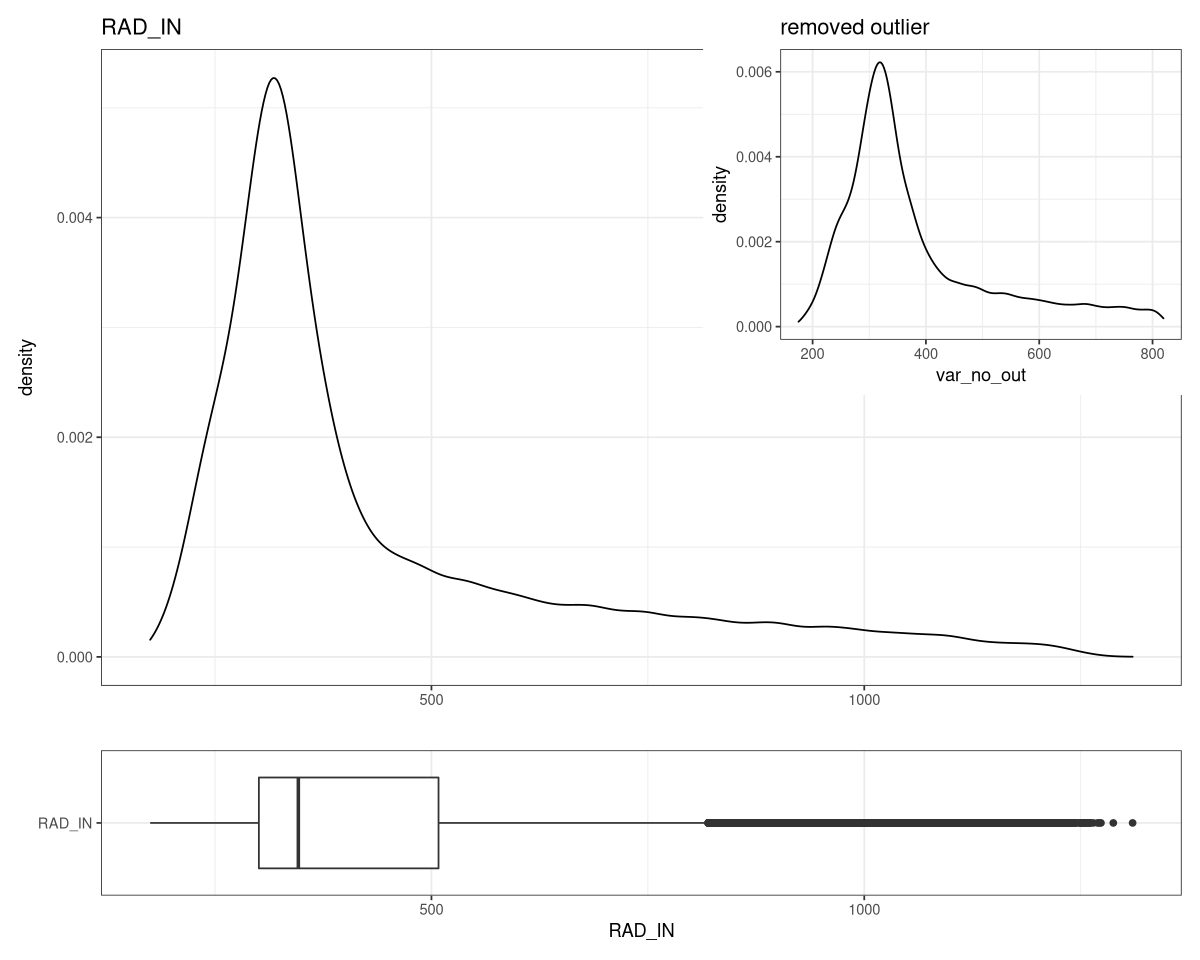

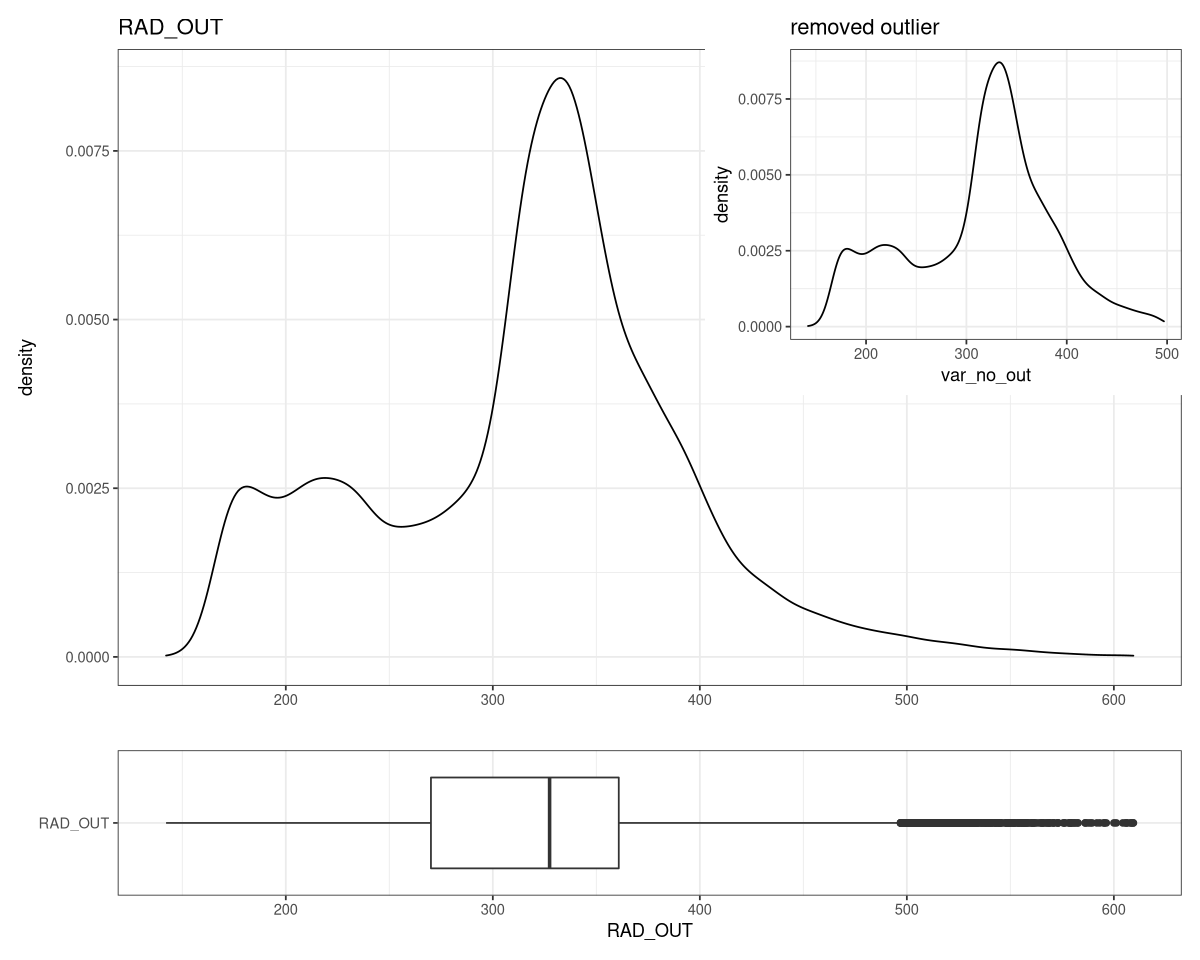

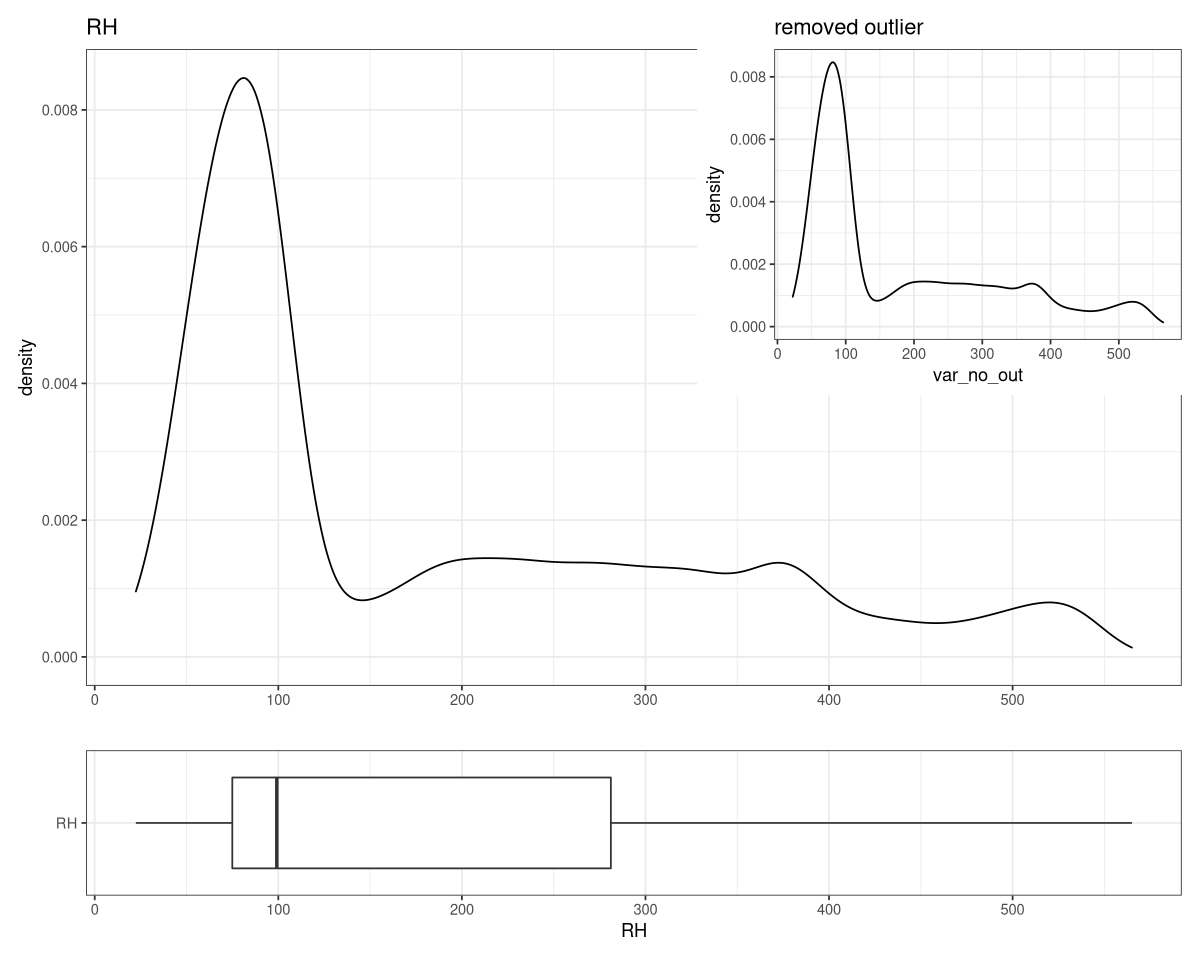

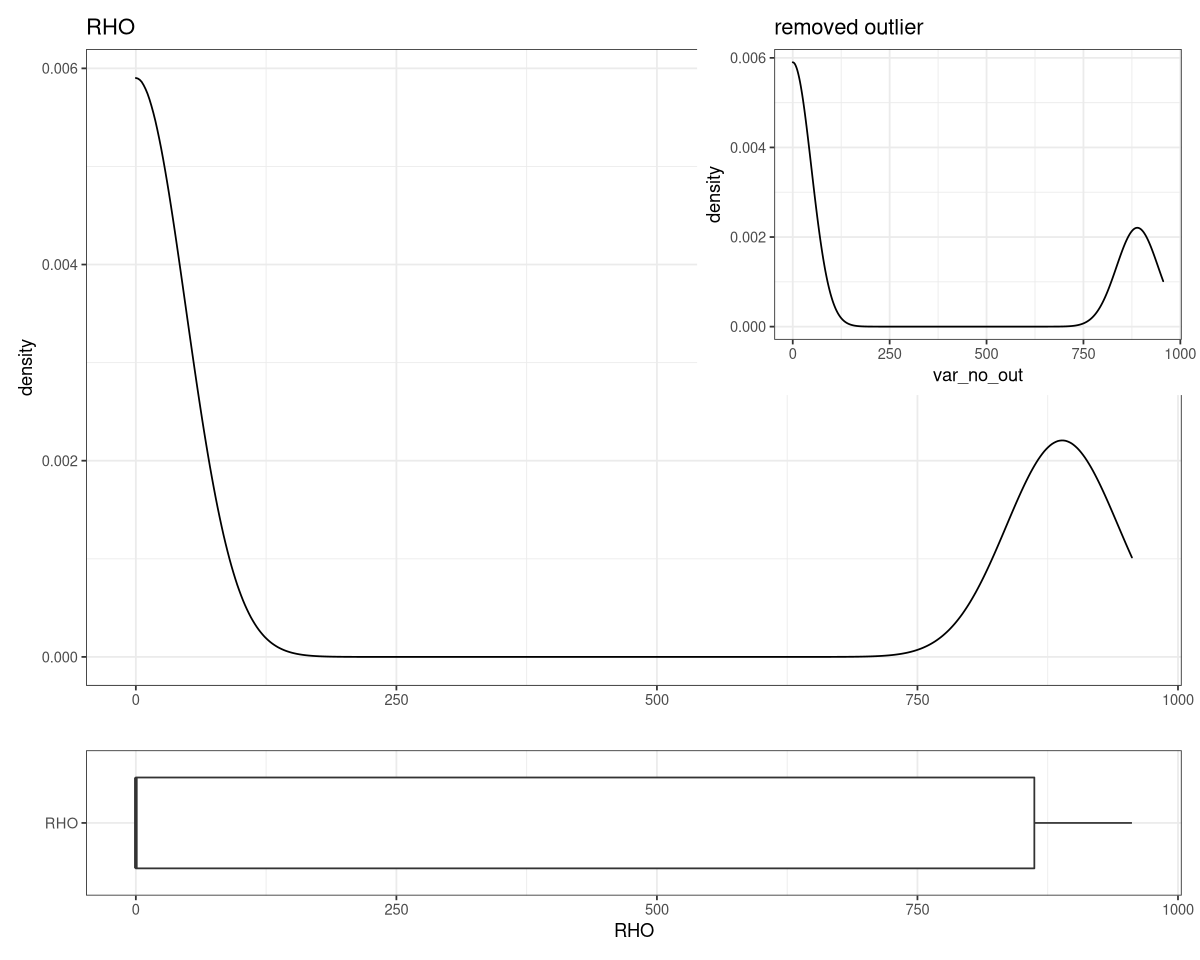

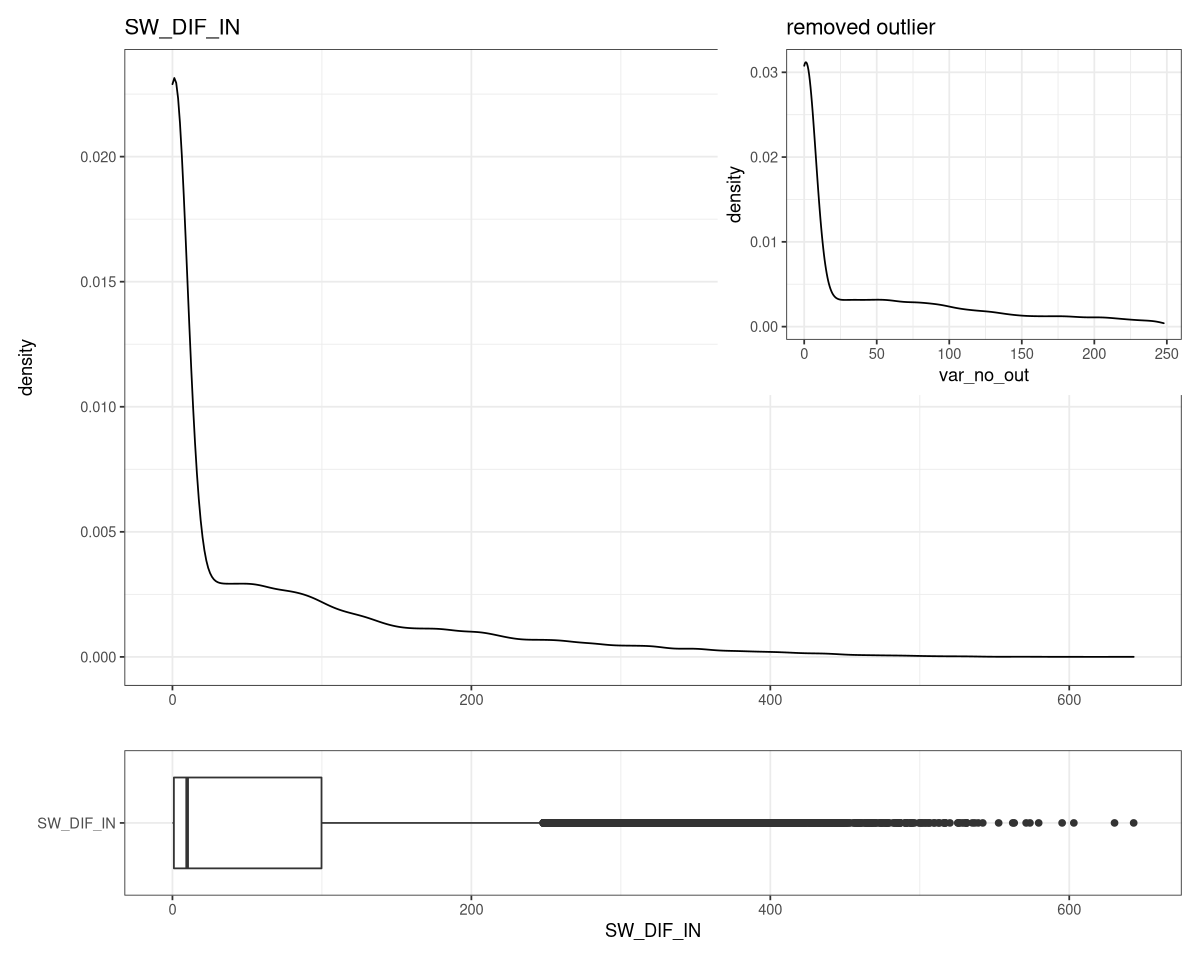

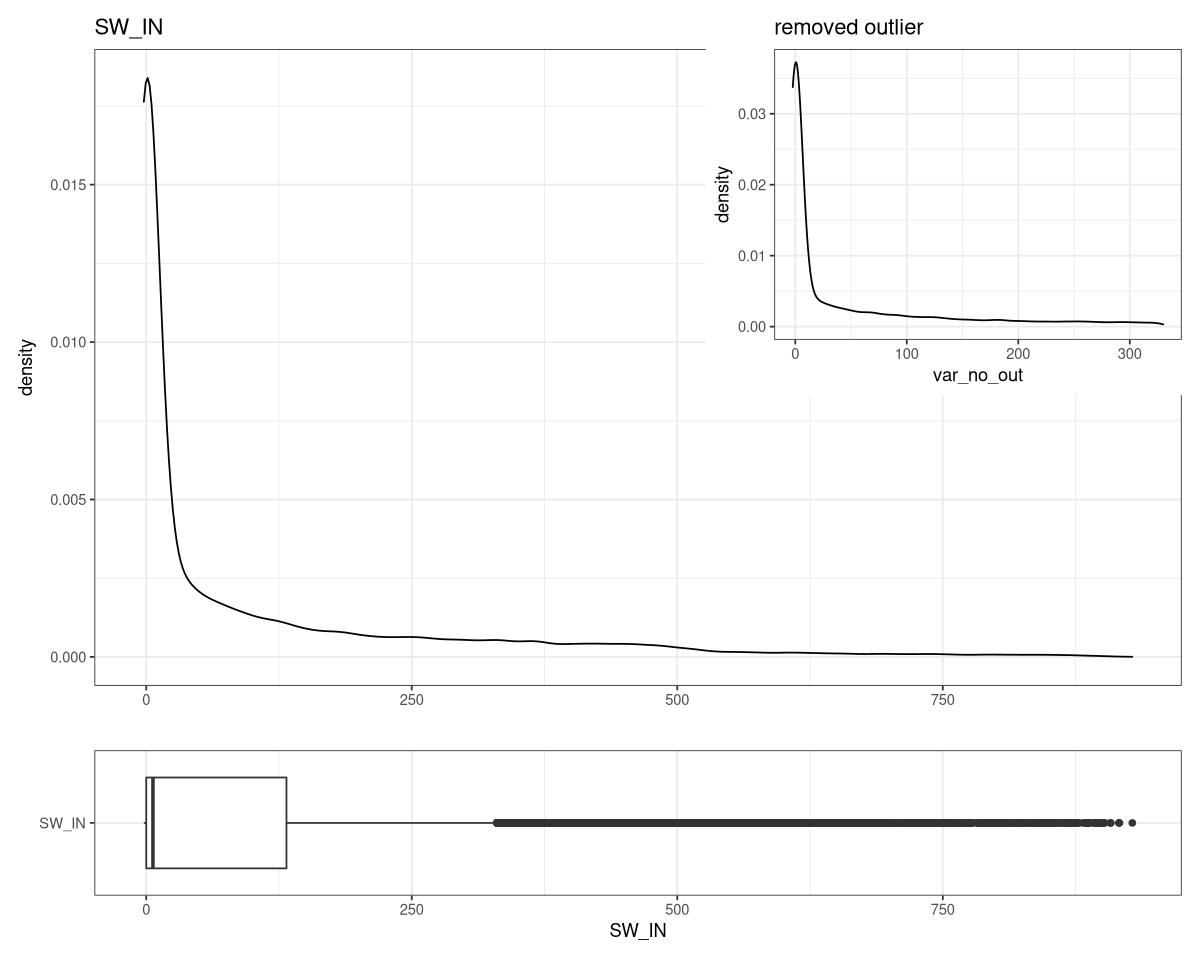

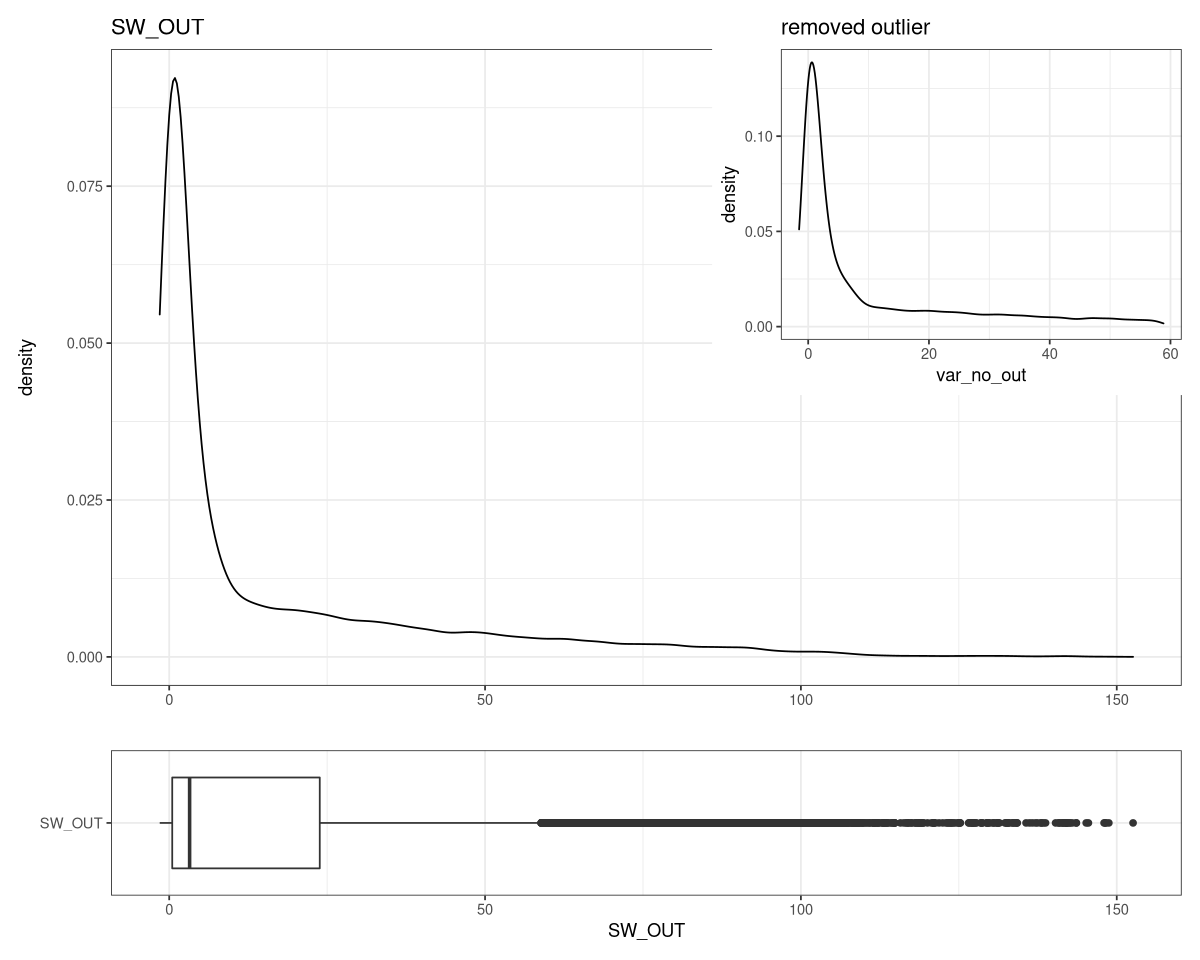

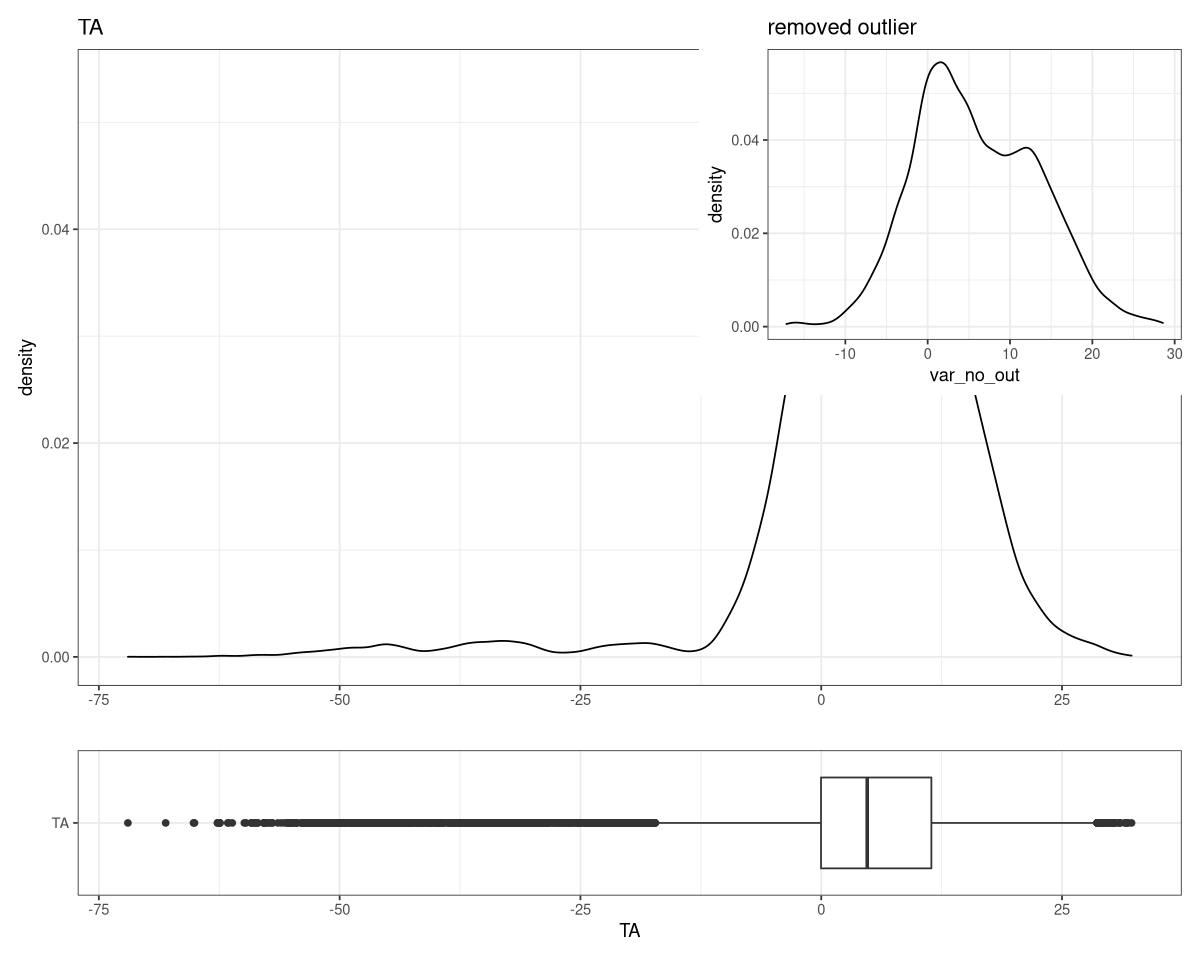

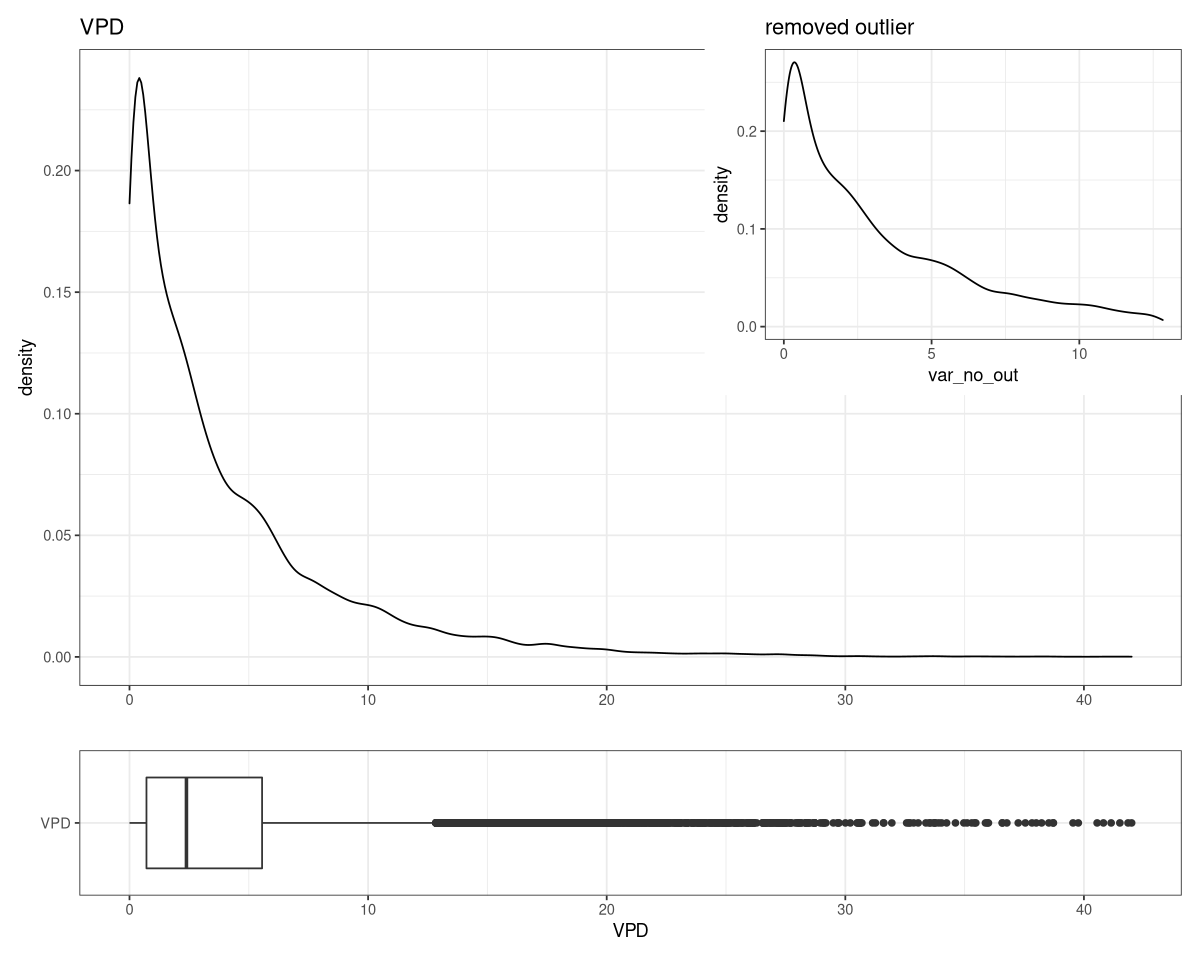

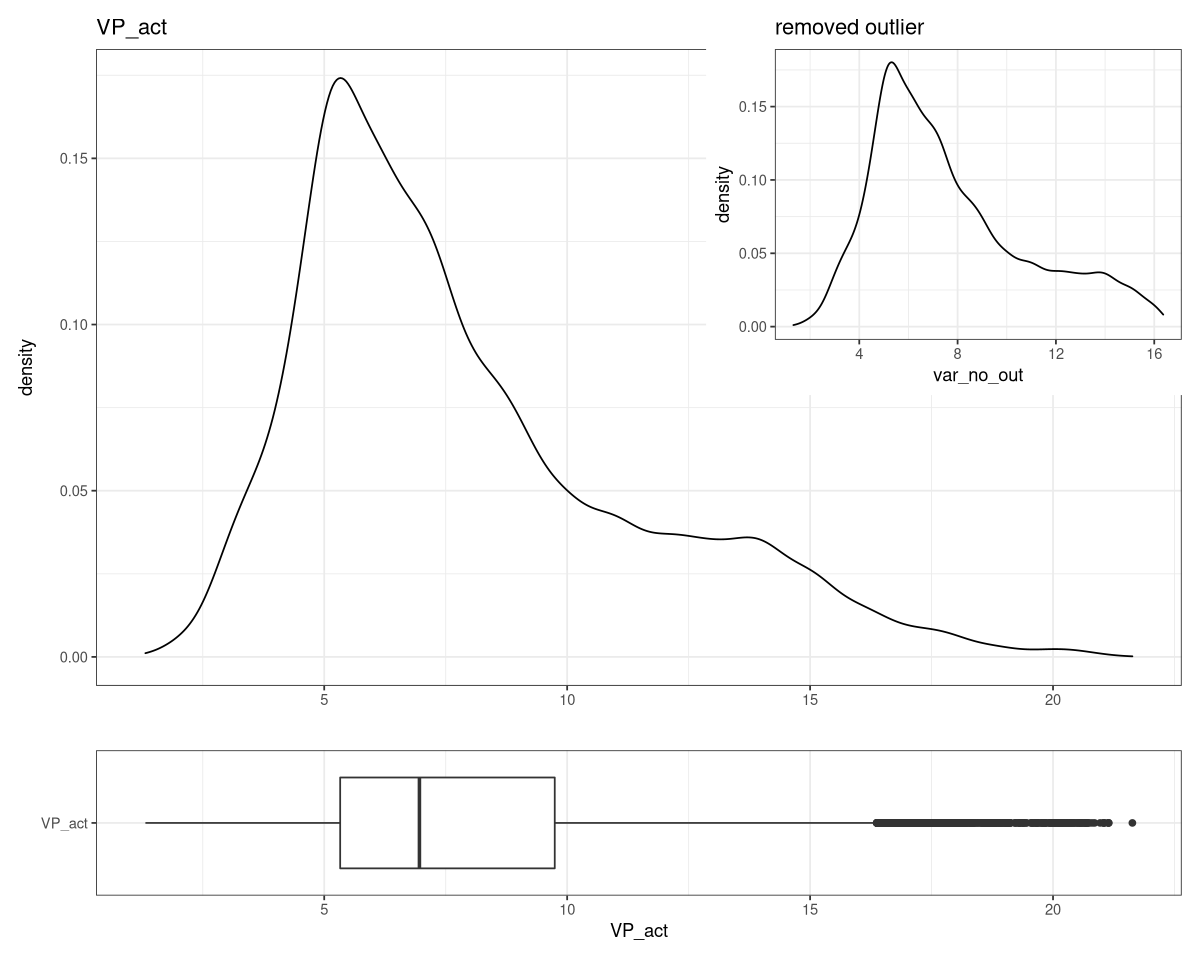

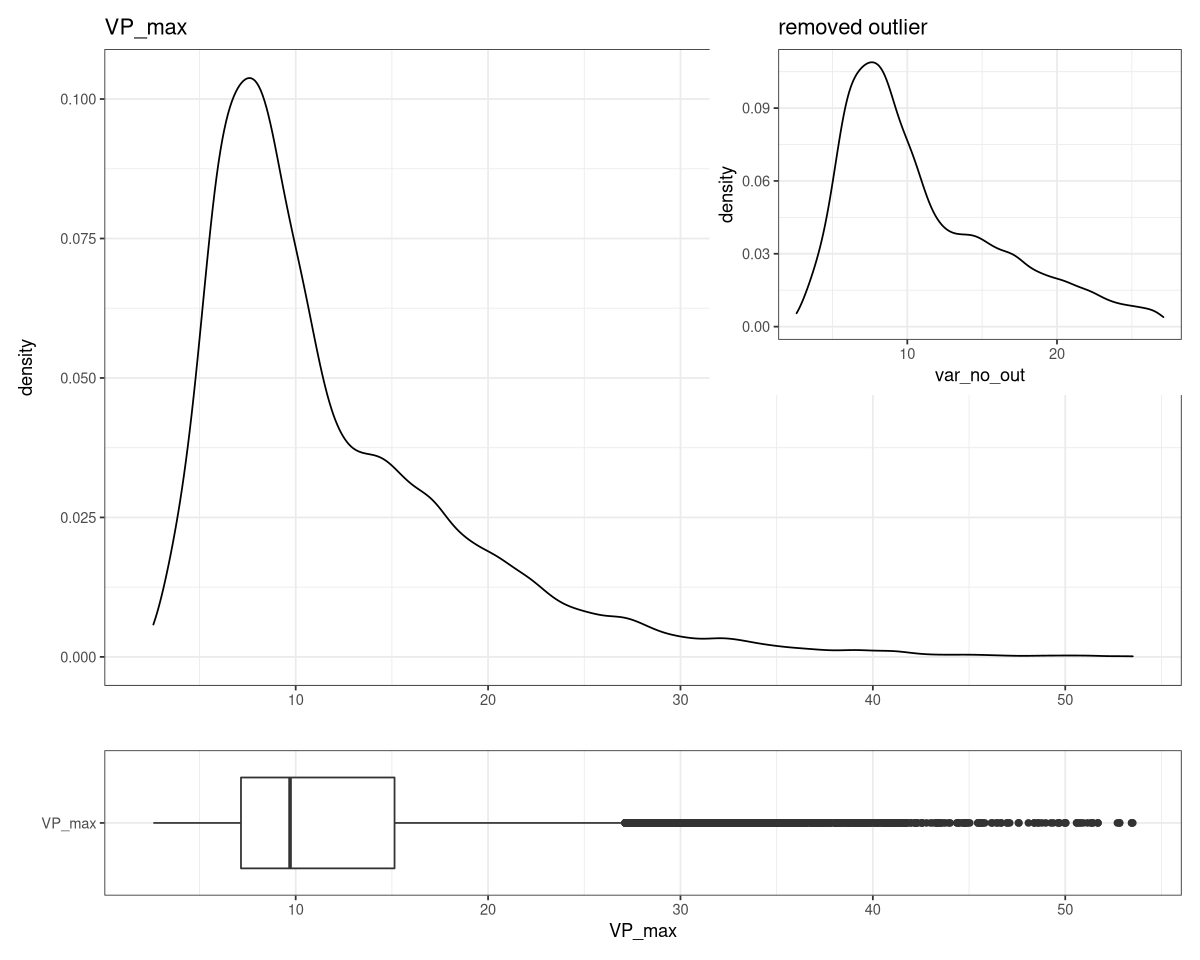

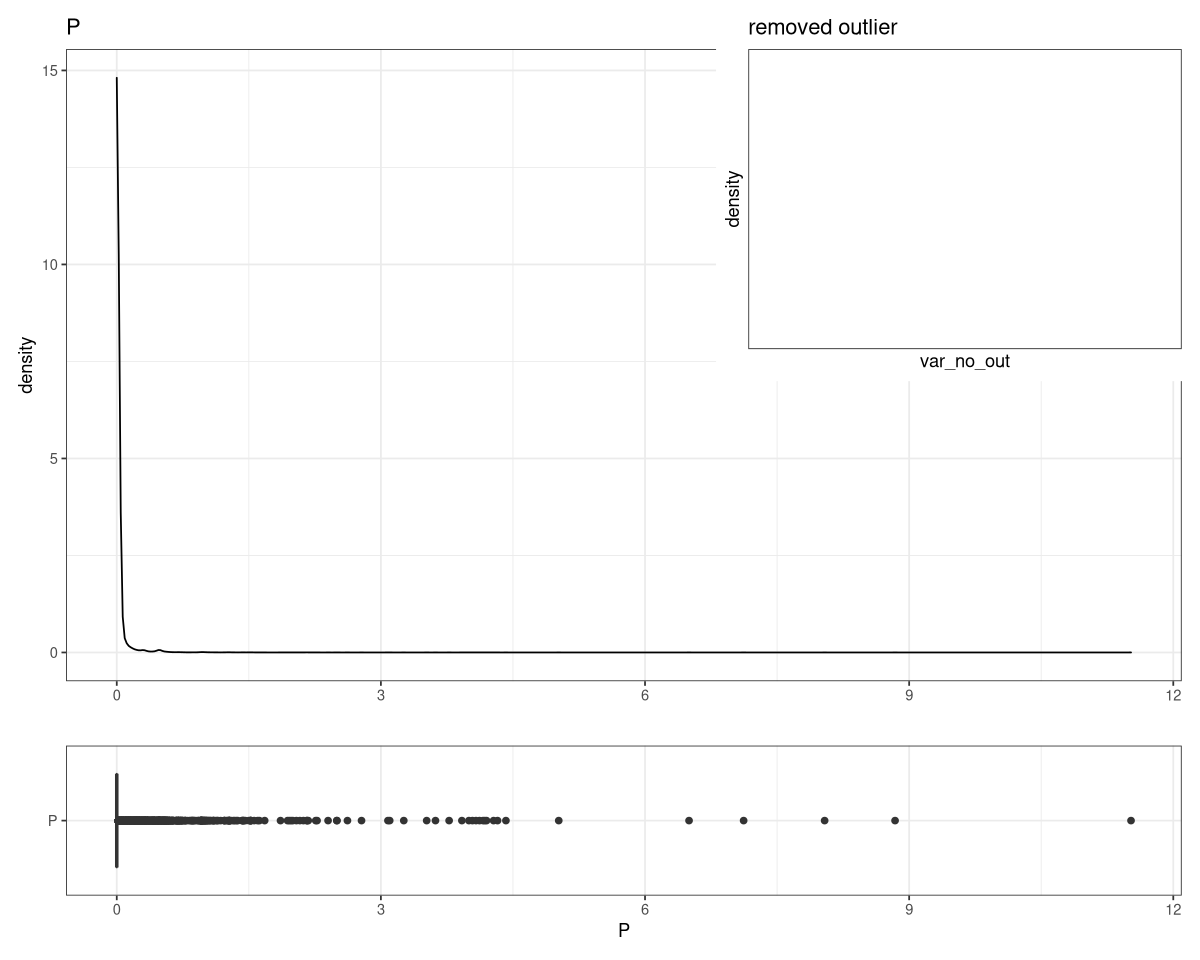

In [151]:
walk(names(ec)[-1], expl_var)

# Testing groud

removed RHO because a lot of data was 0 and was redundant

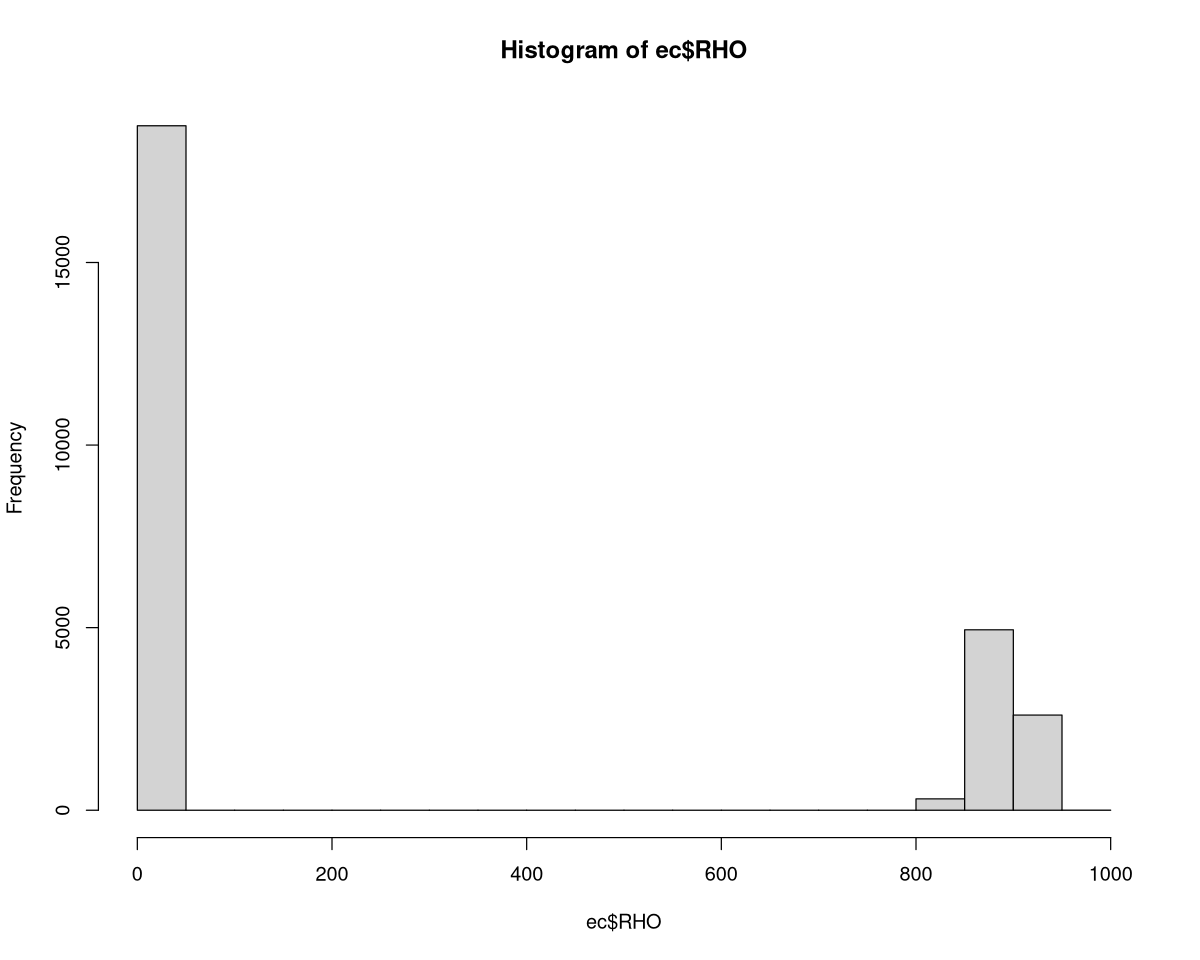

In [158]:
#hist(ec$RHO)

In [164]:
#mean(ec$RHO<1)

[1] 0.7045557

Air pressure variable is always constant so it was removed from the dataset

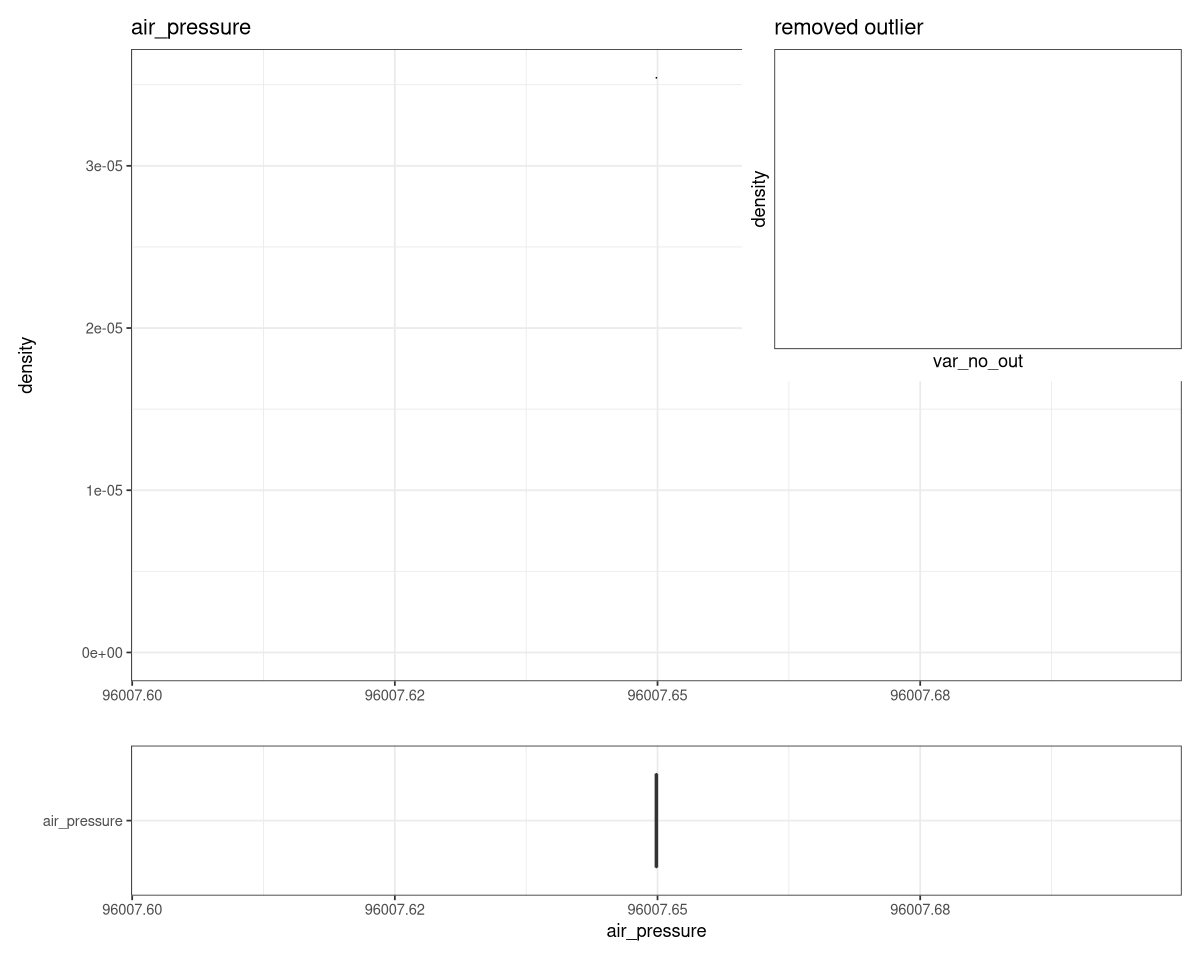

In [152]:
#expl_var("air_pressure")

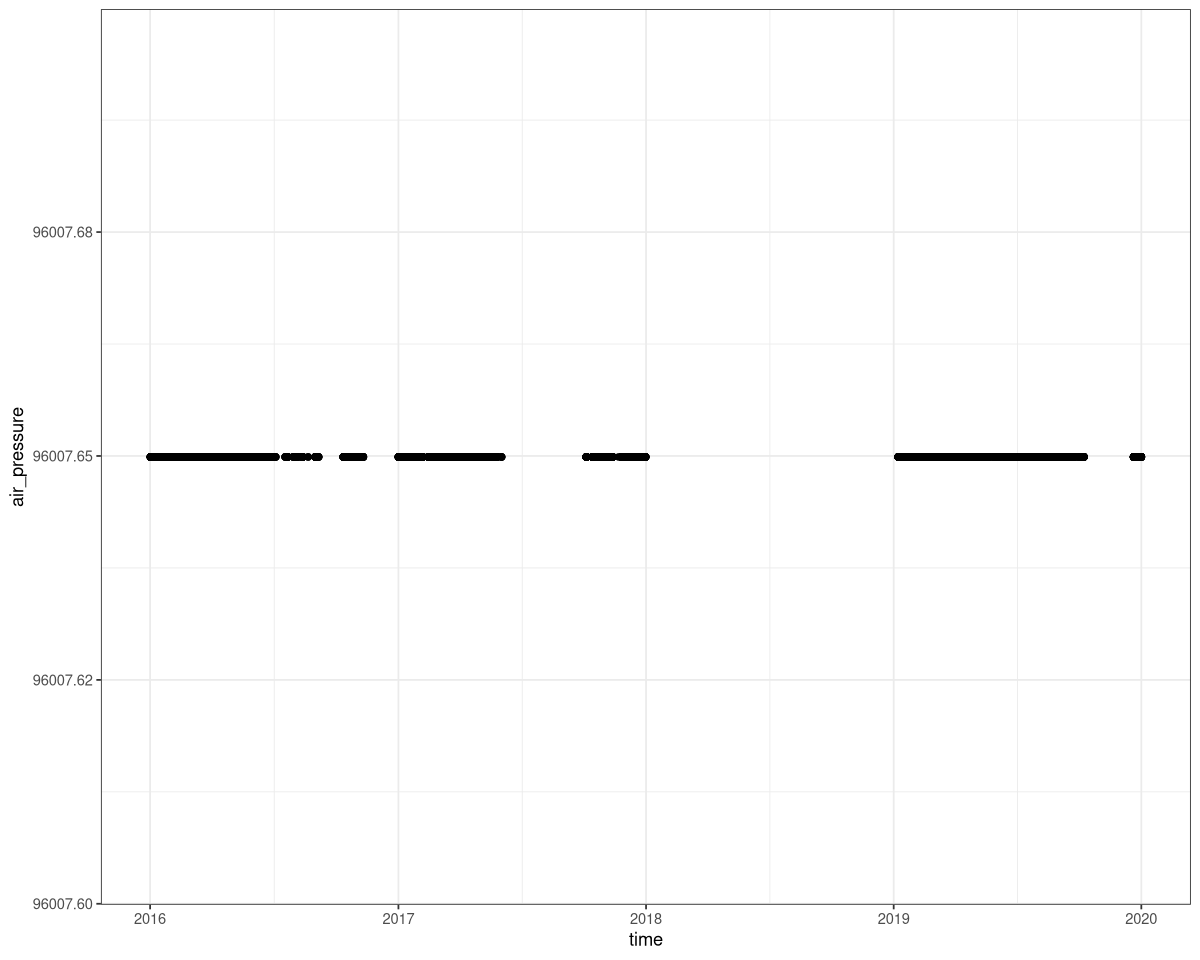

In [157]:
# ec %>%
#     ggplot()+
#     geom_point(aes(time, air_pressure))

# Old plots

I think there is something wrong here

bowen_ratio 
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-20050.88     -1.31      0.36      1.56      2.41  37145.47 


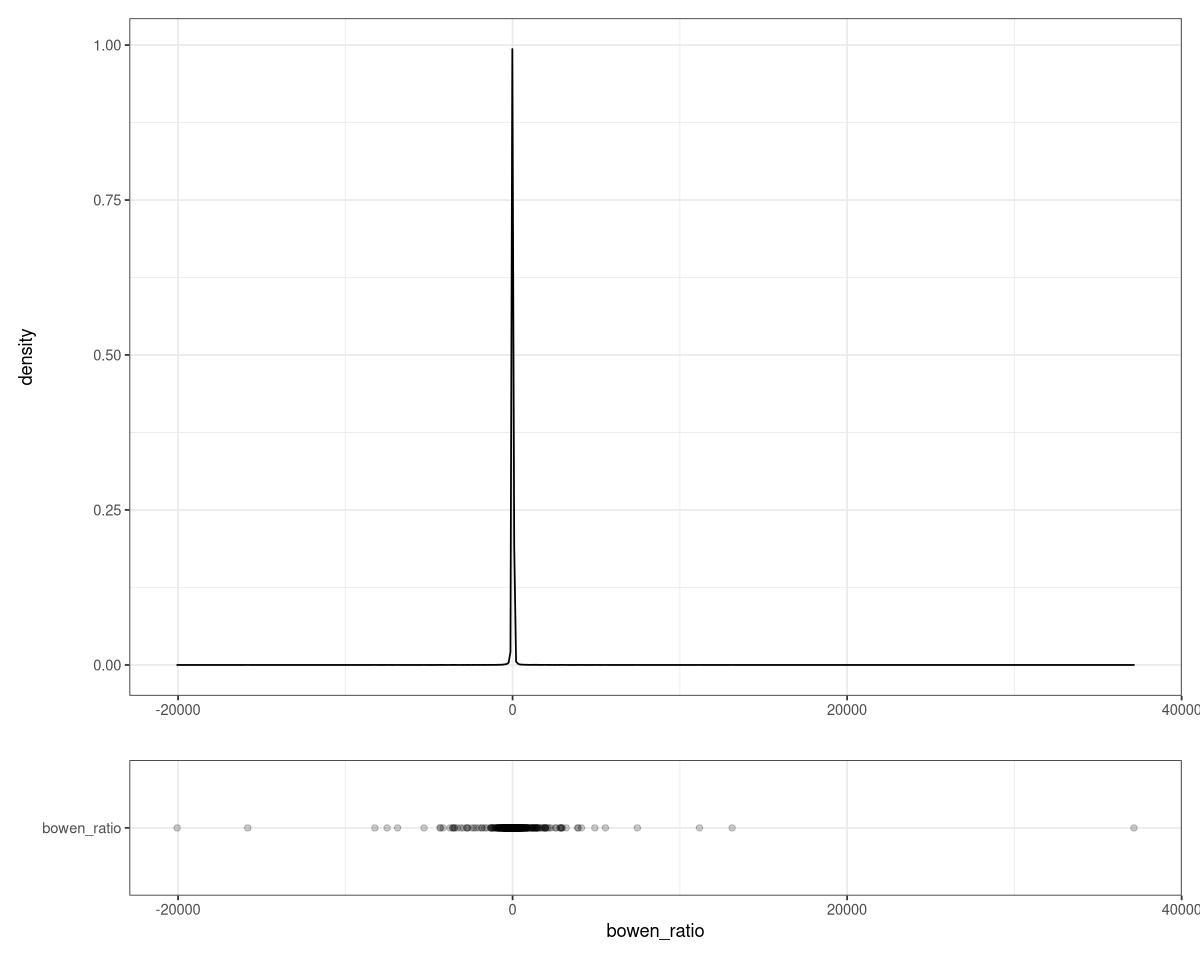

In [101]:
expl_var("bowen_ratio")

co2_flux 
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-296.6263   -2.9655    0.1487   -1.8195    1.7847  375.3208 


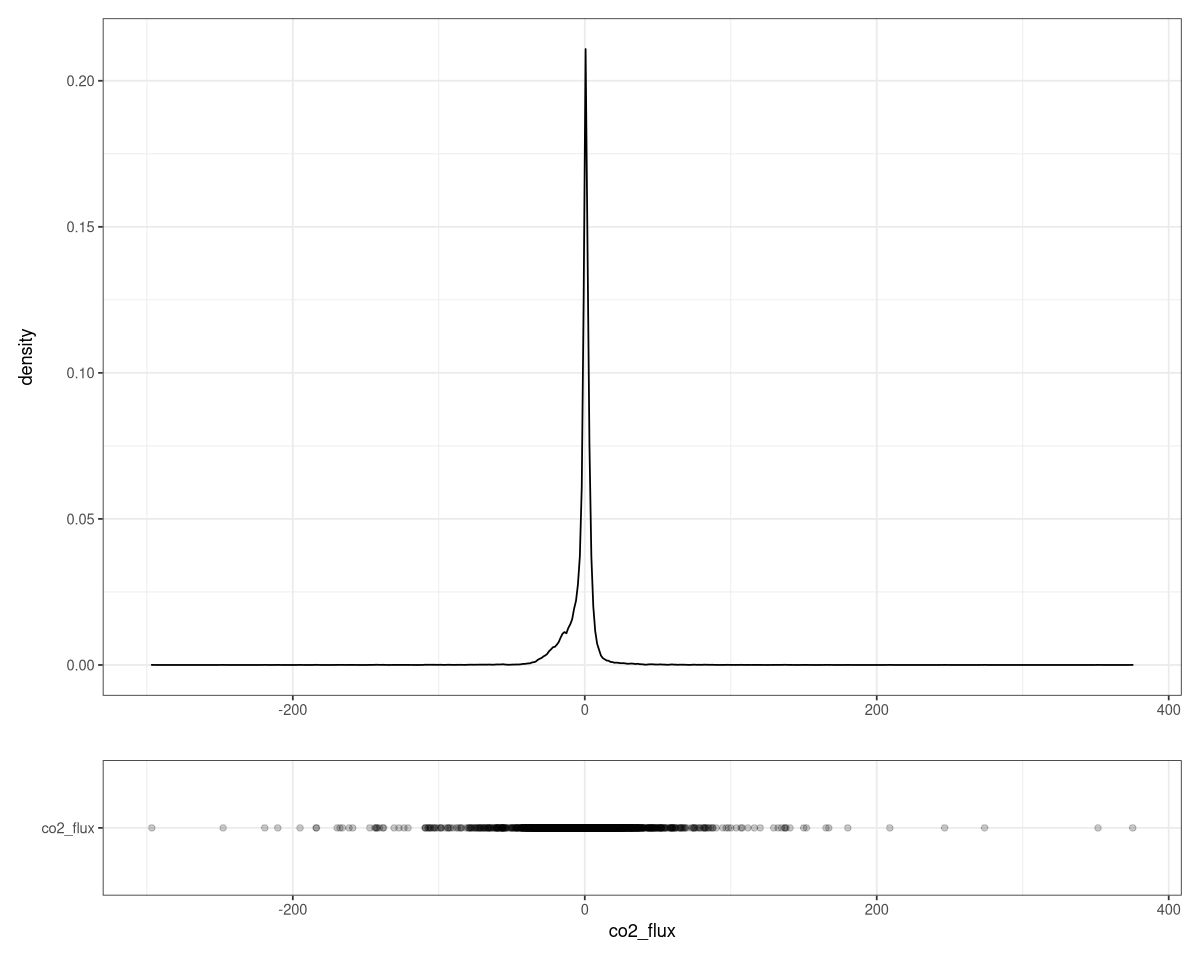

In [102]:
expl_var("co2_flux")

In [103]:
expl_var("air_temperature")

air_temperature 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  257.6   283.7   286.3   287.9   291.0   313.0 


In [104]:
expl_var("co2_mixing_ratio")

co2_mixing_ratio 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  299.9   376.9   397.5   396.7   414.6   599.8 


In [105]:
expl_var("co2_scf")

co2_scf 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.002   1.009   1.015   1.016   1.020   1.264 


co2_spikes 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    7.00   22.00   40.84   45.00 1416.00 


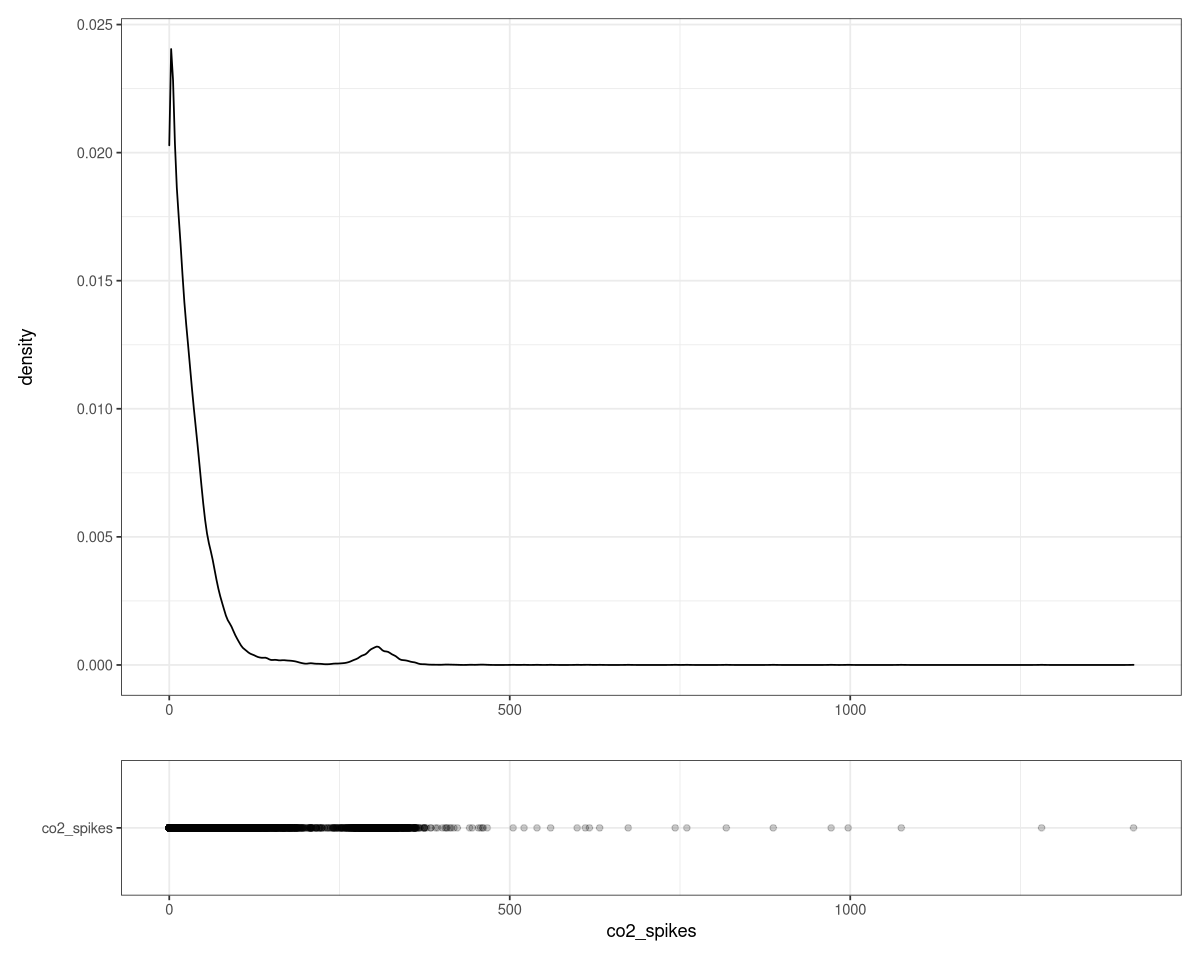

In [106]:
expl_var("co2_spikes")

co2_var 
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.004    0.187    0.650   21.609    2.464 7854.738 


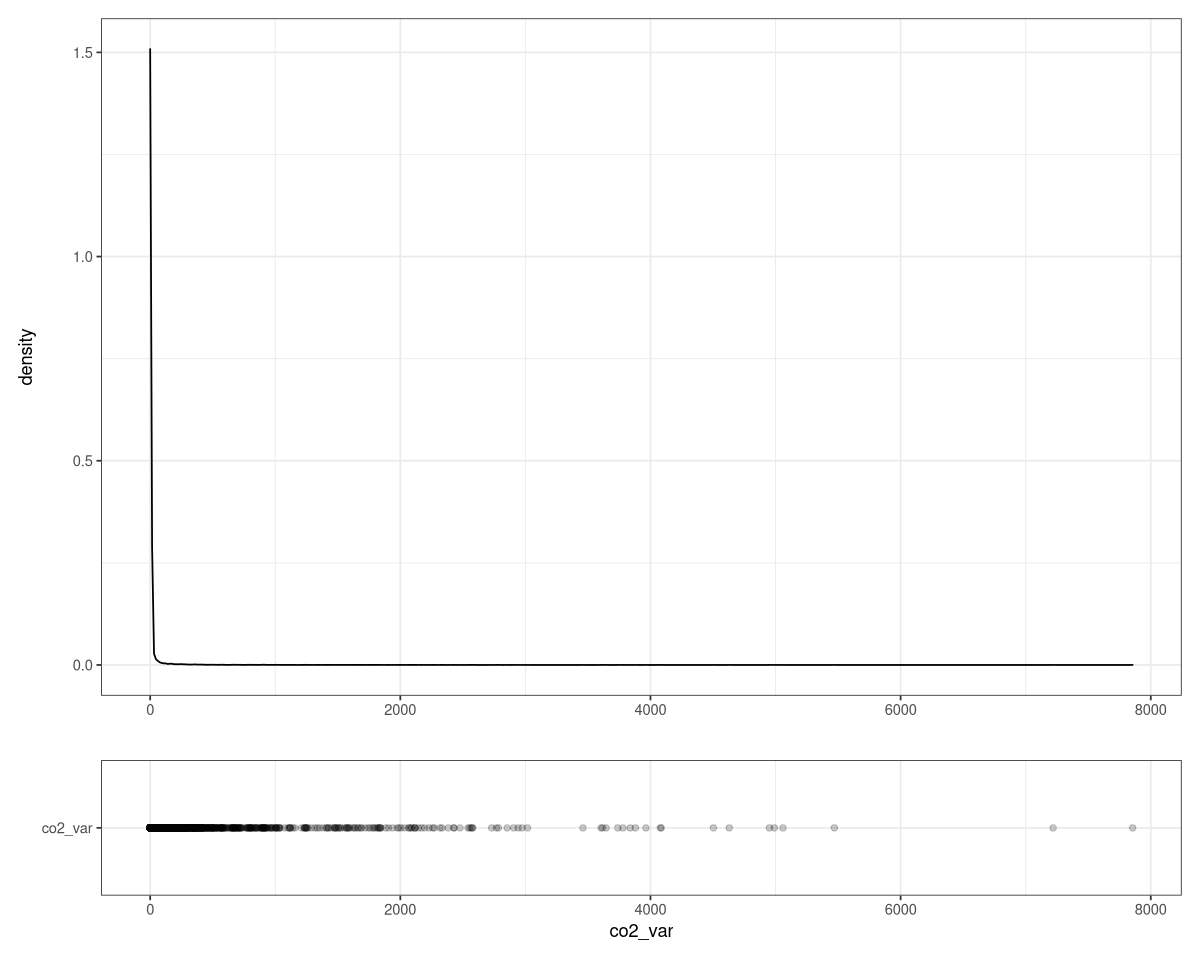

In [107]:
expl_var("co2_var")

max_wind_speed 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3933  5.2959  7.4190  8.2317 10.3876 30.1055 


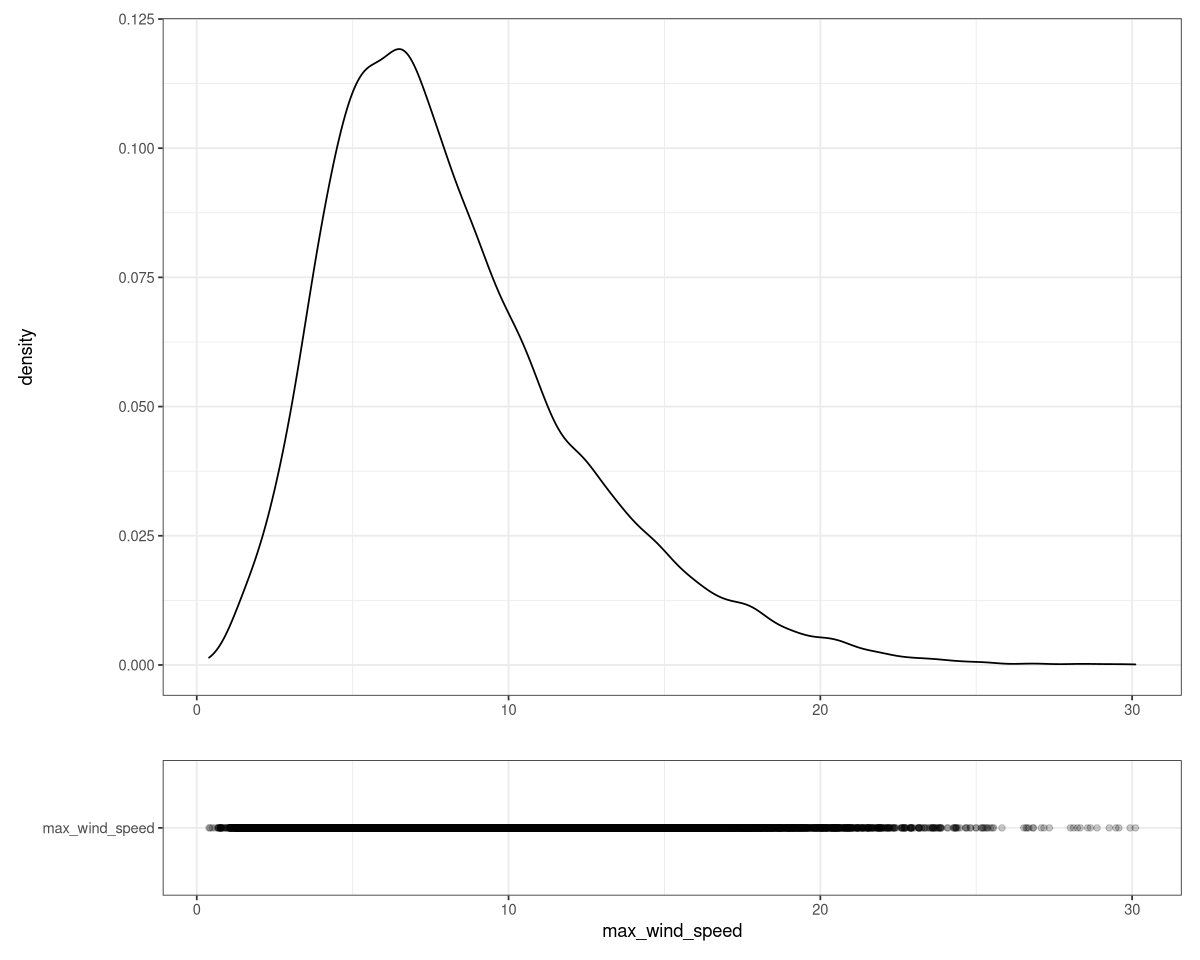

In [109]:
expl_var("max_wind_speed")

This is not a good representation

qc_co2_flux 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.7249  1.0000  2.0000 


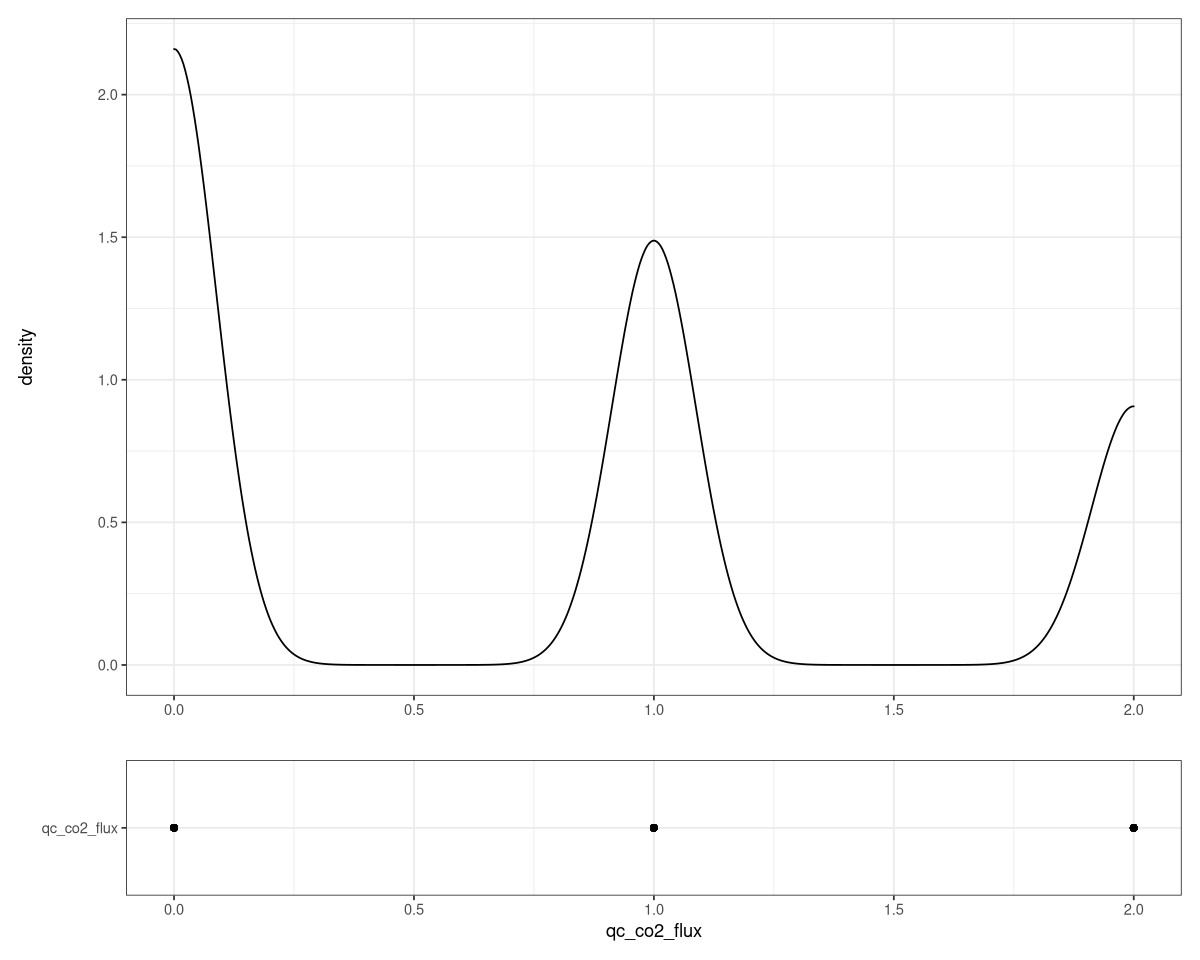

In [110]:
expl_var("qc_co2_flux")

This is probably redundant

sonic_temperature 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  258.0   284.8   287.5   289.1   292.2   314.5 


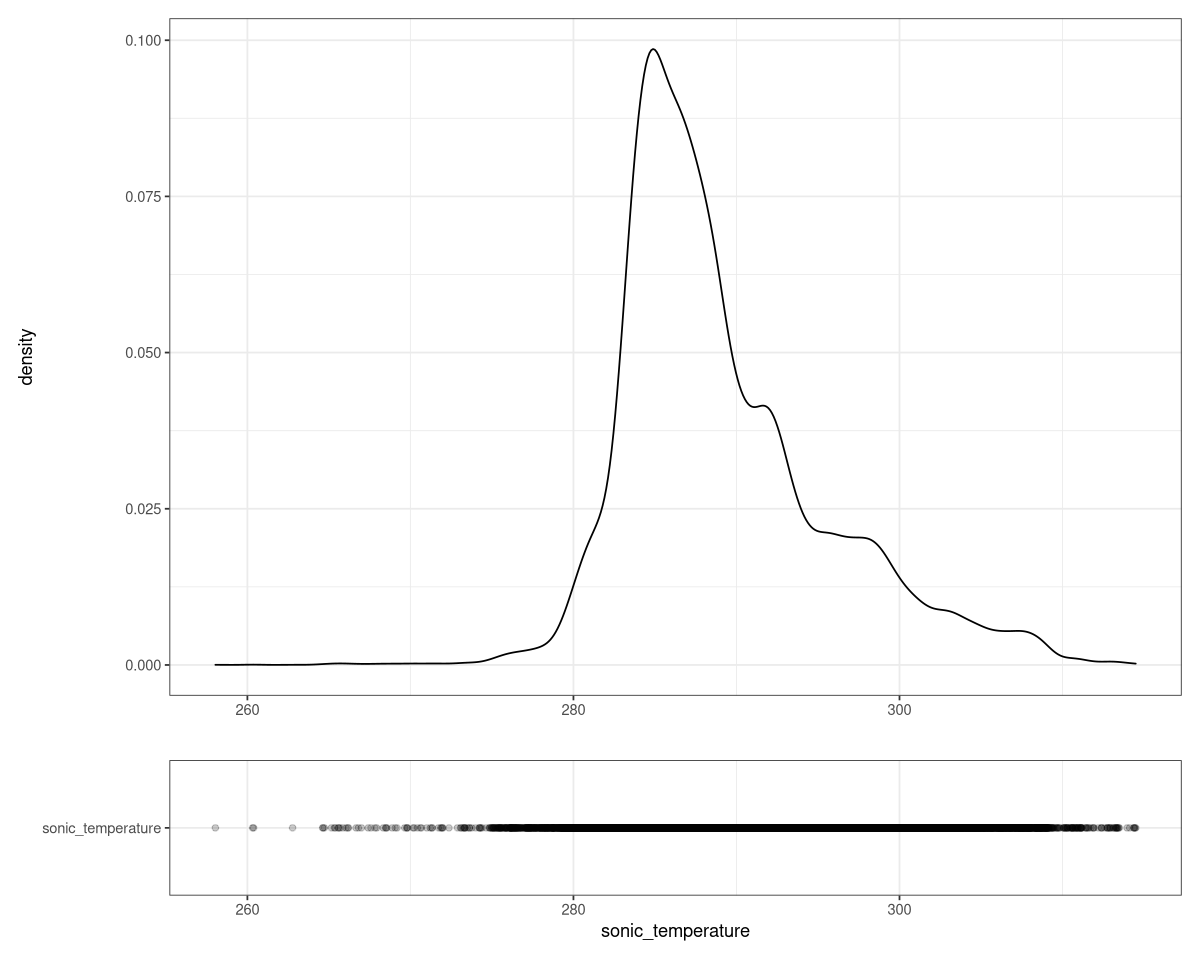

In [111]:
expl_var("sonic_temperature")

ts_spikes 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    5.00   16.69   18.00 1021.00 


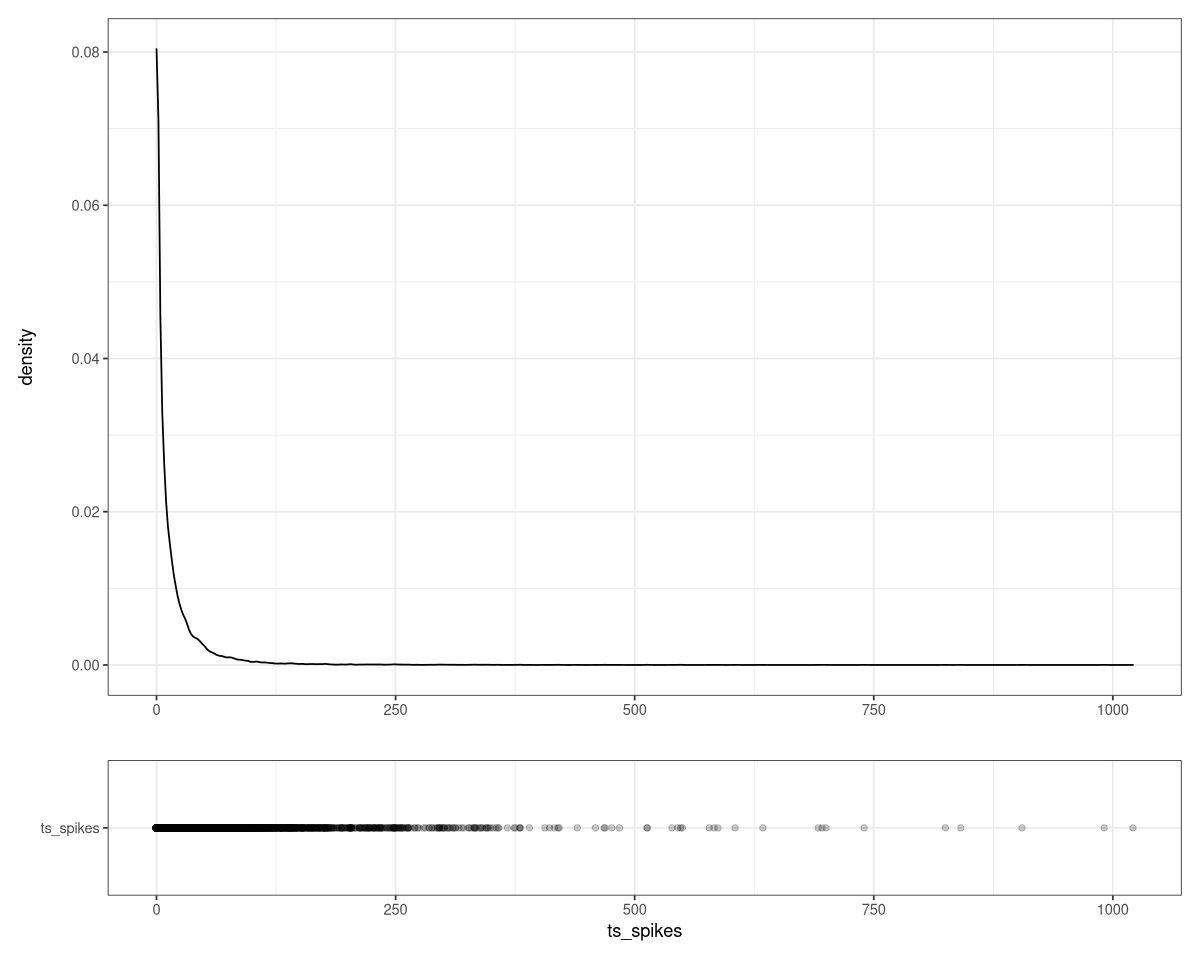

In [112]:
expl_var("ts_spikes")

ts_var 
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00027  0.01336  0.04103  0.35382  0.13774 78.32929 


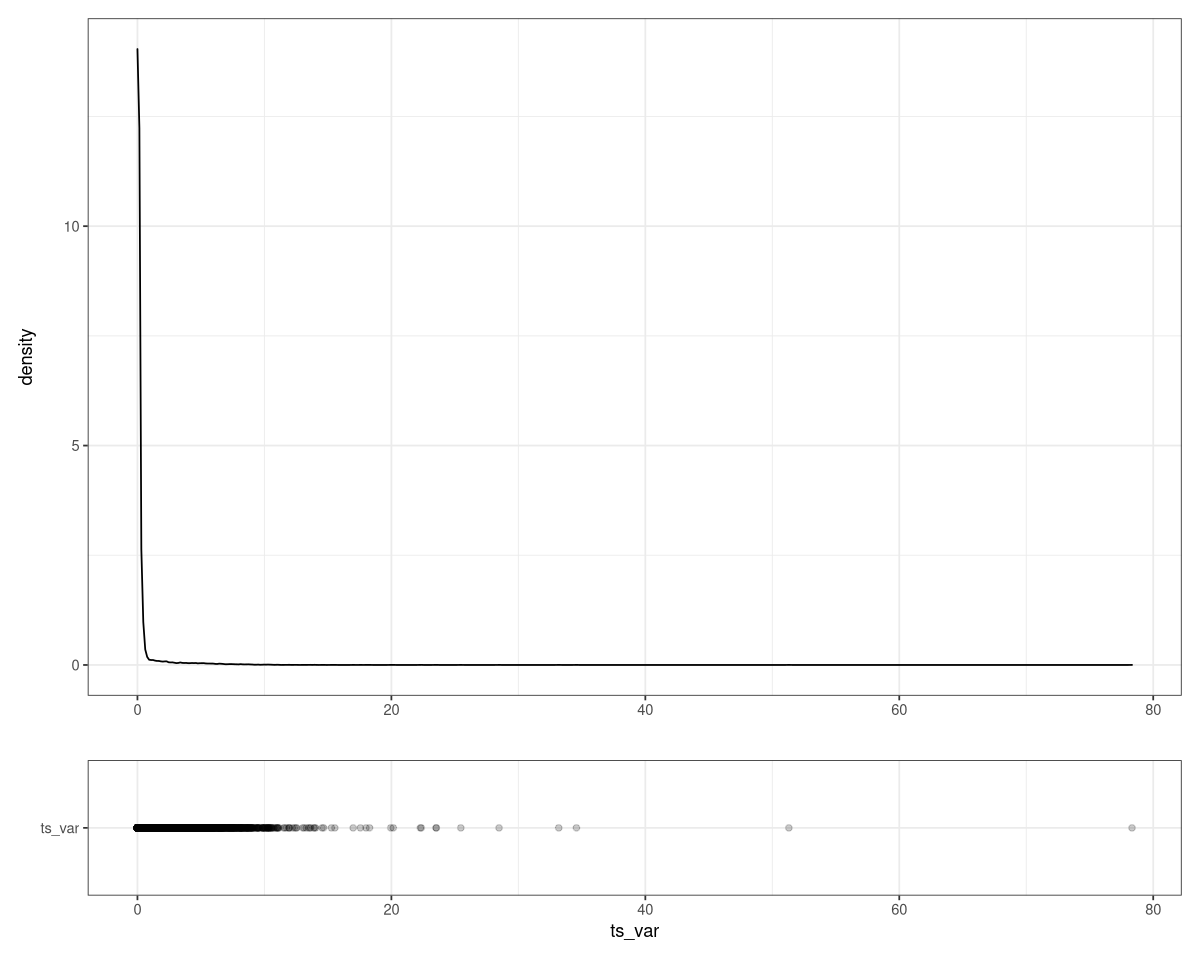

In [113]:
expl_var("ts_var")

In [114]:
expl_var("u_spikes")

u_spikes 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   3.000   6.937   7.000 836.000 


u_unrot 
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.5632  -3.1808  -1.9493  -1.4109   0.4629   6.6046 


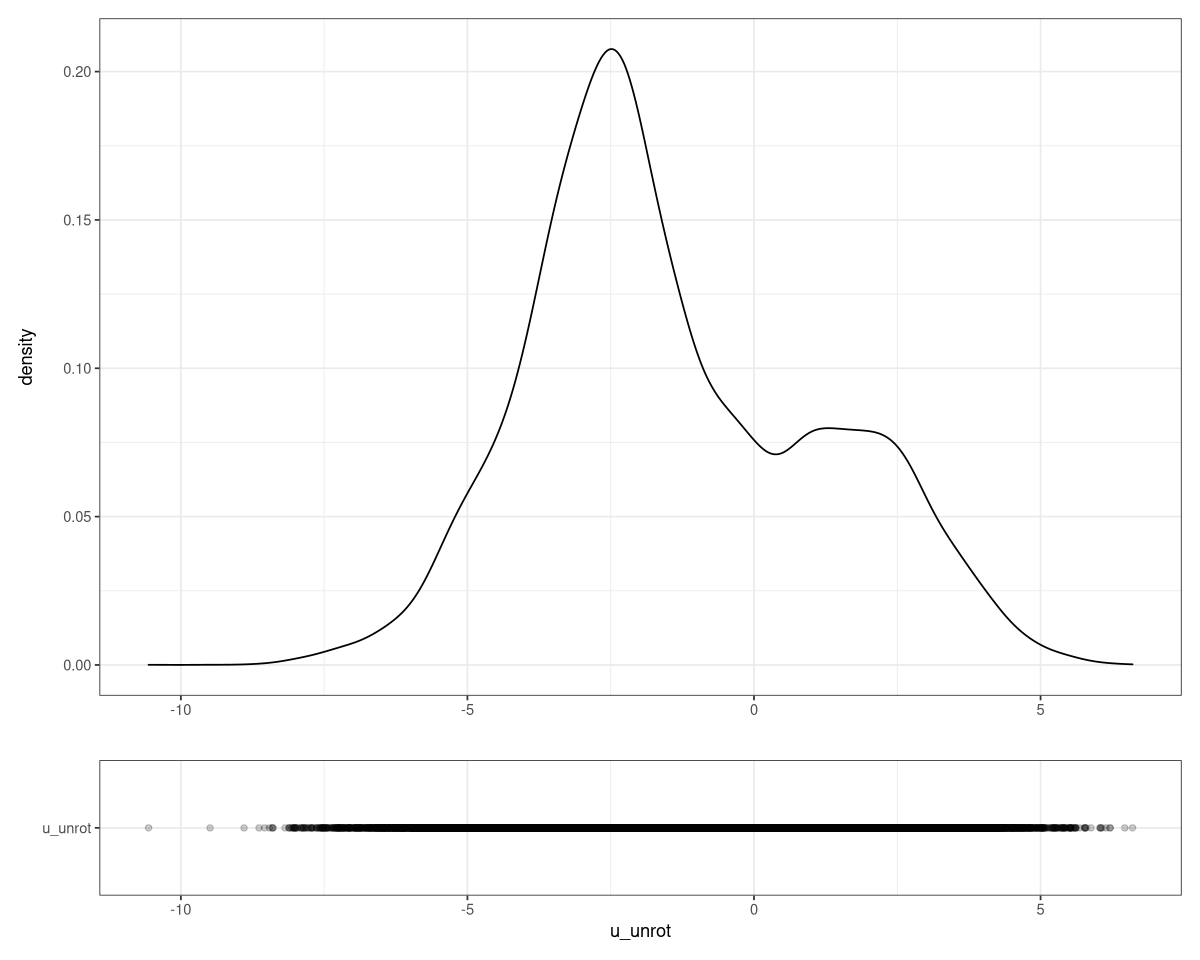

In [115]:
expl_var("u_unrot")

u_var 
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.003065  0.670561  1.449488  2.207558  2.919815 26.286975 


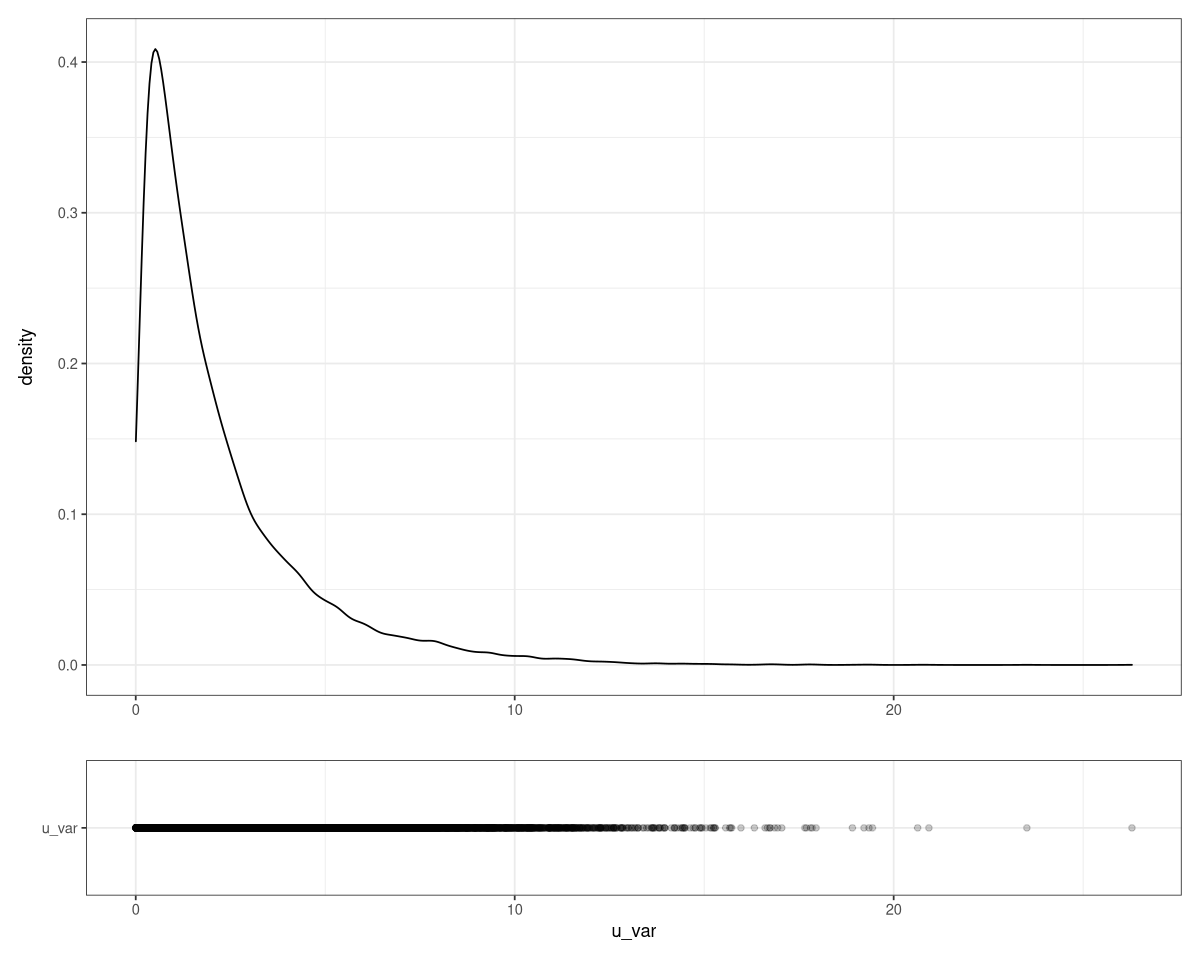

In [116]:
expl_var("u_var")

v_spikes 
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.000    2.000    5.000    8.736   10.000 1079.000 


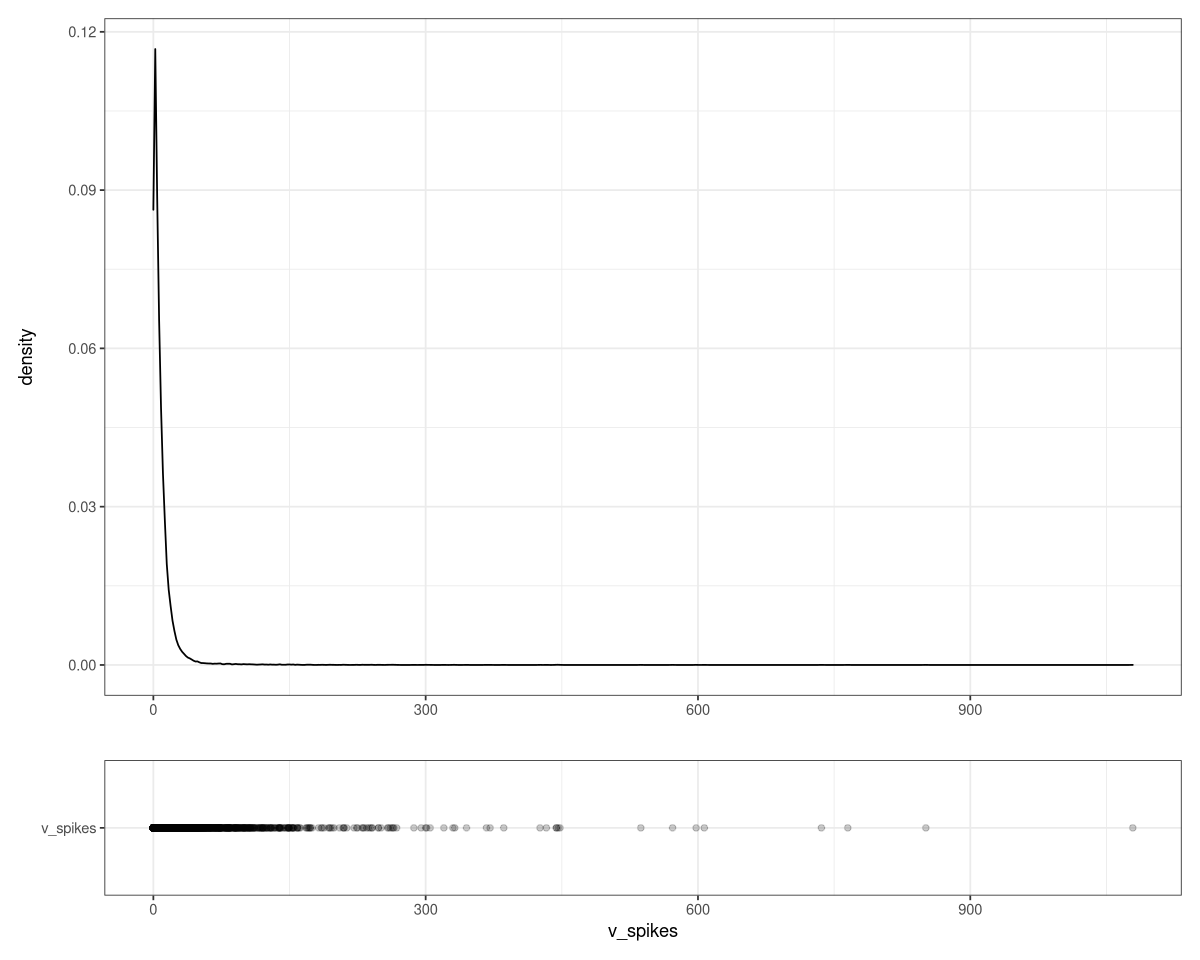

In [117]:
expl_var("v_spikes")

v_unrot 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-6.3493 -1.7573 -0.5517 -0.4635  0.7421  6.3973 


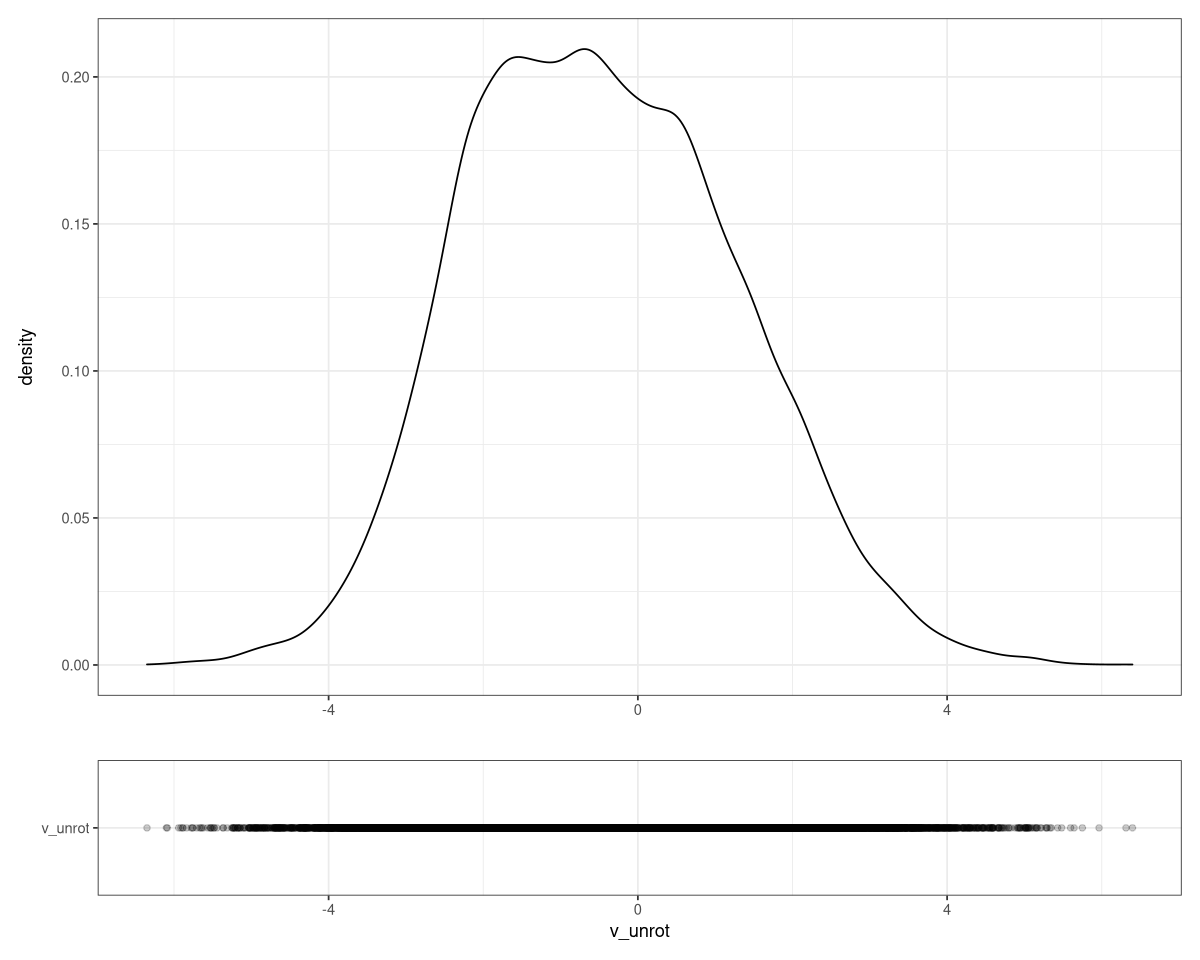

In [118]:
expl_var("v_unrot")

In [119]:
expl_var("v_var")

v_var 
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.005149  0.459081  0.987051  1.470459  1.966076 17.851076 


In [120]:
expl_var("w_spikes")

w_spikes 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   1.255   0.000 594.000 


w_unrot 
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.05910 -0.04817  0.02228  0.01043  0.09768  1.21453 


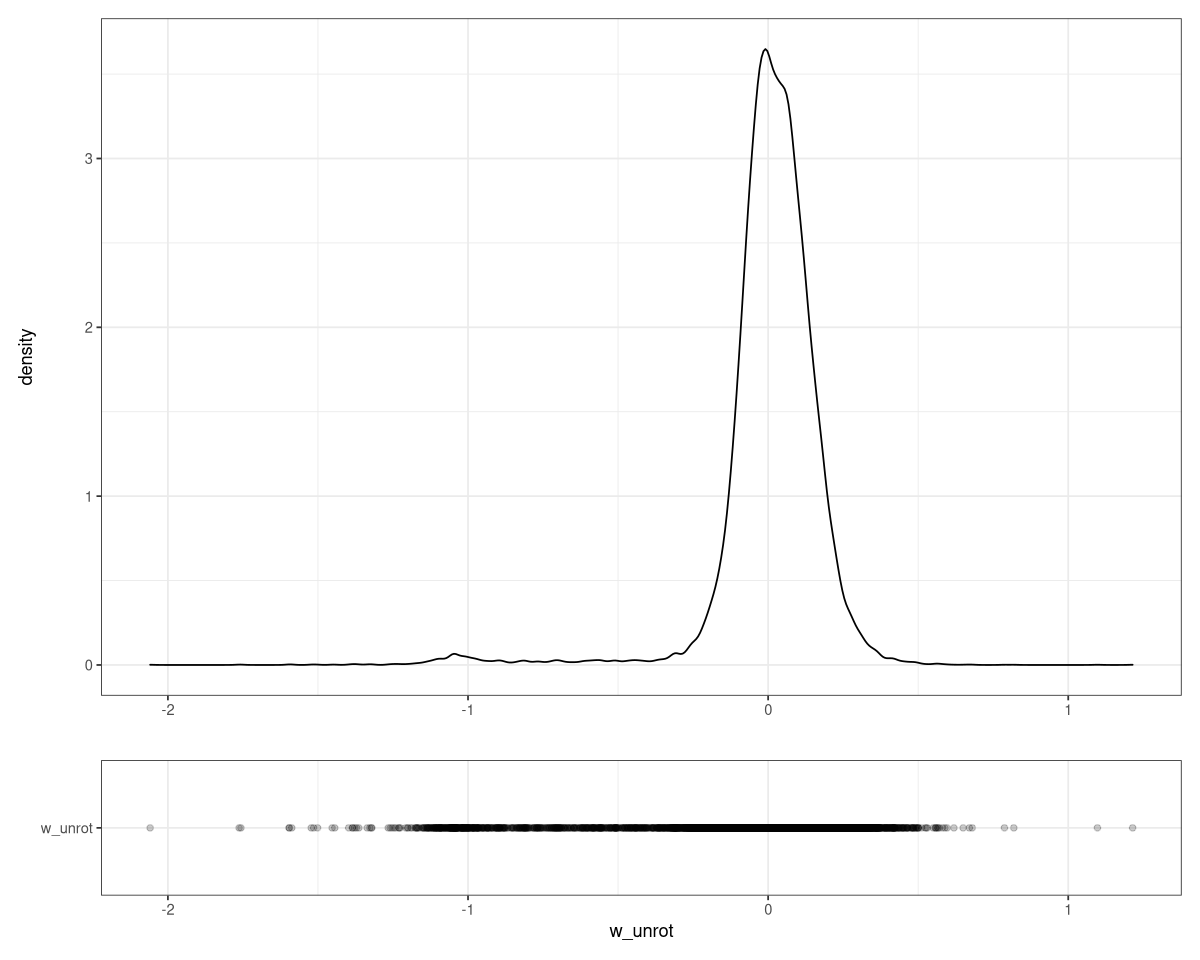

In [122]:
expl_var("w_unrot")

w_var 
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000306 0.245876 0.526571 0.793961 1.059736 6.149672 


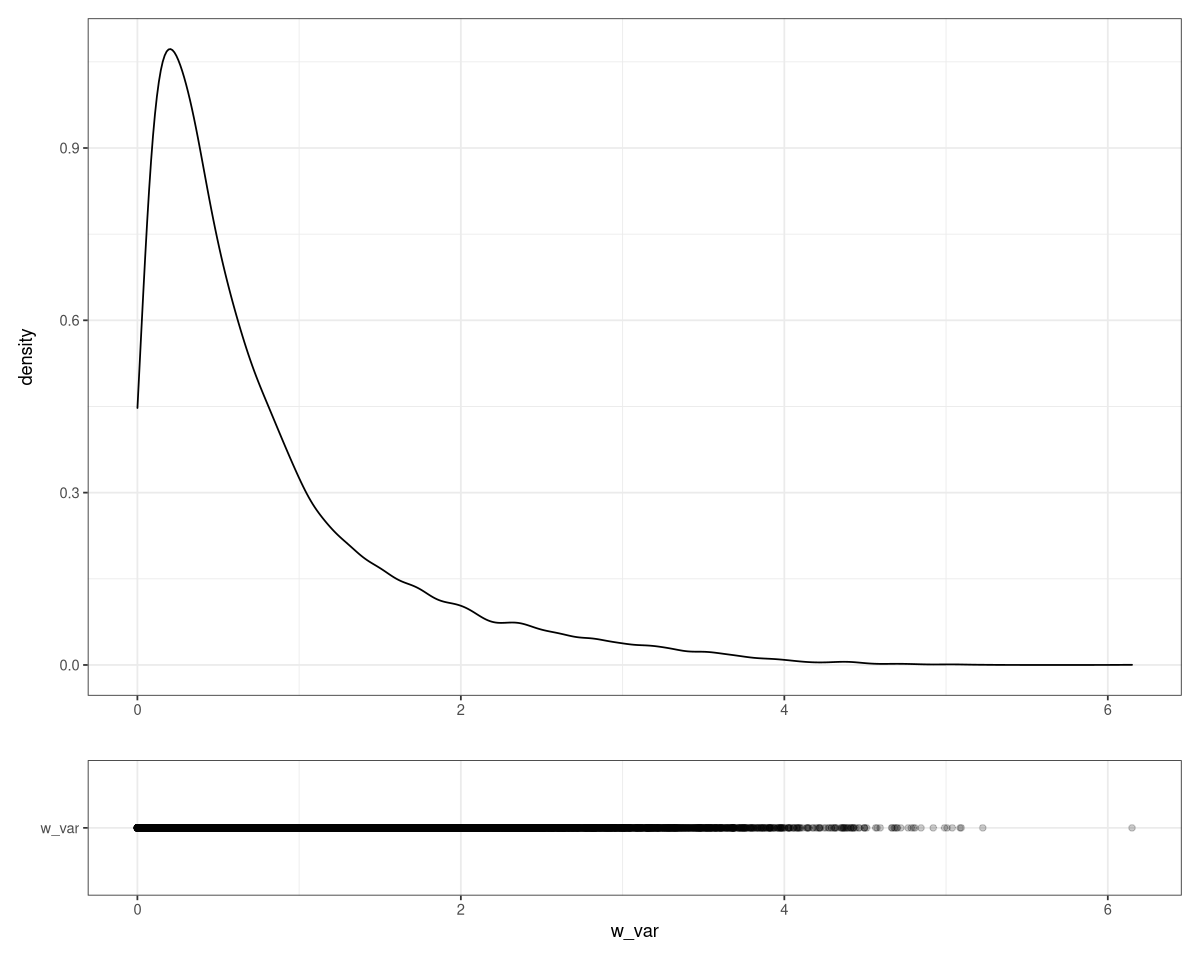

In [123]:
expl_var("w_var")

In [124]:
expl_var("wind_dir")

wind_dir 
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0017 101.0023 245.6658 216.4497 329.3509 359.9997 


wind_speed 
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.06453  2.16643  2.94166  3.12664  3.89031 10.75326 


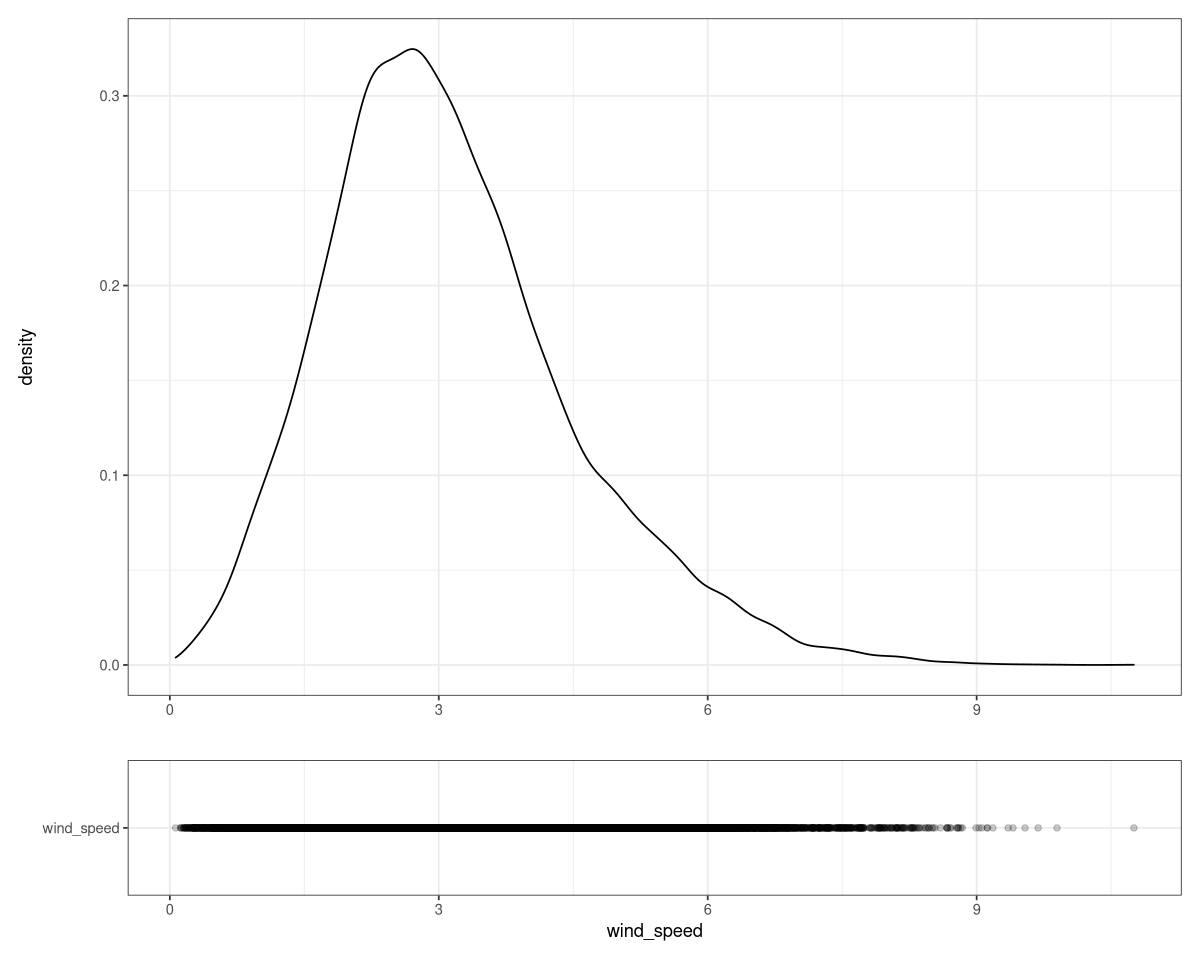

In [125]:
expl_var("wind_speed")

x_10 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   35.06   36.92   41.79   38.71  610.00 


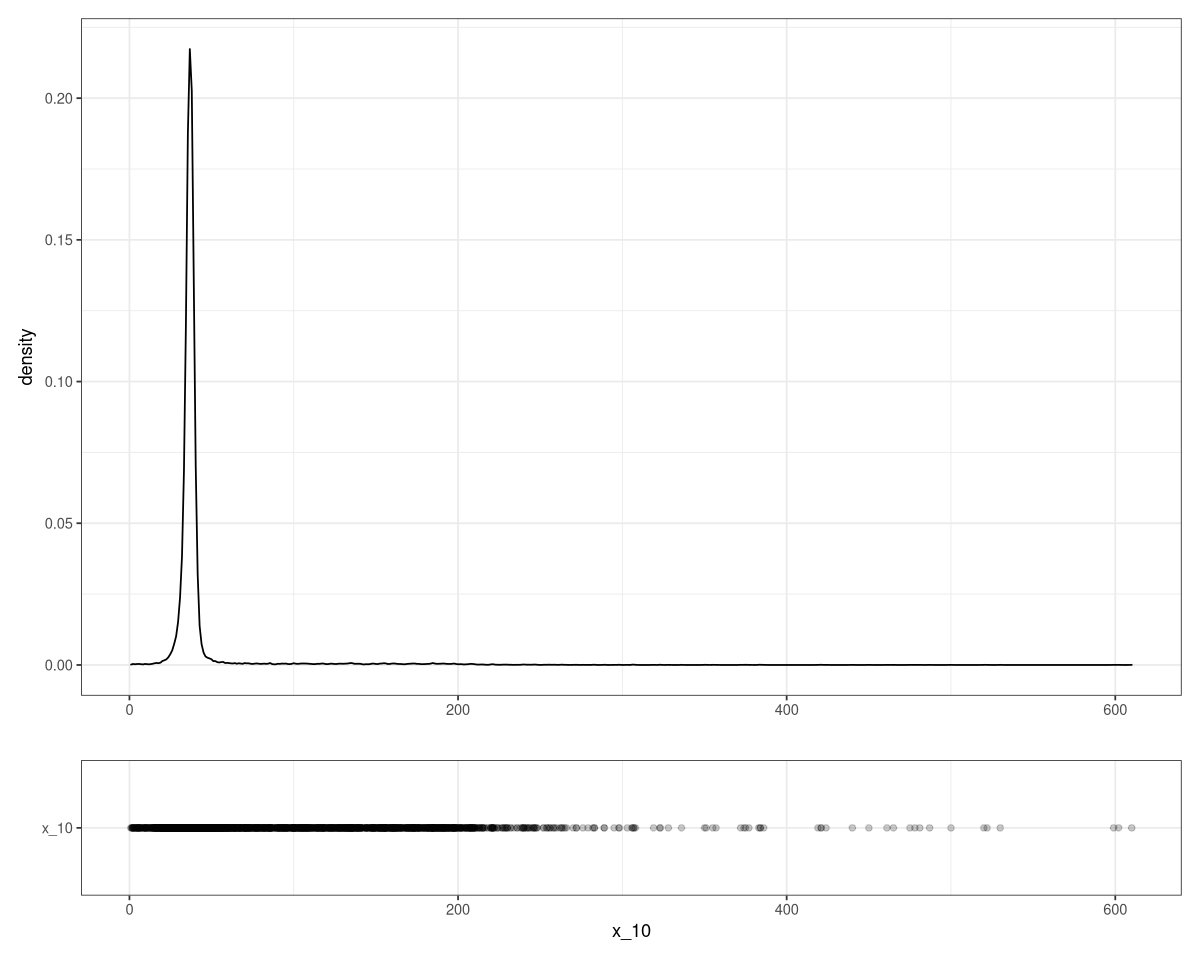

In [126]:
expl_var("x_10")

In [127]:
expl_var("LW_IN")

LW_IN 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  124.4   230.5   278.4   271.0   310.0   429.4 


In [128]:
expl_var("LW_OUT")

LW_OUT 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  182.3   286.4   320.2   312.7   344.8   485.9 


NETRAD 
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-117.916  -40.086   -1.613   69.443  121.037  795.040 


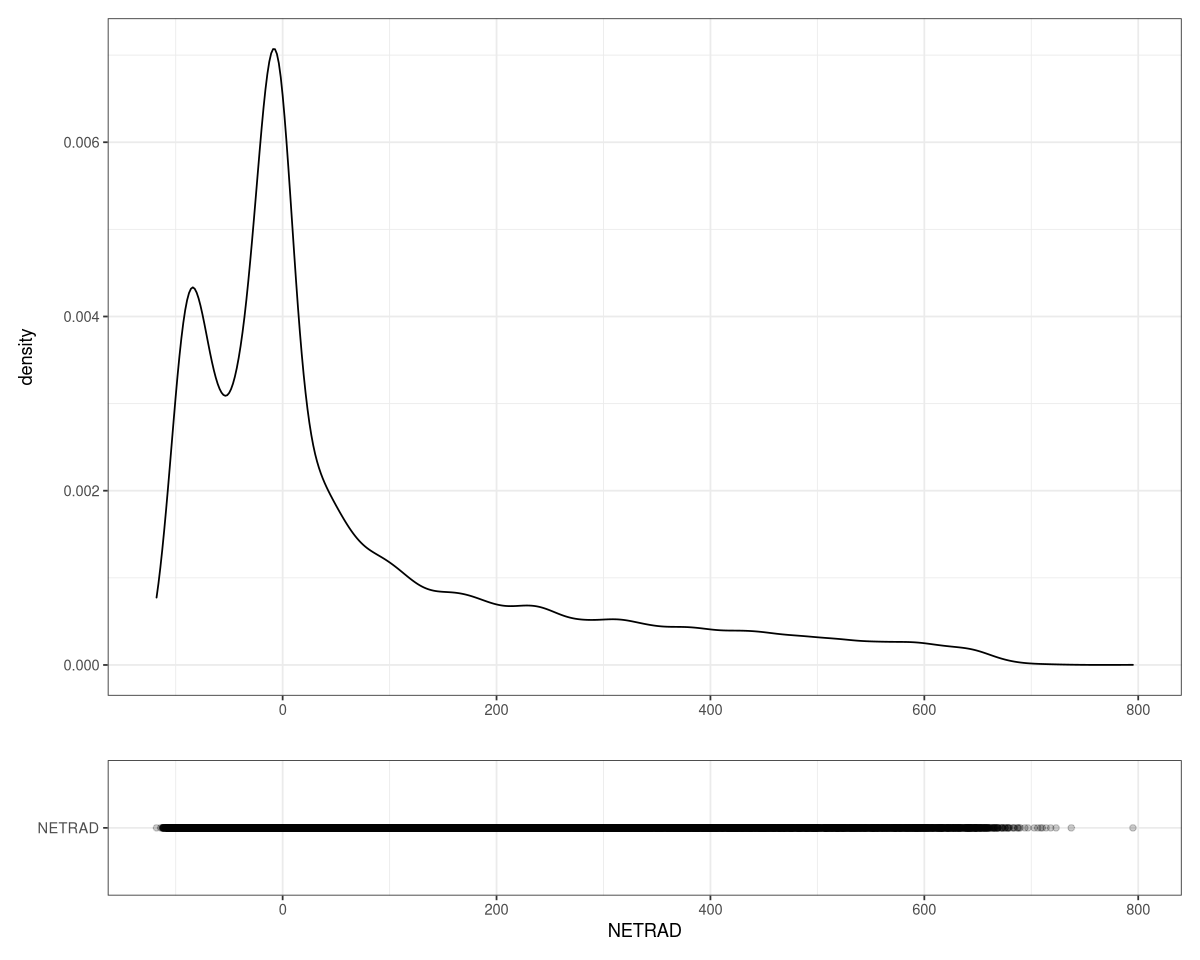

In [129]:
expl_var("NETRAD")

PA 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  900.0   952.1   959.0   957.8   965.0   994.0 
RAD_IN 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  175.1   300.6   346.2   441.2   508.2  1310.0 


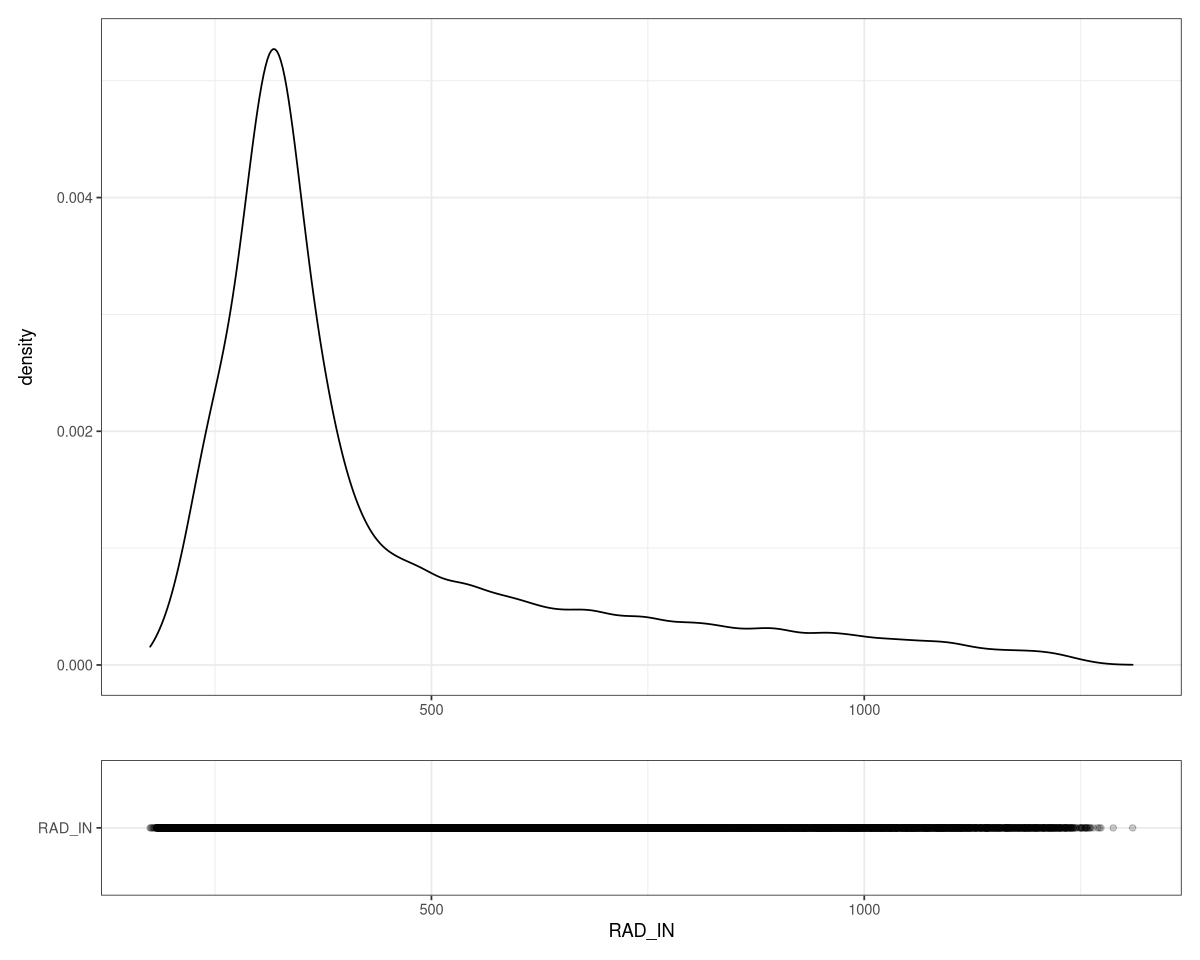

In [131]:
expl_var("PA")
expl_var("RAD_IN")